# Load Data

In [107]:
import pandas as pd
import emoji
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS
import nltk
from nltk.corpus import stopwords
import csv
import re
import seaborn as sns
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')

df=pd.read_csv(r'C:\Users\Mhaiskao\Desktop\Assignments\DMTA\olid-training-v1.0.tsv',sep='\t', encoding="utf-8",quotechar='\0')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mhaiskao\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mhaiskao\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [108]:
df.head()

,id,tweet,subtask_a,subtask_b,subtask_c
0,86426,@USER She should ask a few native Americans wh...,OFF,UNT,NaN
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,TIN,IND
2,16820,Amazon is investigating Chinese employees who ...,NOT,NaN,NaN
3,62688,"""@USER Someone should'veTaken"""" this piece of ...",OFF,UNT,NaN
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,NaN,NaN


# Data Preparation

In [110]:
def preparation(df):

    #Convert to lower case
    df['tweet']=df['tweet'].str.lower()

    for i in range(0,len(df['tweet'])):
        #Removal of User Id
        df['tweet'][i] = re.sub("user", "", df['tweet'][i])

        #Removal of URL
        df['tweet'][i] = re.sub("url", "", df['tweet'][i])

        #Converting emojis to corresponding words
        df['tweet'][i]=emoji.demojize(df['tweet'][i], delimiters=(""," "))
        
        #Removal of Punctuations
#         df['tweet'][i] = ' '.join(re.sub("[\.\,\!\?\:\;\-\=\"\’\']", " ", df['tweet'][i]).split())
#         df['tweet'] = df['tweet'].str.replace("[^a-zA-Z#]"," ")

        df['tweet'] = df['tweet'].str.replace("[\.\,\!\?\:\;\-\=\"\’\'\@\+\~]","")

        


    #Remove words with length less the 3
    df['tweet'] = df['tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
    df['tidy_tweet']=df['tweet']
    df.update("'" + df[['tweet']].astype(str) + "'")
    
    return df


df['subtask_c'].fillna("NULL",inplace = True)
df['subtask_b'].fillna("NULL",inplace = True)
df=preparation(df)
# df.to_csv(r"C:\Users\Mhaiskao\Desktop\Assignments\DMTA\training_updated_tweet.arff", header=False,index=False,mode='a',quotechar="'",quoting=3,escapechar='"')

C:\Users\Mhaiskao\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Mhaiskao\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Mhaiskao\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipy

0 @ she should ask a few native americans what their take on this is.
1   go home youre drunk  #maga #trump2020 oncoming_fist United_States oncoming_fist  
2 amazon is investigating chinese employees who are selling internal data to thirdparty sellers looking for an edge in the competitive marketplace  #amazon #maga #kag #china #tcot
3  someone shouldvetaken this piece of shit to a volcano face_with_tears_of_joy 
4   obama wanted liberals &amp illegals to move into red states
5  liberals are all kookoo 
6   oh noes tough shit
7  was literally just talking about this lol all mass shootings like that have been set ups its propaganda used to divide us on major issues like gun control and terrorism
8  buy more icecream
9  canada doesnt need another cuck we already have enough #looneyleft #liberals f**king up our great country #qproofs #trudeaumustgo
10    its not my fault you support gun control
11  whats the difference between #kavanaugh and    one of these men admitted to groping a 15 ye

73  i do remember ( but somehow centrist antifahaters can never quite seem to bring themselves to condemn such things
74  i mean it worked for gun control right 
75  i think the last thing on the wh or trumps mind is april ryan she needs to stop flattering herself shes not as important as she thinks she is
76  principled conservatives are #hypocrickets
77              dont forget  &amp democrat backed #antifa
78  she is a beautiful person to teach values to her kids teaching them they are royalty but keep to keep it from going to their heads stay real red_heart 
79  bring out his antifa criminal son to campaign for him
80   i didnt watch and will not watch  watching the september 11th stories and how we came together and stood shoulder to shoulder made me proud even with all of our issues yet the people playing a damn game cannot stand for this moment—protest on a saturday
81 a tear is made of 1% water and 99% feelings
82   trump addresses gun control representing the nra  i will not l

162  this game sucks donkey balls
163  yo for real you are gorgeous
164  absolutely should be a nail in the coffin for hilliary
165   i hope he gets on twitter so i can tell him how amazing he is red_heart grinning_face_with_smiling_eyes 
166  who are “they” gun control has been tried and is a proven failure this is why people dont vote democrat they refuse to admit reality gun control doesnt work
167  so the overwhelming liberals in the populated states can make policy for the rest of america with whom they have no clue about  just because california has the biggest population does not mean the us shares in their values  get a clue hillary
168   doesnt he partly fund antifa
169  he is a dumbass 
170            and #levistrauss wanting gun control how many of us wonder why the heck do they want our freedoms taken away ~ or is it just selective freedoms 
171  at this point in time i dont think pres trump gives a sh*t and neither do i lol 
172   ok conservatives get to the polls vote red

232   this is what happens when you tell white liberals that they dont get to congratulate themselves on how woke they are until they put their money where their mouth is that simple fact of life breaks their brains
233             antifa doesnt beat facsists to try to get them to change their mind  they know its a lost cause to try to change a fascists mind they do it to scare them into hiding to demoralize them and to stop the spread of their hateful ideology there is no forcing views on others
234   soros is at the root of everything and anything anti american he has his money in hollywood all the way to islam and antifa to illegals  
235 #firemorningjoe he is cut from the same cloth as all other conservatives his misogyny and bigotry are always on display he is responsible for trump 
236   truly has got to be the most idiotic thing ive ever seen
237   brigitte gabriel has experienced a life that most would have nightmares from she is sounding the alarm for americans buy her book pa

302  bro go watch how he hold his backwood in the interview like that shit was irritating lmao nigga is mad suspicious
303 a bitch built like that could beat my ass all she wants 
304         trash
305   very pathetic man 
306    she is new psychology thinker who think about religion and so aggressive on her thought before deeply think on hinduism grinning_face grinning_face grinning_face grinning_face 
307  shouldve played saint marie instead of london docks saint was ass for me OK_hand 
308  thank goodness he is not mn passive aggressive love it
309   we can empty all our prisons also and just say they broke no lawsliberal logic
310   she is an angel much love to her
311   for what why are you asking for his arrest  liberals being butthurt for 19 months is not an impeachable offense
312   the tolerant left
313       you must be talking about hateful conservatives
314   thats correct #maga
315     show me a single case where antifa have actually murdered someone  because the far right

373   mxm nigger thinks we give a fuck 
374   she is a fake vote her out now she wants sympathy
375   ask antifa  which one they like &amp respect
376 10kids from different women from this american jobless men nigerian men you are the bomb
377  by banning ammunition guns are still legal why not instate gun control to keep 24 /7 watch on all firearms
378    dont have anything to do with trump or any conservatives refuse to trade with them in business
379    got him signing my bookhe is a cute 
380  this russian agent is a disgrace hey old creep  you are going to die in prison you and trump sold america to the russians and its time you do the time for your years of crimes scumbag
381   wow more salinsky tactics
382  what insanely ridiculous bullshit
383  nhs is only the way it is because we have a over populated country  conservatives have privertised were nhs buys from
384  we shouldnt be surprised these same pigs worked with neonazis to unmask antifa protestors and the local coverage b

448  i think she is the one mad  she didnt like being called out so she is trying to make them bully me grinning_squinting_face 
449  he is too cute
450    so she is disgusting to you because she is a rangers fan you are disgusting to me because you support breaking up the union  #proudtobebritish United_Kingdom 
451   its almost as if 50 years ago (1968) something changed about how gun control was discussed by the nra  how the nra went from backing gun control to americas most powerful lobby group 
452  they should hopefully voters will realise that they could have ended this shitshow well before the midterms
453 13/ booom   the mac telling the  to pay the public sector properly have that theres no magic money tree   but this is a disaster it means the #nhs is in crisis and competing with other sectors 
454  you are absolutely right smdh
455   i thought they said numbers were up someone lied
456   he is pitiful  reason economy is soaring is that he is out of office and president trump

514   poor sad liberals no hope for them
515 i got more common sense than all of my followers  )
516  cbs sez ceo leslie moonves out on his ass after several allegations he was chasing ass coo joseph iannello will be interim ceo until somebody accuses him of the same thing this shit never ends ooops
517  sorry for so much bs to get to this but here is the article i read 
518       youre absolutely insane if you think a hearing for a supreme court judge is a appropriate place for a mourning father to talk about gun control he doesnt enact lawshe upholds them he should have demanded his state senator shake his hand
519  attention  is publicizing an antifa target  list comprised of trump supporters names some are high profile names and many are random everyday trump supporters twitter has not suspended his account check out his lists
520  even if the devil did make every single one of those priests rape children why does the pope refuse to condemn it why didnt he remove from leadership th

585  he looks like the antifa president
586    alaska girl chiming inif murkowski votes yes she is done for from what i know most native tribes have told her to vote no kavanaugh on scotus would decimate alaska natives
587   send in some of your antifa super soldiers to sort these tommy robinson fans out
588  is for everyday working men and women vote republican and keep trump and his policies  a vote for a  will cost you money folks #maga #winning 
589  woodwords book is slander  he is nothing but a clown tool
590  how many more this country must address sensible gun control this is more than enough  vote blue get this garbage cleaned off our streets
591  it appears to be paired with a woohoo so he must think he is on his way to a brothel
592    she is mentally unstable
593  character and clinton cartoon maybe
594  yup total gun control works just fine  well not in mexico
595   good friends are like stars you dont always see them but you know they are there you are a star in my life ☆

654  havent set any expectations on him he has set his own goals chasing his own dreams  he has asked those questions from the doctor and making decisions with advisement from me his parent he is growing to be his own man
655    #medicare is not #medicaid   liberals steal from the elderly and disabled to pay for   #welfarefoall
656   he shall know your ways as if born to them
657    i should wash your mouth out with soap for saying that i have the utmost respect and admiration for our cops i dont have that for dirt bags who would break into my home  gun control means a steady hand not an empty one go talk to antifa buddies about being a drain
658  sexy
659                                                  shes not who she claims she is thats the logical (and humanitarian) explanation
660  he is a russian spy /have received much money from putin
661   well hes a liberal so that explains it who knows the shooter may be a liberal as far as he knows liberals are very hateful violent people 

728  did you just replace the nword with dude
729   i think he could be called a turncoat  talking out of both sides of his fucking mouth  lindsey graham can no longer be trusted 
730    the left are the ones spending all our money it wasnt the right that gave us 325 billion in debt that was the left remember when the liberals screamed to high heavens when harris taklked about privitizing hydro one the liberals did it
731 #funny and #hilarious #meme for #brexit people to deal with #remainers  as they simply have failed to put up a single argument and i am sure they are all #leftists  #hardbrexit #mbga #maga #mcga #mega #conservatives #patriots 
732     oh boo you sound so ignorant with your words we are on top all of america is on top now how about stop resisting and try to help make our nation the best for everyone not just liberals wake up and walk away
733          super president like multiversity good ideia
734  this witch hunt against kavanaughs is pitiful  i cant believe anyone 

801  the war on free speech  antifa 
802 50% of the refugees coming into canada for all the pms handouts already have legal status in us (therefore not refugees) but they still come and happily as the liberals welcome them with canadian 
803  desperation abuse of my power cause he is losing his mind
804  #beaboutit anyone in california see how utterly defenseless their gun control agenda makes people bravery backed by effective tools prevents loss of life good on this guy be willing to win at any cost
805  gonna be a bitch to rewrite this one
806    so ist es #thedeepstate #jesuiten #cabal #satanists #nwo #kalergiplan ~ #kalergipreis #whitegenocide #communism #antifa #albertpike1871 double_exclamation_mark  #draintheswamp #lockthemallup #guantanamo #expropriate #qanon rabbit hole     #potus45 #trump2020
807  i bet she`s had more prick`s than a secondhand pincushion #maga United_Kingdom United_States 
808   she should but probably cant stay awake long enough to leave the country said sh

873   purp he is chris im the real cj until further notice face_with_tears_of_joy  #psa
874  plelleeaaaaseeeee i literally sobbed so hard at this screen who does he think he is looking so beautiful while he sleeeeeeeps
875   can you please tell jimin even if he knows just how amazing he is and that he actually saved my life no joke were really thankful and please be safe and healthy i pray for you every single day and minute  to be protected and safe purple_heart thank you 
876  its  faultshe is cheat
877  hold up this for real am i reading that right everything is free
878    oh and higher unemployment and witch hunts and lynch mobs and antifa communist parades you can have all that shit and let hollywood decide how you feel
879    wow  are these the types of folks we want teaching the already confused millennials
880  i think he is hurt
881  awesome job mr president trump  maga
882  everything is an issue with muslimsgo live in another country like iran
883      i did not admit anyth

935 #yesonkavanaugh yes because it is the right thing to do yes because conservatives are in power yes because democrats are miserable humans yes because we are sick and tired of the tantrums from the democrats yes because they freaking lost the election please add more reasons
936   why because ford accused him of something 36 years ago and wont testify liberals hed this for months and came out now i think liberals are the ones who took a gamble
937 #manitoba  #ndp leader wab kinew on the #carbontax  are you proud of yourselves  and  you allow the ndp to come at you from the right youre all as insane as the #trudeau #liberals #winnipeg #canada #mbpoli
938  hello  you used to date anthony weiner  what does that tell us about you 
939  &amp sicking their attack dogs ( #antifa / #resist ) and blaming the right
940  hahahahahahahaha she may need to change her strategy acting like a spoiled child throwing a tantrum and showing the world what a sore loser she is on national television isnt 

1003    tippi hedren was in julie and jack (which rifftrax also did) the scene from birdemic that she is credited for was from that movie playing on the tv in the hotel
1004  coming from a guy who worries more about straws than cleaning up failed shitty policiesnow he knows bestlol
1005  i hope they were reporting on gun control
1006   popular side doesnt equal winning side facts are that private schools do a much better job educating students than public schools public school teachers get unfair perks that they dont deserve its unfair to private school teachers
1007  jeff flake looks like he is flaking out on the confirmation
1008  how fucking sad persevering_face 
1009  bullshe is probably in debt and soros is paying heryoure never afraid if this happenedgive us a break
1010  i suppose you think the way liberals attacked sarah palin was courageous also youre just another hypocrite
1011   ilegal invader kills 13yearold canadian girl
1012  20 million dollars from cbs to #metoo can buy 

1074   you do know antifa is far left republicans are peaceful we just only use violence to protect ourselves from antifa
1075   f hope since hes ‘not smarter than a 5th grader maybe she is
1076    it is metallic color tomorrow i go to get itsmiling_face_with_halo  it was my birthday giftface_with_tears_of_joy 
1077 100% agree with trump on this  surprised to see so many liberals talk about how cute he was sneaking candy at a war criminals funeral 
1078  good thing california has all those gun control laws  face_with_tears_of_joy face_with_tears_of_joy face_with_tears_of_joy OK_hand 
1079 #joebiden calls trump supporters dregs of society #biden organized a coup in #ukraine his son steals $b from ukrainian people as they leave their country in search of jobs  #maga #potus   #zog
1080  he needs to lose some weight
1081  destroying me excuse me i beat you all the time why you bullshitting that also i love you more face_with_steam_from_nose 
1082  you are the only motherfucker with common 

1143   people are awake projection is no longer a tactic that liberals can successfully use
1144 (but look how cranky she is  )
1145    weve had a good conversation many will condemnations me for my part from both sides it does not matter this is what gun control is about discussion
1146  correction the liberals won a falsemajority on the backs of a lot of close races – emphasis on “false” #electoralreform
1147  thanks for following were glad to be connected
1148  ggg knows he is going to knock him out no way this goes to judges
1149  its called espionage he is doing it in plan site to help his bosses in moscow
1150                 following all patriots please follow back thank you #maga #kag #walkaway #witchhunt #redwaverising #votered #votedemsout #voteredtosaveamerica
1151  he is so confused one of the liberals running loose beaware 
1152  tyler on thursday go girls i think tyler believes he is the mastermind and he needs to take a seat angela or kaycee for the win
1153  bono get o

1217  conservatives are 1000x funnier than liberals
1218  what does she think she has done to kavanaugh family you cant throw crap out there and not back it up nothing but a stall tactic liberals would fight anyone being appointed
1219        face_with_tears_of_joy face_with_tears_of_joy face_with_tears_of_joy face_with_tears_of_joy face_with_tears_of_joy face_with_tears_of_joy  yeah peaceful because the right wellknow theyre right no counter protests unlike fascist antifa as for 7k  who counted dianne abbott
1220   #maga make alcatraz great again
1221  the pit bull debate is just like gun control pit bull kills someone and here comes pictures heres my loving pit gun kills someone and its i have 4 guns and they never killed anyone
1222  thats the plan for next summer actually we need it for shade and i was thinking that could be a fun side project
1223  sis mandys no nose havin ass from the grim adventures of billy and mandy can smell that shit wheeew 
1224   you should investigate ant

1285  hope you are having a great day honey cant wait to talk to you grinning_face_with_big_eyes  i love you two_hearts face_blowing_a_kiss 
1286   and now were off to get milk and cookies
1287      because he is talking to an idiot liberals have a mental disorder in his book the liberal mind the psychological causes of political madness dr rossiter exposes that the ideology motivating liberals is actually a mental disorder  read more 
1288         we did a great job of electing  and a terrible job of who we sent to congress to support him   conservatives left frustrated as congress passes big spending bills 
1289  god + maga  block  buhbye
1290    apart from the fact that if lib dems had been in coalition again brexit would have never happened the  were a moderating force on the conservatives more lib dems in 2015 would have meant no brexit
1291   democrats would love to see mob rule thats why they like antifa
1292  woman_facepalming_medium-dark_skin_tone  shes dead ass serious too sm

1346  fuckoff you been knew im scared of him
1347  #maga thumbs_up   let that set in  
1348                                                  he is cutesmiling_face_with_smiling_eyes 
1349  he is mark twain in my eyes love him
1350   he needs to be removed from his position children have and are being abused and he is covering it up
1351   then there should be no problem having kavanaugh take a lie detector test just as dr ford if he is so anxious to clear his name he should be asking to take a lie detector test the fact that  isnt blasting tweets on this issue also speaks volumes
1352    nope teaching them not to give a shit what liberals from ca think
1353  if he is implying that he is an agent of the devils will then i fully agree
1354   isnt this from the saul alinsky book #rulesforradicals or  favorite book antifa handbook
1355  if just a veiled accusation can derail it will never stop #resist #antifa and  fingerprints all over this
1356    you are a sexy perverse womansmiling_face

1411  as well he should these people are the dregs of society  not the presidents supporters at least we didnt try to stage a coup detat  #qanons #greatawakeningworldwide #joebiden #maga
1412  #justsayin what the majority is thinking more #fakeoutrage &amp #lies from the #lunaticleft never seen so many sore losers throwing tempertantrums for almost 2 years now embarrassing #magaUnited_States  
1413  betomale
1414  as a member of antifa )
1415   yup she will destroy hard working ppl and small businesses she is evil with a pretty face and ppl are falling for it
1416        the kid he scored on looks like he is about to drop outta school now somebody check on him
1417   same rat that said antifa was a black organization
1418  is her own person she is not a  copycat #nvsen 
1419      so tell me all about why you are simply rudeand racist was it your mother…
1420 (( i want him to rest 4ever ((( he is such a sleepy baby ((( 
1421    people dont seem to know about these organizations or under

1491  i remember how much we were making fun of conservatives in the 90s for thinking that puppets were gay now people are upset because theyre not gay pbs needs to put on a documentary teaching people how puppets are made
1492                      ty you are welcome #maga
1493  good idea they need to protect our borders more than they need to be overseas
1494   what i have no clue what you are trying to say im certainly no trump supporter ffs just rational face_with_tears_of_joy   keep on keeping on with whatever it is you are trying to achieve
1495  man i hope i dont die before florence hits i heard he is going to be a great time
1496   i have its horse dung she cant remember when and where it comes out at the last second her parents lost a foreclosure case where his mom was the judge  she is a hardcore anti trump liberal  the #metoo is turning into blm antifa and there is 0 due process
1497  whats shocked me is that they consider themselves seculars  liberals  those kind of yoga veg

1566  phooey it wasnt about stepping forward it was about  helping  wield a crude sharp axe on the uks poor and vulnerable he is a total hypocrite and fraud in a stupid affected style hat
1567  the only thing the principled conservatives are outraged about is the clear moral and intellectual need for diversity and inclusion of all people of all faiths  
1568  diversity  success  lmao
1569  ask  she is there now
1570   thanks chris you are very helpful
1571  heres a link to my channel with a plethora of topics to peruse 
1572  good we can only hope keep talking
1573  whats your point you are so clearly ignorant about the nature of sexual assault
1574   you mean antifa 
1575  do you also wanna do some photography over the weekend im bringing my camera gear
1576  his fruits comes not only from his mouth he is a liar and a deceiver he is definitely not a catholic — he likes to reform the church to his own image
1577  the touch makes him stiffen hips pressing into that touch im not a fair m

1632   he is crap tho
1633  disgusting liberals have no shame
1634    the holy spirit is given when you are saved
1635   joined the show to talk about how she is leading the fight against breast cancer at   listen to the full interview 
1636    simon said he hope garth writes ketterer a song  knowing his guy needs outside help 2 get the votes  btw i dont think garth is going 2 do that  i saw him in a video say as much  kettterer &amp other acts r battling for 2nd courtney is an unstoppable force  she is a hurricane
1637    she is still on there for now
1638  im only there for the meltdown 
1639   is he crazy where is ss detail how are they making sure some crazy liberal with a gun doesnt show up
1640 yes  where we go one we go all flexed_biceps_light_skin_tone  flexed_biceps_light_skin_tone flexed_biceps_light_skin_tone  #wwg1wga #thegreatawakening #maga #godblessamerica #godblesshumanity
1641  and lets not forget that the democrats were the ones who wanted to keep slavery alive
1642  

1710  antisemitism is alive and well in the uk
1711  liberals are not very smart
1712  i hope he traded this winter as he is the worst defensive catcher ive ever seen itsnot even funny anymore as 14 passed balls in only 71 games wow thats nuts
1713   if trump supported nazis then why would antifa a communist group want to harm trump thinking_face  thats right the communist group is made up of the democratic party
1714 20180917 don pittis cbc is the peoples party of canada liberal it depends on the definition 
1715  no and theyre expensive ass hell
1716  dishonored zone where you have to balance on dangerously high edges in a shitty ghetto overrun with rats and bloodflies
1717  i think gun control and progressive tax rates are unjust can i ignore them
1718    they arent
1719   how did britain end up upside down in the ditch with all four wheels spinning lazily in the air  how could it not with the rabid wealth thirsty  drunk on power at the wheel  #britishtorycarcrash #toriesout
1720  a

1780               amy when iook at you  think child of god but also inspring young lady you showed us that you can conquer  anything  and say i am stronger  than this god is proud  of you and so am i mr heughan too he said in an article what is the big fuss about himself you are the answer
1781 dr blasey ford kavanaugh #metoo   #femfrauds #maga #maddow #morningjoe #wednesdaywisdom 
1782    you are neither authority nor arbiter have a seat
1783   ill go to the original argument that people shouldnt blanket everyone together   terrorists  all muslims  altright  all conservatives  both of these are equally dumb requiring specific groups to denounce their fringes means that the general populace cant differentiate
1784  you are so wonderful elizabethkisses from italy
1785  he will get what he deserves in the mens prison
1786   of course never cover conservatives
1787 (i know there are parents among my mutuals/followers and lots of you are great but ive had to deal with a lot who are laserf

1849  david dennison might know where he is
1850    *extremistische idee
1851   guess thats why shes settled for being the gaginducing spokesperson of the commercialized conservatives
1852    he is a big lump of —i agree 100%
1853  wasnt it just recently that john brown gun club got kicked out of a shooting range for being antifa
1854   the timing is too convenient she is a paid liar
1855 1st thing liberals and conservatives want to pass is the tpp trade deal  via  #cdnpoli #tpp #nafta
1856   everybodys doin it#maga
1857                                           yes kill em with kindness  let potus and the military/leos handle the violence  #nowwatching
1858  uhhh no  sadam gassed the shit out of the kurds (sp)
1859  the truth will finally get out to congress and the american people  that the dems are trying to take out a duly elected president  theyre running scared #schiffhead #maga
1860           no im 100% sure youre watching rightwingers posting things only and think you see discr

1912  see i told you she is despicable
1913  fear monger fake rage
1914   are conservatives starting to sound like my relatives on facebook or is it the other way around
1915  im finna say fuck it and get a crispy ass jogging suitface_with_tears_of_joy face_with_tears_of_joy 
1916    women + liberals  nuff said  kavanaugh to be confirmed next week regardless of these desperate games  game over  #maga
1917   whos  sick  of  intitled   racists
1918  fuk this fat cock sucker
1919  and you know he is probably saying the softest things and yet he looks like this woman_tipping_hand_medium_skin_tone new_moon_face new_moon_face new_moon_face see-no-evil_monkey  what is the truth
1920   what you are saying is simply untrue
1921 #familyprotection gun control supporters are once again rebranding their efforts [were on facebook  livingtrust  free california #ccw class  plus virtually unlimited free training at front sight (worlds largest shooting school)] 
1922  just wondering whether we should ha

1985  you were right last night about quad she acts like she is the only one going through things in life she has to share with her friends so that yall can be there for her #marriedtomedicine
1986   how do i connect my usb token to an iphone
1987  here s a guy thats a reliable source of information hhahahahahahaha just kidding
1988   and you support the right using antifa tactics in other words the tactics of a domestic terrorist group
1989  i see his tweet but its just another garbage tweet from the liberals contributed nothing except to add more confirmation that the liberals are out of talking points &amp arent to be believed
1990  they really dont care who he is only that he will act as a judicial alt right operative on the supreme court
1991  we support you dana in anything you do—yes you are a heck of an actress thank you for fighting for us nra proud maga blessings dana
1992  oh ffs this is just sublime you are getting better and better
1993  hey why dont you look at what keith

2051 3/ you simply gloss right over the silly emotional female and her nothing problem then you delete this as you realize how horrible it is (or perhaps someone told you) but somehow it is the fault of the liberals who might misinterpret what you wrote in plain english
2052    misdrawed cause she is not white and blonde why he did that can you answer that
2053  bono is clearly a racist
2054   yeah he is
2055  liberals ruin everything
2056  joan is playing 4 characters this season all the way up to episode 6 so far pretty sure she is a main
2057  oh my goodness she is so precious babies make everything better thank you for sharing two_hearts 
2058  you are doing copy paste of the tweets of south park twitter there are something weird on here thinking_face thinking_face thinking_face 
2059 #westminster  #tories     wtf is going wrong with #police these days unamused_face angry_face angry_face angry_face  
2060 #stcshooting to the kneejerk people crying for gun control after this shootin

2128    because some people are bastards youre hopelessly naïve if you think plenty of frauds wont take advantage of this law change for malign purposes
2129   even the most die hard liberals in the media are stepping back from this one
2130     she is not in this photo it has not been verified that they knew each other this story is about the weirdest ive ever heard and the texas rangers better do right by bo
2131  bs he is looking for retirement money and a new job
2132  that she is smiling_face_with_smiling_eyes  
2133 now i know we have a lot of people to feed but these two these are mine now go back to feeding people im starving i havent eaten in at least 40 minutes you need a maga hat 
2134 she is dirty like trumpshe stole ted cruz campaign voters list and gave it to trump 
2135    of course they are attacking your book i am shocked this tweet has not been censored keep fighting to #maga
2136  ah but arent the railways so much better now theyve been privatised by the   
2137  our

2198  the daily vitriol and hatred spewed by scheming liberals is meant to incite precisely this type of lunacy
2199   now is the time to begin scheduling sunday college football games you can push these americaphobes and police haters right off the ratings cliff  #ncaaonsundays
2200  you dont know her she is senegalese face_with_tears_of_joy face_with_tears_of_joy 
2201  had no interest in watching the dnc hour with a hunch of sanctimonious liberals who trigger over everything except when they are insulting those who disagree with their cause of choice for the moment pass
2202 #tuesdaythought   the only hate speech that i hear these last 2 years is from liberals stop the hate
2203  and its not that the legal profession is somehow biased towards conservatives the federalist society exists because conservative were not wellfostered in the profession
2204  prime example as to why we cant have anymore liberals in our government  they dont want to nor do they know our constitution  they pr

2260    she was so freaking happy when she got her no from kavanaugh i seriously hope she has him for perjury or at least can force recusal  either way she is an immensely elegant speaker cut from the same cloth as obama who i badly want to run in 2020
2261  maxine is just a mean spirited woman i cant imagine the demons she is dealing with to have that much hate &amp craziness in her #crazymaxine
2262   horrendously sad that we all know who “he” is   it gives me no joy to know im smarter than the president
2263  i know many too  we liberals just dont feel the need to dance around waving them like the maga idiots
2264  its wild thinking about how clive is minus one boypussy away from wrecking the whole town again
2265   i will always be cruising to bray wyatt for you no matter what he is a good man like you and your brother
2266   global sushi &gt dead commie terrorist i choose sushi
2267 65 women defend kavanaugh as a good person amid allegations  ignore dianne feinstein she is obsolet

2327  bengals v some sorry team looking for a butt whoopin
2328   overton window shifted a while ago ap is leftist wsj maybe centrist  and lol that cnn isnt hyperpartisan but fox is ok  have you denounced your extremists antifa keith ellison linda sarsour ocasio yet  ive denounced ones on the right
2329  good thing i watch him online
2330   one of the very first states in the us to legislatively legalize gay marriage extremely progressive gun control minimum wage increase free college i know these things dont count for dipshits like you but they are major and they count
2331  bitch im gonna see you on december dont me we have to see each other
2332  i wonder if he is a chicago bears fan
2333 now this is how we maga 
2334  white liberals really hate themselves #tds
2335  im down in 15 minutes if you are
2336  and who gives a shit
2337  if im not mistaken they were the only affiliate to not be resigned to the pirates system
2338  “its only sexual assault when the other does not agree wit

2400  oh dear conservatives will implode over this
2401  hey pauly  when the rest of the countries catch up with usas environmental policies  let us know 
2402  u nasty bitch
2403  79% say they are the same of better off   #maga
2404   if brookee baldwin and erin burnett start showing cleavage to their boobies cnn just might
2405   yeah keep mocking her right into a yes vote
2406  im hoping its a joke #antifa are morons and have no clue how many people carry backup guns their #disarmthem stunt will make them a lethal threat in most states do the math on what will happen silly #antifagoons
2407   typical when it backfires its nothing to see here move along  trump supporters these days are doing the same thing all this shit trump is getting called out on its nothing to see here move along  lol
2408  i guess all of those old white guys do kinda look alike  winking_face face_with_hand_over_mouth 
2409  fukushimadaiichi wasnt a hurricane you are comparing apples &amp orangutans
2410  i dont

2478  had you radical liberals supported president bushs plan to allow young people to invest 2% and only 2% of the social security into the private marketplace we may be solvent by now
2479  he is lol face_with_tears_of_joy face_with_rolling_eyes 
2480  please draw stupid sexy nezha and nidus over the shoulder or something
2481  he needed his brains on the sidewalk
2482    no she is a liar
2483   i would temporarily change parties if the republican party would primary agent orange with a real republican conservative that would maga at least a great start
2484 fu #emmys hosts for insinuating my vote was wrong or illogical i voted for trump cuz im tired of the typical political nonsense #theswamp just cuz you dont agree with my vote doesnt mean that it doesnt count #political #colinjost #michaelche #maga
2485 join me in #boycottemmys #maga
2486   sure  because they are being exposed for their filth &amp constant coverups of abuse why do a vow of celibacy &amp purity maybe its just a gia

2544 #ny18 faso nra scores 2016    nra  candidate positions on gun rights    93% 2000    nra political victory fund  lifetime score    a+ 1998    nra political victory fund  positions on gun rights    a++ 1997    new yorkers against gun violence  gun control score    0% 
2545     index_pointing_up  this is why conservatives and law abiding citizens dont come to the table about gun control it not about lunatics like this guy that should no longer own weapons its about removing all guns slowly but surely from everyone regardless of who they are 
2546 1boris johnson doesnt care about family forced abortion of his child by mistress daughter says he is a selfish bastard betrayed and divorced 2 women #r4today
2547  wtf arent they treating antifa as terrorism
2548  after the gop wins the midterms easily there will be no reason we dont put on the masks and grab weapons to go all #antifa on people like you clowns have been doing going to be so much fun
2549  she is stunning
2550  hate to break 

2615  hillary was counting chickens before they were hatched remember
2616 #leftism please conform to the groupthink of your designated interest or ethnic group independent thought helps conservatives
2617  he is a big nerd it seems
2618   00000 where on fb
2619     dont let the msm keep calling it a second referendum as there will be a remain in eu option it is really a peoples vote one problem with 3 options could be just over 1/3 is bigger than just under 2/3 perhaps 2 stages would be better
2620   no  no its not  well maybe in deep blue lib controlled ca with some of the strictest gun control laws in the nation which doesnt apply the law to illegals
2621  doesnt “myth” mean something that isnt true thinking_face  hmmmm  hollyweird liberals should stick to make believe world #dummies backhand_index_pointing_down  
2622  #maga their podcastful is about blockchainful but itsful about what it meansful to bewise working mothersful who are trying to makewise
2623   yep he issomebody is g

2684   you people calling everyone nazis under the sun becomes tiring and stupid frankly you people called zena bash a nazi and it turns out she is half mexican and polish descent and her family barely escaped death from the nazis so keep it up desensitize that word
2685  and sadly anna decent fair minded one nation conservatives like you seem to be an endangered species in your party how can tory grass roots support a man with boris johnsons record on morality and standards or a caricature like mogg
2686 #maryland remember to vote #rednovember 6th  we need to put conservatives in house and senate to #kag and end govt corruption in washington  we want to keep economy booming and keep our jobs 
2687  if it could that shit would be talking to you like butch noo you already know he a fuck boii bye
2688  almost forgot you was a nigga in ya past life lmao
2689     you are a liberal who doesnt even live in fl
2690   yes he is
2691   so proud of the harper govt for all the good they are doing

2758  did maga hack your twitter lol
2759  she is so smart
2760  ok but please understand that i am not one of dubakoor mumtaj dubakoor army i only support her for certain things i get what you are saying and i dont understand how she has survived from up to this point for me she is not fit for title winner
2761 #loveforjess i might not know her but many people do so spread the word in hopes that she is
2762  trying to justify a death after the fact with a small amount of dope fuck stop fucking killing people get some damn gun control so cops dont feel like every house/apartment they go into could potentially have a gun scared people do unpredictable things
2763  aw boo you are the best momsparkling_heart 
2764  ya take advantage of the monuments standing stately around our nation because if the liberals continue they will be no more
2765  we have the real factsyou suck pussy grabber mother fucker
2766  you have to admit these democrats know how to fleece the dollars out of other democ

2834   lets gooo shittin on nubes
2835  he *is* the dba  i had a quiet word with him afterwards about v$datafile
2836  give me a fucking mic
2837  weird how antifa thugs attacking regular people (aka the far right) never gets reported no wonder sky newss ratings have plummeted by 37% since 2012
2838  i plan on it
2839 this obvious hit job on kavannah is not going to workand the liberals continue to reveal themselves as demonic figures 
2840  come on texans this man can not replace   ever #maga2018
2841    why because you are too busy spreading hate with your tds im sure you feel fine ridiculing children of conservatives you represent everything that is wrong in the education (brainwashing) system
2842  have you ever served this country other than be elected because that is not the same  have you ever put your life on the line for others  i am one of the dregs of society #dregsofsociety United_States #maga
2843  bs how much fake data has big pharma fed you you are penalizing adults who 

2892  your shabby self and your traitor buddy bogave us #magastupid your just stupid
2893  why dont jes get a job at cnn  cause i will not watch her when she is on 
2894  idk by comparison he is the least liked or atleast thats what ive seen but hey im probably wrong
2895 trying to hide all the evidence face_with_tears_of_joy smiling_face_with_sunglasses writing_hand eyes  #maga #qanon #trump #wwg1wga #qarmy #qalert #magaforallinc  thinking_face  #toolatesmiling_face_with_sunglasses  backhand_index_pointing_down  
2896  liberals are steamrolling #tpp through parliament without proper debate why are the liberals hellbent on killing canadian manufacturing jobs #cdnpoli 
2897 getting ready to disavow some toxic backlinks thank you #bing #usaUnited_States  #maga #usa
2898  the are batshit crazy
2899    omg what country were you in it wasnt america but again you liberals will believe anything
2900   yes bitch
2901  just pm you the 1st part of the debate for sunday on gun control &amp the 2n

2974  eric holder should step away from the microphone
2975   was funny that was when he wasnt a puppet havent watched in over a year
2976   what williams d was take away the attn from a tennis player who won &amp should have been in spotlight &amp not williams
2977   i dont think moral psychology can fix the core problem and using the david brooks model to pander to the right wont fool them for long  i think the right embracing fascism to survive is a very real possibility
2978  she is a war criminal by the nuremberg standard clinton and every other sos and pres should be behind bars
2979  what im saying mgk is claiming he is the modern best but his stuff now isnt what ems was 10 years ago
2980  lemme rap on that shit ill do a video floatin downstream in a coffin like in horrorland lol
2981  madam will never respond she is among those who see nothing good about pmb and his administration it sucks
2982  nobody is addressing the cow in the room not even when florence is still doing her 

3038  tbf its nascar for liberals is actually quite a good description
3039   i will think it is significant they havent moved ahead the difficulty is that liberals over shoot and become zealous in their environmental oversight  this one seems legit  the wild life and fishing people are opposed and im sure in don jrs ear  and i want to go visit
3040  bono can go away now the 90s are over you sick now
3041  shhh dont tell the liberals
3042  liberals live in fantasy land 
3043 &gtthank you you are also very pretty and kind 
3044  go back to n vietnam
3045  hell no#maga United_States United_States United_States United_States 
3046  really another one holy crap wow all brought to you by the liberals
3047  freaking casual fans say you are their favorite
3048  and you are a football fan too 
3049  europeans are morons for electing people like this
3050 #release the kraken  #wwg1wga #maga 
3051  i hope so  liberals heads exploding is what im hoping for
3052  its funny youre claiming gun contr

3114  here is an alternative way to look at it  conservatives less successful following simple instruction on an application form
3115   just leave it theres not point to this the only ones who will win this war of words are raytas/ liberals/ dravidanaduvallahs and other secessionists
3116   thank you  your bravery is duly noted
3117    republicans should make stand and demand proofs of any allegations by liberals  country has wasted too much time investigating back to back false allegations by liberals  it has not left us any time to investigate their corruptions
3118  can somebody please put him back in his coffin
3119  but theyre still the number one fake news network
3120    no he was not he scary as hell thats what he is
3121  fuck off
3122   or lower some liberals retirement fund ideas
3123             here is my 15 year old daughters report grinning_face_with_smiling_eyes  (conservative as well) #fluffywolf1218 
3124            antifa is not anti facsicm  just as jim jones was n

3183  f the democrats  slimy bastards
3184      flake shld end his search for relevancy hes rino filled w hatred for potus #despicable behavior
3185  she is demented
3186 100% hear you but dont think were lost in the sense of defeated more like adrift offtrack cant find our way the answer is not more guns in general or teachers with guns lets start with electing leaders who support reasonable gun control and go from there 
3187   she is indeed very cute
3188    he is duel citizen ok
3189  she is fine
3190        this is why i have so little time for liberals and democrats rather than allow democratic process they will deliberately attempt to subvert it to get what they want why should anyone believe the claims against kavanaugh in the face of this 
3191   theres something wrong with my tv as when liberals are on the audio simply reverts to “blah blah blah blah blah blah blah” ive looked into troubleshooting but theres no fix for that as its the ‘source of audio &amp tv circuitry cant c

3245   yes it did and its on editorial is joe q the editor of xmen no he isnt he is editor in chief he is the boss of all the other editors sooo he wasnt responsible i shouldnt be arguing because this is stupid
3246  expect blue_heart yellow_heart you aresparkles sparkling_heart 
3247  i think he will get decent minutes win the champions league rotation coming into affect hes much higher up the pecking order than herrera or mctomminay he is essentially the 4th choice for a 3 man midfield so first option when resting or even more like today and last week
3248  #askally please tell me something what should i do to help my mom when she is at home with a broken leg cause shes in hospital now with a broken leg loudly_crying_face loudly_crying_face loudly_crying_face loudly_crying_face 
3249   or he is part of the fraud they pulled together
3250  what happened to wokeisis
3251  the battle cry by nova scotia girlCanada  #magaUnited_States  and the world will follow #wwg1wgaglobe_showing_Ameri

3311  love it #maga
3312   funny how the we need more gun control fanatics think they want a shooting war where are they going to go to get their free obama guns
3313  somebody gotta blow from here that be on that new wave for niggas to listen too
3314  im 11th yet i still dont want to join antifa
3315  you are here
3316  a woman who assisted in the rape of a child should never see freedom period
3317  trudeau and liberals are incompetent to handle it
3318  real goal to make everyone in wisconsin as dumb as he is 
3319   yepsays the same thing about everyone she hates &amp warned the antifa twins not to do that
3320  they still making bread
3321  my d better now prescott booty meat smh
3322  oh wait i read that wrong hfjdhd so they dont know infinity war huh
3323   it started when those with money realized their future dreams for business could now come true by seeing your ass was on the short list
3324  hey nut job were not a democracy you actually awake in high school
3325  well do s

3396   so alyssa you saying hes guilty  what ever happened to innocent before guilty  and if he is innocent would you at least tweet an apology  shut up and answer the tweet
3397  she is one of satans daughters
3398      hahahah man please pass along whatever you are smoking 
3399  this information is out there and should be fully investigated and considered before he gets a life time high court appointment   conservatives refused to even give obamas person a hearing so please stop acting like they play above board while everyone else goes low
3400     you are a boring individual its seems good too me
3401    actually my ancestors were here long before anyone got here even your french ass native americans were here first so get your facts straight so if you wanna throw punches make sure you know who and where you are throwing them first
3402   i would think that if the pope was really a man of god he would have taken care of this problem in the catholic church instead of trying to cove

3468  no the person also needs to change because she is a remainer why she was put in charge of brexit negotiations i have no clue unamused_face 
3469     preexisting clause is still there thats the one good thing about aca the only ones i hear talking about taking it away is the liberals its a scare tactic imo
3470   you are so funny
3471  never trusted his ass
3472  “because you are alone” dang mama chu isnt taking any prisoners
3473  yea thats a crazy ass story like how do you go into the wrong apartment theres numbers on doors and wouldnt you notice as soon as you walk in and it aint your shit woman_shrugging_light_skin_tone woman_facepalming_light_skin_tone 
3474  hey woodward you are a silly old fart and do not know what is going on in the white house  you are the one who has reached a mental stage yourself of alzheimers
3475  she is one of my favourites brilliant her short stories wonderful too
3476  you are your daddys first mistake
3477  he had to talk about how great he was b

3544  its more what she does than who she is
3545  goodell is one of the worst things that has ever been unleashed on pro sports  useless
3546   jesus will save us  we just have to ask  #jesussaves  folded_hands_medium-light_skin_tone red_heart   i pray often  included in my prayers are for god to also save #connecticut &amp the usa  i think we need more people praying  living on a praaaaaaaaayeer musical_notes United_States   
3547  its your opinion but mine is he is the best in the country
3548  master of none was so fucking good
3549 the maga 11s 
3550   or was it that the local government was taken for themselves  imagine that a government more worried about their own pockets rather than their peoples
3551 #taxpayers funded ‘unprecedented‘ #armed protection for #guncontrol sen #kamalaharris | breitbart  via 
3552  give norm his own show  hes funny face_with_tears_of_joy face_with_tears_of_joy face_with_tears_of_joy 
3553 alina_ae hah makes me think of my friend catherine back at ho

3615 24 concert goers shot dead in jacksonville with 38caliber smith &amp wesson the nra calls gun control research unethical
3616  chicago has the strongest gun laws in the nation but the highest homicide rate that gun control really works 
3617 gop voters better wake the hell up  #rnc poll finds #gop voters arent worried about midterms thats bad  via  #maga  #tuesdaythoughts
3618   you cant accuse someone of something like this &amp expect to not have to come forward &amp testify about it were we just suppose to believe it &amp crucify him  i am sure u liberals think so
3619  im done with you as well an intentional 11th hour attack completely based on hearsay and you want an investigation what do you think theyll find other than he said she said feinstein admitted she sat on this and here you are ready to lockstep with the swamp
3620  now you are making fun of me
3621   i have 4 great sons &amp 4 great brothers who dont go around like liberal antifa with their kkk hoods beating up st

3697   you aint doin your part then face_with_tears_of_joy  check them pussies im from the hood and i still dont say the n word cause im a little more educated i got other ways to describe my brother or friends i feel the same way as you though too many people going left unchecked
3698  austria
3699  he is speaking to the best of the best  with utter disrespect ~   our law enforcement ice agents  all first responders  low middle and high class of all races and religions   disagree mr #creepyjoebiden  gravy train is over punk  #joedonttouchsomuch biden dirty hand joe
3700  awesome win i truly believe americans are sick to death of what the left is trying to do to destroy america and change our country into what it never was intended to be go vote america and maga thank you president trump for believing in our country and keeping promises
3701  nobody voted for it but these right wing  seem desperate to deliver it
3702   you are so good are u serious omg
3703   calling conservatives hill

3760  you are literally so woke and sexy
3761  hey samsung on your website you declined me 2 times for credit i can afford your phone without your ass this is my second one maybe next time even though i hate iphone ill buy iphone so screw you
3762    thats how a career in media workspeople admire you if people think youre a piece of shit you wont make it far
3763  shame she is noting but professionalism she has one and day and everyone wants to judge
3764   you are a disgrace
3765   its her choice her lifewhy would you want someone at your wedding if they dont want to be there at least she is being honest 
3766     wtf do you think antifa means
3767  oldest son of president ronald reagan—lays out the case for why conservatives should back #netneutrality  no wonder why over 80% of democratic and republican voters oppose the fccs repeal call congress today 
3768   there is no clear relationship between strict gun control legislation and homicide or violent crime rates  interesting phrasi

3823  follow the money money_bag 
3824  every politician should surrender their passports to show their faith in      
3825  lmao thats awesome
3826   we all know this is another liberals corruption
3827   seemed bona fide to me when i did a quick check before using it (after nicking it from a tweet i saw) for instance 
3828  legit tweeted 30 seconds after this what the
3829             you stated the 1994 awb was constitutional i asked you to provide the scotus case   the response about the alleged support for gun control to that is a complete non sequitur
3830   so take him to court
3831 antitrump activists want dc trump hotels liquor license revoked   #tcot #maga #rednationrising
3832  dont you have to weigh under 200 lbs to be considered a porn star
3833            be sure to use lots of butter
3834     bank deregulation happened under gordon brown with his dramatic changes announced in 1997 (not in manifesto) including independent central bank and removal of  supervision of financ

3893    top 15 yes he is
3894  a whole meta joke here would be my original tweet fuckin up the calculations
3895  as he said in exchange for a 14 day jail sentence and thats the max both sides could get
3896   more fake news grandstanding
3897    oh yeah terry porters 40 second pi call (osu alumn) naw im over it your coach and his scumbag history if you know anything about his history with aaron hernandez you would know what kind of scumbag he is but osu is a shithole so the story goes on 
3898   with tons of security that he wants us to not have it blows my mind how many gun control ppl have bodyguards with the guns we r not suppose to have 
3899  once again as lt governor of california you are concentrating on another country how about focusing on california constituents and fix the ever increasing taxes and regulations  this will double our electricity bill rates  
3900  criminals are running scared
3901  well theres that one idiot you keep thinking will show up in your mirror every

3959  i cant believe he is still on the radio
3960  he is doing it to everyone he dont like
3961  hes  been  leading  the  trump  opposition  since day  òne
3962  holder shouldve been removed and jailed years ago
3963  yes yes antifa is antifascist but celebrate openly when their political opponents are killed whatever you guys say
3964  another liberal democrat promising checks he cant cash
3965   is now a good time to talk about mental illness and gun control asking for a very concerned friend
3966   if the banks fall then peoples money falls too
3967        gun control is racist 
3968    a useful idiot no longer need him their to busy to be bothered with gun control now busy trying figure out how to sway an election in their favor not gunna happen face_with_tears_of_joy United_States flexed_biceps 
3969  or christian conservatives could man up and do whatever it takes to win
3970   but its so cute when conservatives try to do economy /
3971  you are right victoria is on the reversef

4031      *sigh*  you are not an intelligent person  i am highlighting the variance in the use of farright and farleft that is all i am doing anything else you now fail to understand is your own fault
4032    dont get on here saying that type of dumb shit
4033                                                   stop with your nonsense you are a block you are stupid
4034  eric his brother his sister and daddy among a lot of other crimes stole money from their charity aka personal piggy bank and are being investigated but here he is acting so dope but hes nothing but a tool
4035  give him the oscar
4036      private companies dont give a toss about anything but profit its in their terms they have no choice its what bizzniss is  the trouble comes when randian deludes out for a directorship decide to ignore everyone else in the country and create an artificial market for health
4037   he is sick very disturbed and that comment proves it
4038                       deplorables bewaresome light

4096  the perpetrator is responsible for his own actions but you are ignoring that maxine waters &amp others are inciting violence  do consider she said that they should not be able to eat shop or do anything in peace how would one survive without being able to trade
4097  yes he is the man 18n18
4098    a hightech lynching for uppity (republican) blacks is fine but raping women by liberals they all do it” including bill clinton
4099  as we should declare antifa a terrorists group and investigate all of its members
4100  you are stronger than you believe my beautiful sneaky pig dcl teaches us so much and i am grateful we have the chance to explore ourselves as we grow and learn loudly_crying_face red_heart red_heart  
4101    blocked me also i dont even know who he is
4102          really and has he been charged #liberals are such liars
4103  bullshit
4104  is internet banking down today ive tried logging on several times but it keeps telling me ive either been logged off and gives me 

4156   and they aiming right way you whooo whooo 
4157     as of right now my only solid position is that the nra has become far too influential in politics and as a result they have delayed the desire for gun control for about 20 years
4158   islamists/antifa/leftists would not allow us to lay a wreath in memory of the 9/11 victims
4159  i do not need to see this filmantifa (see nazi) propaganda
4160  lol whats failing miserably is this 11th hour ambush by the liberals every minute #christinablaseyford refuses to commit to appearing she and people like you lose credibility i love it face_with_tears_of_joy face_with_tears_of_joy  #tcot #p2
4161    she can probably suck the chrome off a trailer hitch though 
4162 (( bam there she is 
4163   a clear majority of conservatives approve of trump and the gop dont be stupid
4164   she is seriously ive cried so hard when i read her dm where she wrote to me “i care” and ive cried bc i was happy not sad and yeah that made my day
4165   at times t

4231   they should dress him in an ice uniform no weapons and make him walk the boarder at night calling for the drug cartel
4232  you guys have featured splendidraincos etsy page and she is being censored by etsy now you cant find her site through the search engine you have to have a direct link and according to her instagram post they have been basically leaving her out to dry
4233   were counting on you to save the conservatives from leading this country of ours from falling off the economic precipice that grows dangerously close  help
4234   ha ha dont forget too soon to talk about gun control
4235  he is contacting his followers
4236  if this fan were paying any attention at all they would know you are about to bite into an heirloom apple duh
4237   get her underoath and if she lies she should go to jail just like everyone else who lies if she is telling the truth she has nothing to worry about
4238     where is your source for that
4239           well then  lets kick the tires an

4309 #tories #labour #ge2017 #conservatives conservatives  theresa_may we have three fantastic shortlisted conservative candidates for mayor of london in shaunbaileyuk andrewboff and joymorrissey  all proud advocates for london if y… 
4310  hopefully you are an asu fan and not u of a
4311  lol read the title and you already know whats coming who support common sense solutions to reducing gun violence how is gun violence different from other violence what is a nonautomatic firearm what is common sense gun control is it like chicago ny london
4312   somebody do something this show sucks anymore the set designers are good though #firemalyoung
4313 #peoplesvote  #stopbrexit    #remain  i dont want to go either you know what after we leave my slogans going to be it used to be better than this should have stayed in useless goverment 
4314   its ok legatron we know you are the best and will bounce back with a new team keep yo head up 
4315  maybe they will havana an antifa race war &amp slam 

4371  i aint fucking w/u today lol
4372 ed rendell says dems will retake house by 10 to 20 seats   #tcot #maga #rednationrising
4373  the irony is that most murders are done by illegal gun s who are gang members  this predominantly only affects latino and black families the problem is not gun control the problem is judges who let violent gun offenders back on street after shooting someone
4374  ive been asking myself the same question and its because he is such a phony if he is such a fan of cleveland why is and he still playing for the cavaliers the pos hes trying to save face with the fanbase and its so obvious that is his fakeness but stupid people will buy in
4375 *finally at my sisters apartaments* instant reminder that she is ungrateful brat and im much more happy without seeing her
4376   oh wow you look like a 1980s porn star #loveit
4377  corrupt dcrats in charge in pr the big problem
4378  no he came back to nyc w ducky
4379    u dont think bad stuff happens to men in cars sh

4444 fbi had two sets of records on trump investigation comey mccabe implicated carter   #tcot #maga #rednationrising
4445                                                   oh low blow or blow job lmao
4446  to quit sex
4447   yeah well you dont deserve to be free  funny how this started on slaves and ended up on you wanting to be one  be sure and thank the dems for creating the kkk and antifa   their contributions to the fabric of american politics
4448   dear fatties against fascism #walkaway from the democrats antifa  democrats  dixiecrats  kkk  there are no fascists in america  same hate different colored hoods party of hate since 1828 
4449   ask the black panthers whent well thrill milford act ask why the first gun control listed niggers could not touch guns under penalty of death also glad you can see that all the gun control has never been for reduction of violence its about enforcing tyranny 
4450  so happy for you and your dad my dad had the same kind of cancer but stage 4 he

4506  and niggas still gonna complain about geno ffs
4507  if only martin were as obsessed about christ as he is with homosexuality
4508    return of the milk ‘snatcher just when you thought tories could sink no lower
4509                                                  well hello there
4510    well stop when the democrats stop using the victims of school shootings for their gun control agenda
4511  you are a big blot on the dharmic kashmiri pandits community in the name of modernity you have lost all sanity which reflects in the way you have supported this loony womans  hinduphobia
4512  republicandominated chamber of commerce wont let him just like nra ties his hands in any gun control hed like us to think hes in charge of everything
4513  becoming  we find out about a sex change
4514   3 years mate
4515   attention lefties demanding gun control most of these shooters are left wing you dont get to shoot congressman and create violent chos and then demand we normal people disarm
4516

4579  im an asshole though
4580      she is not a rep
4581  democratic always use race to divide americans   conservatives done see color   the democrats only see color  discussing
4582   killary still lost
4583                                  i love pointing out to antifa shit bags that they are in fact the thugs they claim to be against 
4584   maybe he is a baker by dayand sleep at night cuz have to wake up early to open the bakery
4585  be gone thot (no offence intended she is probably a very nice ladyslightly_smiling_face )
4586   i #walkedaway  from the   and im never coming back
4587  005   narrator it was at this moment antifa knew xhe/zhe had fucked up
4588  gun control now  beto for massachussetts senator
4589    she is a wart on society
4590   way over the head you #liberals are all the same  supporters are stupid if you think for yourself you are a racist aboilish ice so we can have open borders and more crime get out of you bubble for a minute and look at how great the co

4652  and hillary is president  lol 
4653  body cams with a long battery life on your children when left with strangers
4654 #hillary once said that if #trump wins we all hang from nooses the deeper this goes the more we learn why #clinton freaked out when she realized #trump could win   #conservatives #tcot #unmasking #releasethememo  #susanrice #fbi #deepstate #mueller
4655 22 years old and wandering the streets of new york city the big apple from hell and beyond and still she is subject to the n word and still other models call her n person of the year and yet she cares but she is more afraid of u know who
4656  hope you are having a beautiful and blessed sunday smiling_face_with_smiling_eyes folded_hands_medium-light_skin_tone purple_heart  
4657  as he jumps into his private plane to fly off into the sunset
4658   she knows something the liberals dont want to talk about she said canada was at risk three times in the house of commons before she crossed the aisle coming from someone

4720 20 close ties w/nra &amp funding more imp than peoples lives &amp sensible gun control 21 attempting to defend planned parenthood whilst at same time rolling back intelligent sex education &amp replacing with abstinence only teachings which is just fucking stupid
4721          yes you are
4722    he is the best
4723   conservatives not showing support on nafta talks gives the us more power  they are not doing our country any favours by publicly criticizing the ongoing talks for their own political gain
4724  she is one of our greatest so you be thrown under the bus for that bad judgment
4725  goodell should have been fired over a year ago looks like the owners will let him steer the ship right into the iceberg oh well
4726                                                 its hard to kill a killer ya know   read the book  
4727   nearly made me contribute to antifa and join facebook nearly
4728  the presumption of innocence only applies to lefist liberals you are guilty from the get

4794  well didnt james comey lie or does it only count of you are not fbi i thought under oath was under oath maybe i am wrong
4795  i love you ericyou are such a good person with a great sense of humor haven was my favorite
4796   show me who is saying that the alleged rape is her fault pretending that swathes of conservatives are blaming the victim for rape is a disgusting straw man
4797  thats all i ever ask for tho man_shrugging_medium-dark_skin_tone 
4798 /my heart is aches when i search kyla pristin she is happy now why haters wont let her be ㅜㅡㅜ
4799  liberals and conservatives judge eachother on the actions of their worst characters liberals have in large quantities showcased a blatant hypocrisy today that will allow more people to write their ideas off because of the hypocrisy
4800       she is amazing
4801   and he is out for game 2  he has played like 6 games in 4 years the team can no longer depend on him get somebody here that actually plays football games
4802  take your 

4865 #kavanaughs judicial philosophy on gun control is foolish and heartless 
4866   thats hilarious let those #puertoricans legalize pot so they can forget about their problems after #hurricanemariaUnited_States dollar_banknote smirking_face rolling_on_the_floor_laughing   #thursdaythoughts #thursdaymotivation #resistance #resist #maga #military #veterans #tcot #thisisamerica 
4867  you are no christian
4868 open borders will bring this to america dems are brainless vote red like your life depends on it because it does #kag #maga 
4869 #sjw #liberals  swedens feminizing boys with genderless schools  via 
4870   he is revolting
4871  another illegal
4872     have become the party of “the sky is falling” and “we are all going to die”  what a sad bunch
4873   it wasnt that long ago it was taboo for the left to be involved in the military or weapons at allnow they all want to be military so they can say they are gun “experts” and push gun control
4874  bible says thou shalt not kill just 

4941  the liberals have sunk to an all new lowhow tragic
4942  it appears you edited out a portion of antifa talk from the latest episode and id like to file a formal complaint
4943  well she is hot and lie with a smile  so yeah
4944    wow he is malloy #voterednovember2018
4945  the term parasite has now been added to my list of fuck you terms which also includes the term widget
4946   im glad mia is feeling better
4947              they just all want to keep their corrupt &amp  cushioney jobs thry want to go back tobusiness as usual            i dont think so 
4948  lol a liberal trying to make other liberals sick what a maroon
4949   should careful  all things will use to against him its kind of a hit job by someone or a group thats interview was used to victimize him he should be careful to act from now on
4950   no one believes schumer dems dont and nod with a wink happy to obstruct with lies swampers same thing and actual conservatives know its an actual lie and pray for the liar

5009   one can always tell when dr  is not telling the truth his mouth is moving why on earth would anyone expect the  not to cosy up to trump
5010     i cant even imagine it i think they would boot her off she is the craziest reality star of all time
5011 stocks record high      #maga
5012  and no one in their infinite wisdom couldnt predict this please
5013  im still bitter she deserved better
5014     believe all women even those who cant even offer any specific details these other women are liars i know liberals are hypocrites but try to stay consistent through at least one event
5015  thats one way to look at it the other is that the charge is bullshit for almost everyone
5016 1/ [l]iberals and conservatives are on average no more or less narcissistic compared to each other but the two political orientations are associated with different facets of #narcissism 
5017  fake news
5018    am i a professional  no so your statement is irrelevant  its not like hardy has done basically ide

5083   security are paid to protect you from trash and crazy people
5084  thank you for signing shelbys poster last night she is still so excited we are so proud of our big win #onetroy #gotrojans #proudalum 
5085  hate to rain on the parade but this is most likely a 111 arkansas team they beat glad for mason as he is a great player but the team they beat would not be competitive in cusa
5086    to pivot away from china  form tpp trump pacific partnership  give business to other asian countries and form strong support network outside china  ban products from china that include stolen intellectual property  no sharing ip to do business in china  #maga 
5087   lol your going to jail
5088 replace chris collins with anyone but carl paladino   #tcot #maga #rednationrising
5089   who really cares about any of this wack ass beefface_with_tears_of_joy skull 
5090  we are actually thinking of making this event a gathering for local antifa members and the #resistance make your voices heard again

5145    what do you think gun control is all about then it cannot be about saving lives because it has been proven over and over again that the only sure way to protect people from bad guys with guns is having good guys with guns to fend them off
5146   the brandon lewis express 
5147  why would someone be videoing  inside job flushed_face  asking for a friend  hope she is ok 
5148   sorry to say but you are ignorant and should not tweet something without some research some of the ones that were arrested were seniors they are all people that care enough about what is happening to go out to have their voices heard
5149 bias blockers the new glasses made for #maga racists and homophobes — watch  
5150   this coming from the soros militia arent you the intellectual mind behind antifa
5151                                                  of course  thanks for making my point  antifa has no clue what fascism is
5152  gutierrez people died in puerto rico because gutierrez is a racist hispani

5214      gun control has nothing to do with taking away rights  as long as you agree to the stipulations you put in place
5215  you are welcome thumbs_up 
5216  actually it seems more specific than that it appears the cbc is saying opposing gun control is the same as covering up child molestation in the catholic church wtf
5217  do you think he should be impeached  #maga 
5218  have you noticed how racist the media is they only show the black players kneeling and no one every complains about that 
5219  consider this source   is a supreme ass kissing douche bag
5220  everyone in washington including john heinz is being uncovered as the corrupt elites they arelike cockroaches running from the light
5221      and is completely unconstitutional if the state deems you are not a criminal and therefor have not relinquished your right to bear arms they have no right to regulate who is competent or skilled enough to own one once again it is not the same as driving a car
5222  he passes the ba

5283 1 year ago today cherry oakwood radio hostess went home to be with god she is… 
5284   and what do you think ron desantis is going to do for you hes probably in the back pocket of the nra good luck getting anything done as far as gun control because that is what wer seriously need as a country we need tougher background checks at least
5285    thats a black referring to a group markedly different from affluent white people calling ben carson or any other prominent conservative that term im thinking more of stuff like this     antifa n word is quite a fruitful search
5286 remember just like we tried to tell you you dont hear from roy moores accs anymore theyre running the same play #confirmkavanaugh #maga #christineblaseyford
5287                                                   is that supposed to hurt my feeling or something  wait let me get my 8 year old  she is more your speed
5288    i was just going through my tl and i saw this there are no words she is such a sweetheart thi

5355    and thats why youre a sheep you think that fox its viewers which would make up mostly republicans/conservatives are all rich
5356  and i have a bridge to sell you face_with_tears_of_joy face_with_tears_of_joy face_with_tears_of_joy face_with_tears_of_joy face_with_tears_of_joy 
5357                                                   how about showing patterns of intent the march in charlottesville thats a perfect example of patterns of intent  where is that proof with antifa where did they go purposely to denounce black people in america
5358  she is so adorable
5359  i thought it would be worse i thought they would be shooting liberals in the streets by now
5360  minus well keep him how he is bruh
5361  wait a sec  shouldnt trump being proposing comprehensive vetting for gun control  wtf  #guncontrolnow #voteblue
5362      the only difference is how many parasites it has feeding off it you mean
5363  tonight sean hannity rabid antifa leftist  publicly fantasizes about the disti

5416 #tories #labour #ge2017 #conservatives conservatives  rehman_chishti a wonderful experience reading elmer the elephant to young karachiites at pkbritish britishcouncil library  great to be able to promote the amazing work of bri… 
5417  what he didnt get to where he is by saving money through eating mcdonalds how much he makes is the only thing that is relevant
5418  hey genius hitler was dead two years before trump was born
5419    this is what is driving conservatives crazy a gop that wont stand against a dirty liberal mob #wakeupstandupspeakup
5420       she is too busy patting her hair to realize her tweets are comical but in a stupid kind of way
5421   she is a liar and probably on soros payroll
5422  not once did the left ask for gun control after scalise was shot not once   #voteredtosaveamerica
5423 spoke with a woman in croatia today   she said 80% of croatia loves     #maga
5424   this video made me join antifa
5425  didnt break rules had permission a liar
5426  shes sex

5488   the burden of proof is on ford she should put up or shut up she is not credible by any stretch
5489 #liberals have destroyed #california just like they are attempting to do to the rest of the country #radicals dont belong in any area of our governments  grown ups belong there 
5490  fucking liar she was happy to play kate nash when you asked her
5491  google needs to be broken upthey are a threat to the country
5492  im saving this good shitttt
5493  geeezz and  doesnt even air all that  or the doug show grimacing_face 
5494      5 creating racial tension usa racial issues start before 1776 these latest ones are fueled byamong othersnra &amp congress refusing to fully resource education &amp police training    
5495   gosh alejandro you cheating on us
5496  liberals are full of s#$t when they say they have alot of love to give  they have become the devils minions  no one will prayerfully vote for their socialist agenda
5497  what now you arent sure she is truthful you should rec

5559  i definitely believe that she is credible compared to the man that lied under oath 4 times
5560  here comes the he was no angel argument face_with_rolling_eyes face_with_rolling_eyes face_with_rolling_eyes   she is guilty of breaking and entering and murder who cares about some flowers that may or may not have been planted there by police
5561   whistleblower must be the only non kid toucher behind the vatican walls
5562  tbh it catchy as fuck tho
5563    lol only ones i see attacking anyone is your crybaby liberals
5564   why are you wasting time replying on twitter (trolling) on behalf of people making under that amount  seems like someone is just a propaganda pusheror likes gloating to other #magas that they got screwed by trump 
5565 10 kevin williamsons excellent  piece on why even if there is a bias against conservatives at social media giants it still shouldnt be the governments business 
5566  hahahahahasureshes just a spoiled bratand goes berserk when shes beaten
5567  h

5627    i have never understood why there are not more officers visibly supporting tighter gun control it makes their job so much more dangerous with all these random people w/ their guns
5628    grocery store joe is the best contestant to ever grace bachelor nation he is adorably awkward and has a thick chicago accent 
5629     ward is were he is because he is really good at what he does not every successful test player is good at presenting and commentating ward and now key are a welcome addition to the sky team
5630       i followed the details of jim jordans acc also  the acc even stated he knew the story might make me some money and he is a convicted scammer  i loathe any man who would assault a womani just dont  believe the bk acc
5631  if you think that the op ed affects the the people in sc then you are so out of touch we all think it is more fake news
5632  deep corruption in the puerto rican government is the cause for the ppls misery billions sent &amp you dont have the fore

5688    when we satan call him home #soros
5689  nope i was fortunate to be online when he posted it sounded like bullshit to me at first too until a few other celebs chimed in  daffy
5690  you are amazing
5691   indeed americans need more gun control which means hitting your target can never have to much range time smiling_face smiling_face_with_smiling_eyes 
5692  looks like you are taking the couch tonight
5693    no but i am you are hilarious not in a good way
5694  she is doing a crap job of running this country and that idiot cant supply the country with an alternative opposition as long as he is running the labour party
5695   mitchthats not truea big thing would be to remove all you gop nra shills from office and elect people who understand what america wantsthe majority of americans wants sensible gun control
5696 #presidenttrump wins law suit  #ca court overturns #guncontrol law  #goa #nra #gunrights #selfdefense #a2 #firearms #molonlabe #guns #kag #secondamendment #ccot #pjn

5758 #thewallstreetjournal | mass shootings have made gun control a key #wallstreetjournal  
5759   i wouldnt trust chuck schumer ever hes a liar and the president doesnt trust him either
5760  deplorable hillbilly who is the dreg of society and im damn proud of it #deplorabledreg #trumpsarmy #teamtrump #wwg1wga #maga #kagUnited_States locomotive 
5761    still shoveling shit for trumpwhat kind of woman supports a liar racist  pussy grabberthats what kind of woman you are
5762  be ready be prepared because the trump administration isnt going to do shit if you get hit well if its a white county youre good lookout randolph county hide yo kids hide yo wives
5763  damnthats almost as old as i am  then again he is from utah and he does what career politicians doappeal to his base
5764   did u c the smile on that kids face afterwardswas beautiful #maga red_heart United_States princess_medium-light_skin_tone kiss_mark 
5765 #pnpcbc #cdnpoli #bcpoli #ontpoli #alpoli more to join #conservatives

5814  thank you don jr you are absolutely correct
5815  whoever you are you deserve this 
5816   yay  awesome United_States heart_suit smiling_face_with_sunglasses backhand_index_pointing_left thumbs_up magaUnited_States heart_suit United_States reppowervoteheart_suit United_States strengthened by powerprayersUnited_States thumbs_up red tsunamiheart_suit 
5817  those are old photos and in no way represent antifa its a small group of delusional people who call themselves antideutsch (antigerman) who have tried to coopt the antifascist movement and claim that anyone who is not antigerman and proisrael is antisemitic and racist
5818   maybe he is not a mariota fan
5819               glad to jump in #maga
5820  and wouldnt #johnmccain be proud notably  read a passage of scripture at the memorial service but he was not asked to speak his own words sen mccain likely saw him for what he is once trump took office a gutless suckup whos looking for sessions job #weasel
5821  dont care let them (

5884  speed test on computer wired and see what speeds do you have
5885  yes its valid i explained earlier she had not used her old one for over 2 years but on sep 3rd she requested a new one this arrived within 3days she has now got her pin via on line banking but she is still going to the bank tomorrow to find out why the pin and telephone code
5886       i have he is desperate to see what im saying and report me shame as he usually says nothing another antifa pussy no doubt
5887   ikkk he is a fucking prince 6al3 mn al stories bta3in disney kida ahhooocat_face_with_tears_of_joy loudly_crying_face cat_face_with_tears_of_joy loudly_crying_face cat_face_with_tears_of_joy purple_heart purple_heart purple_heart 
5888      odd stating opinions comes with an attack (cunt and assumption of a streamer using boobs for attention) it was verbal diarrhea from a person who ought to know better
5889  thank you sm and it was great meeting you too seeing you and my other favs reminded me that its so

5951  haha thats just because im unique a lot of americans cant find sweden on a map and im like jag älskar sverigesmiling_face_with_heart-eyes blue_heart yellow_heart Sweden red_heart 
5952   he is a joke
5953  and with right wingers its about white supremacy and neo naziism  right
5954 new york times admits experts were wrong about trump&amp#8217s iran policy america is winning  chaulk this one up a deep mark of success scrathed in the wall of successes maga 
5955   im guessing willie nelson said idgaf about pissing off trump lemmings to do betos campaign rally
5956  its like saying the brown shirts afe better than nazis because they pretended to be socialists
5957  so speaks according to his own bio a christian   a white man who worships jesus a brown man being racist to brown hobbits he is two things a ringwraith and a blocked ringwraith thanks heavens out of 6 billion people on the earth only 18 want to follow him
5958   then let the proud boys back on or get rid of antifa lies un

6025  looking at her lawyer i bet she is really into it already
6026  whats your story on gun control
6027  why dont we pray for better gun control laws first
6028  thats a good thing let just hope your gal frend has  a lawyer coz she is about to do some make over for yoll  
6029  if kerry clown is actually doing it and admits he is and its a crime throw his ass in jail he should be arrestedright 
6030  democrats are sick back off &amp let our president trump continue to help all americans
6031    politico reached out to the “65” women only 2 stood by him thats 65632 gotta break it down for #maga
6032  cannibals liberal style
6033  as a recent visitor to ireland i suggest he doesnt go he is not liked there any more than he is liked in america
6034  what do u expect from vile violent lying disgusting liberals
6035    what a crap she istotal publicity seeker since when  tearing apart the bhagwad gita is symbol    of changing india and why bhagwad gita if u have guts show here tearing apa

6085     yepthat´s what we liberals call consensual sex you should try that some time 
6086 aint got no chill for u bro stay the fuck away from me face_with_steam_from_nose 
6087   looks like he is urinating in the water
6088    not progressive at all article ii section 1 of the constitution 1790 says he is a citizen and 44 years as a resident of texas says he can say yall
6089   #maga boy go donate to trumphes looking for more gop suckers like you to cover up his porn starsshhh dont let his wife know either
6090   its probably better to have an cross_mark cross_mark  next to my name than a pink pussy hat on my head  thinking_face thinking_face thinking_face thinking_face   #maga  #makeamericagreatagain
6091  liberal dictionary illegal immigrants dreamers trump supporters deplorable ms13 killers human beings human beings in the womb not human beings antifa protestors law abiding nra members terrorists bill clinton feminist brett kavanaugh predator
6092  not smearing canadian conservati

6160  he needs to be placed naked in the stocks in stockholm while the swedish people sik heil his backside
6161  amy barrett come on down u r the next contestant on the and the liberals start looking 4 boyfriends she tried 2 rape
6162  you dont get it it all women dont like to come forward because of men like you when they finally do come forward men like you either slut shame them or call them liars men like you are shy a lot of victims remain silent
6163  liberals hear the sucking sound of the swamp
6164  she is really good for him and told him how he needed to straighten up i like her and i like them together sometimes you just need someone who calls you out on your sh*t so you can become a better person sparkling_heart 
6165  i think you are naive in the extreme the ata works with the ndp
6166          ill be running for the  selection  need to wait a few more weeks for that slightly_smiling_face 
6167    shit im sad persevering_face 
6168  destroy america is more the 24/7 chant f

6237  better have a good lawyer #youhavebeenexposed #thegreatawakening #draintheswamp #youaregoingtojail #maga #qanon 
6238    not crazy but given she is my wife i feel unqualified to give an unbiased answer lol
6239  the only line i can think of is if he supported gun control and even then itd probably have to be a big gun control thing and not just a maybe do more background checks proposal but hed never do that
6240  omg thats fucking crazy
6241  why cant we go 1 day without things being awful
6242  ive always seen myself as a classical liberaltarian     ill only eat the freshest classical liberals
6243  as if conservatives didnt hate sesame st enough
6244   so glad you are an american americans dont hateliberals are the true party of hate
6245  he should tell that to big bubba when he enters his prison cell
6246  these niggas getting put on list and straight ass skull  only niggas i seen good was yoshi patchmade jay and a few more rest are ass hundred_points 
6247   agree 100% jay 

6304  should be thanking her lucky stars that she has never been sexually assaulted or raped when she was a 15 year old girl  she could hardly deal with a little harassment from antifa #nothinglower
6305  you mean like hollywood actress   she supports #antifa and uses their handbook as her profile pic rants about #metoo yet her brother alexis arquette was abused as a child and she is silent about it thumbs_down_medium_skin_tone  #hypocrites #liberalismisamentaldisease 
6306   agreed i have better ideas abc—let antifa beat her to death at a protrump free speech rally  1/
6307 us education can use a ton of rethinking   #tcot #maga #rednationrising
6308              hi bee gee you are so cutegrinning_cat_face_with_smiling_eyes face_blowing_a_kiss 
6309  thats fucking gross
6310   he is so breathtakingly handsome man
6311   a must read 
6312  ask cruz why he blames tofu eating liberals for the influx of money into texas after houston just held a conference to woo investors from china in ma

6372          you mean like all the liberals screaming at a sc nomination hearing that kind of clown show so tell me since when do accs get to make demands this isnt a university misandry board of injustice
6373   how about starting with gun control
6374  now that bea arthur had a lovely mud bath and coconut oil rub she is settled in for her bedtime story and loves loves loves your book so much i had to read it three times to her before she would go to bed we hope you are doing well and feeling better 
6375  yes he is and its giving a good view
6376  boy is that professor stupid or else has a mental illness he obviously should not be teaching anyone
6377                     be best be #maga  white_heavy_check_mark following amazing patriots
6378  the interview is an important part of the hiring process and selling yourself may not come naturally lets make sure youre fully prepared  ^tn
6379  i want to fight one of you for real you are taking the piss 
6380  she is disgusting
6381      

6447   he was fucking murdered and all you can talk about is marijuana
6448   oh theyre realthis is what antifa looks like on twitter face_with_tears_of_joy face_with_tears_of_joy 
6449   leader of antifa
6450  he is woman_shrugging_medium_skin_tone 
6451  yay you are unblocked face_with_tears_of_joy  i see how you gently responded
6452  a few comics i never met i really want to meet now and he is one of them ha
6453   dammit i fell asleep can someone tell me what they were chanting about
6454  consider the source its only bono
6455   once again  does zero research but she is on the tv
6456  her face looks like they throw quarters
6457   good come back lol                   #maga
6458   thank you
6459   trudeau and the metoo movement hahaha he is on the wrong side there funny how questions never went anywhere with trudeau
6460 regrann from trump_babes_2020  United_States United_States amazing maga babeUnited_States United_States  #trump #trump2020 #maga #maga2020 #trumpbabes #trumpbabe

6513   yeah and guess what helped dc become not the murder capital of the world  gun control it works
6514 54 factory workers shot dead in oklahoma with wasr10 century arms rifle the nra blames gun control laws
6515 probably indoctrinating #maga 
6516 shame on      and all the rest of the left wing media that are not doing their jobs and purposely looking the other way this is the best example yet of their #fakenews bias #maga #walkaway from the bias and corruption of the left 
6517   the definition of snowflake
6518  and everyone knows that kerry doesnt have a clue  heard that from numerous anonymous sources who also say he is not sane  thats what the sources say
6519   if he is innocent he should be vindicated and there should be penalties for false accusations also
6520  and the media will simply not calm down and just report normally and let the folks decide   they are a propaganda arm of one party and anyone who disagrees with their doctrine is dismissed as evil and worthy of the 

6584      do not cancel the vote on kavanaugh do not fall prey to the lying filthy liberals  tell flake to shut up  america is sick of this bs from the left
6585  the democrats do not care they are out to destroy does not matter just so they are republicans &amp conservatives exclamation_question_mark 
6586  a band of liars eric has a big l on his forehead  he is so disgusting  who votes for these people or dont they really it has to be rigged
6587    you are very creative )
6588  better call cruz is as slimy a piece of the perverted former gop and a prime example of why those used to be decent republican conservatives  need to  vote for beto
6589  joe scarborough still hasnt answered for the young woman that was found dead on his office he is s lying chickenshit
6590  hana &amp hina after school its an lgbt love story and i got it for my best friend and read half and the next day went back to the comic con and bought myself the series face_with_tears_of_joy 
6591  if gun control worke

6653   i rode once in 2013 with rebecca and she is so nice and such an athlete woman_mountain_biking flexed_biceps_light_skin_tone 
6654  and then wana talk shit when you play something they dont know but the song be fire and end up blowing up then later becomes they song man_facepalming_medium-dark_skin_tone 
6655   holders day is coming soon
6656   hows not going low been working for conservatives
6657  it would mean so much of an amazing girl ( could have some advice from you she is finally following her dream of being a photographer and would love some tips her photos are amazing already so i know she is gonna be an even more amazing later onface_blowing_a_kiss 
6658  your trash but she would have been  a great coach if you wouldnt listen to zodiac but you are sagittarius you hate to be told what you can or cannot do like the coach from michigan wolverines hshshahhsjjjsjsjs you keep praying  now you hear
6659  what i say about being a little pussy and saying shit behind peoples bac

6715    gunslinger girl usa_gunslinger · 20170812 235056   retweet if you think that antifa is a domestic terrorist organization  nou nou wat een desinfo
6716  his endorsement of cindy hyde smith is a major disconnect shes a former democrat with a shady gun control past
6717 + i cant talk to anyone so if i answered your message you are so special for me
6718  #dearprofessorford i want you to know that i have zero respect for you &amp your antifa style attack on kavanaugh you thought you were going to drop a bomb with your face covered &amp blow up a good mans life you have been exposed for the political hack that you are  shame on you
6719   why did feinstein not come forward with that letter 6 weeks ago then  no need then to question him way back then   lol you liberals are very funny  i am sure the  #metoo movement appreciates the set back you all just gave it
6720   scaramucci cashing in on the donald  taking those blue collar folks for every last penny  lmao at the #maga folks  suc

6779   investigation reveals it is highly probable it is an isis attack worst case scenario a joint isisantifa attack
6780  ・・・ did you know that if you are awesome enough to get a cherry cola tattoo youre entitled to a drink on the house at cherrys for life cherries rolling_on_the_floor_laughing tropical_drink  
6781    how about yours chaplain liberals are fools
6782  and again you are proving your a dog
6783 president trumps economy is the rising tide that is lifting all boats this is especially true for hispanics who were among the biggest victims of the lowgrowth highregulation economy under obama  hispanics flourishing in trump economy  #votered #maga
6784  whats that gif called
6785  you are so beautiful
6786   also he is not even accused of rape
6787  just read that flaming pile of garbage you wrote and the national review calls an article why are liberals losing their minds when the president is being investigated for collusion with a foreign government why is he nominating an

6852     what color is the sky in your world ive never seen a group of people so utterly delusional &amp in denial as liberals since trump won you guys need to just get over it and sorry there simply was no #russiacollusion #liberalismisamentaldisorder #fisagate #deepstateisreal
6853  god i hope not
6854    especially after liberals were found buying and bribing for a no vote in kavanaugh
6855     i love both of u but more jennifer as she is my first crush and love
6856  god speed bandit 
6857    his paycheck will hurt her feelingsface_with_tears_of_joy face_with_tears_of_joy face_with_tears_of_joy face_with_tears_of_joy 
6858     i would say you have a serious case of bias have you seen the handiwork of antifa  have you seen the dems like maxine waters calling for trump officials to be harassed then laughing about it i could go on are you kidding me
6859    portugal fluked their way through 2 penalty shoot outs and cr didnt play the final
6860  got to love the future of the democratic

6925   you are lying again the public doesnt trust you anymore
6926  either she is misinformed or has no shame im going with she has no shame
6927  another overdose nigga(
6928  at least your tombstone  will have few letters  #ripm&ampm
6929   an airplane you sayno woman falls in love with you when you are a trek star
6930  as libertarian all this shows me is how ugly and divisive the two party system is liberals are actually a lot uglier all straight men need to leave the democratic party a party of men hatred leave
6931   great book by leo zagami pope francis the last pope details the breathtaking corruption and evil forces that have been controlling the vatican for decades
6932  i hate him im so fucking sorry
6933   i can just hear the trumpsters now crowing that we liberals loved jane fonda and supported draft dodgers i grew up in those times i was against the war but knew fonda had gone too far and was wrong i supported those who burned their draft cards and those who served
6934 

6991  right punish the gop because of two cucks thats the ticket to getting more conservatives out there
6992  alex this is so fuckin beautiful
6993    im sure shes worried give me a break dana is doing a job you know where u make a living and pay for your own healthcare etc you dirt bags that dont even shower crying about gun control should try it
6994  billy bargain thumbs_up 
6995   100% the death threats thing is disgusting the party of “family values” says antifa are so dangerous or any resistance group has kavanaugh and family had death threats inquiring minds want to know
6996  i know she is very good friends with siobhan and the two clps help each other a lot i imagine it would seem she has upset a lot of people in her constituency
6997  the 1st word rian johnson used is regret and he asked about fear so rian johnson must have thought of these 2 emotions for ben  i conclude that ben regrets that rey didnt accept his offre and fears to be alone and that she doesnt love him as he

7058  he is right
7059  i expect to see a lotta yetis wearing maga hats
7060    but then they add in maverick who goes against every reason why they nerfed iq who has been a player most of the player base dont use however bcoz pl players who play this game religiously can use her all of a sudden she is too op for the whole community thinking_face thinking_face 
7061 #guns #2a a second amendment zone is ridiculous so are concealed carry laws – daily utah chronicle the latest installment of the nations endless debate on gun control recently surfaced on the university of utah campus a g  
7062   or like blm and liberals over the past couple of years
7063  he needs to butt out
7064  im sure you are missing the irony here (as does bojan)
7065  i still want yo know when you are doing stairway to heaven rolling_on_the_floor_laughing 
7066  where is boy wonder on gun control
7067  why would he order cohen to print more money  its amazing how bad you are at this  or are you just dishonest and p

7131                                                   now you touched visamatas raw nerve by saying modi for 2019 thats why she may block you soon  she is having wild/wet dream of being pm after modi fail to get full majority in 2019  please dont wake her up from her dream of bhajpaa getting 160 seat in 2014
7132   yes because we simply must be politically  heaven forbid we dont give the liberals their due justice
7133  thank you yes she is
7134   he is not a dalit or a muslim no need to remember
7135  liberals ruin everything
7136 all this is bs ford is lyingthis has everything to do with delaying the vote #maga #confirmkavanaughnow #potus 
7137       dont forget this is trumps fault just like how he is colluding to make the hurricanes worst they forgot to tell us how this hurricane was also trumps fault
7138   i was waiting on him to say the hokey pokey and they turn themselves around lol seriously what the heck
7139  that was a little too curious
7140  you should take this picture 

7209  you are cuter tha me shhhh
7210  all those poor conservatives going to be asking for government handouts and relief
7211  rep maxine waters has been threatening violence on you the president and vise president how come she is permitted to do this is the doj and washington capital police sleeping why are all democrats above the law this is a crime 
7212 6/7  drunk 17yearold tell us little about his character as 53yearold let alone about his competency as a jurist  but it seems a tad more likely that conservatives are merely clarifying yet again that “law and order means using the law to reinforce a social order
7213    glad she is ok
7214  what do you expect #hollyweeders aka hollywood liberals
7215  80 billion dollars and he is lazy  no  its the puerto ricans that are lazy and corrupt   the us should cut pr loose entirely
7216     is antigop he is part of the “trump party” and he is hoping for a pardon for ripping off hard working americans
7217  beautiful and sexy smiling_face_w

7281  no prison time for you youre going to get mccained   face_with_tears_of_joy rolling_on_the_floor_laughing face_with_tears_of_joy             #deathpenalty  #treason  #pedogate #maga #qanon
7282    it sounds like joe is channeling all conservatives whove been under attack by liberals all these years is this what they call transference
7283  sounds like a great ad for gun control
7284 it will be hard to believe any female accsever againespecially liberals who lie for personal and political gain 
7285  he needs that exact amount in hanging rope
7286  christians been thinking women lie since eve and the start of christianityconservatives just give it legislative and judical teeth to oppress women in the modern age #kavanaugh  #kavanaughconfirmation  #metoo 
7287  i love your voice how do you get it to sound so sexy and strong #barbiedreamsvideo
7288      sad that you are trying to pawn off another rich rightwing type in an age of increasing wealth disparity a price gouging pharma exe

7351  but they promise free stuff from the magic money tree face_with_rolling_eyes face_with_rolling_eyes face_with_tears_of_joy face_with_tears_of_joy face_with_tears_of_joy face_with_tears_of_joy  #maga United_States United_States United_States United_States 
7352  lol shit i just said this on your other tweet face_with_tears_of_joy face_with_tears_of_joy 
7353  i knew you werent a real republican committed to your party you need to leave get out now you are a disgrace to every republican/conservative member who work towards solutions and does not constantly diminish the potus quit already
7354      the stats from that are skewed they considered “school shootings” a wide range that most didnt even include a school just another fake stat to push gun control
7355   which some fantasy gun ban youre rolling over in your mind would prevent    gun control is evil misspelled  
7356  haha you try so hard to be condescending but im sure you and stormy can relate but you are correct on how sad

7417 2019 tours will include flights and hotels
7418 trump is what we need #maga
7419 trump an ive league billionaire and negotiator extraordinaire jan #resister  thinking_face  ill take trump #maga #trump2020 
7420     i knew we would find out that this is all the liberals fault face_with_rolling_eyes 
7421  excuse you  do you own twitter do you have twitter rights that no one else does   if you continue to viciously attack and name call me  i will continue to respond and defend myself     typical liberal trying to argue all antifa style  guess what you still lose
7422  another funny thing is how they refer favorably to japan because of gun control but admonish japan for their refugee policies thinking_face thinking_face 
7423  what the earthy fuck is racket abuse  a fakeass penalty have you ever put down the donuts and watched a mens match
7424  rolling_on_the_floor_laughing rolling_on_the_floor_laughing rolling_on_the_floor_laughing rolling_on_the_floor_laughing rolling_on_the_floor

7478  oh my god theyre so fucking cute
7479  i hope you are liking the cooler weather my husband and i are going to watch the other hellboys before we see yours in the theatre we are both excited
7480    why would anyone be in group lockstep with either party im in favor of gun control and believe in climate change im against big government and wealth redistribution independent thinkers dont fit into either party
7481  yea i think so she is for the time being thanks for asking )
7482  his jewels have their own gravitational fieldflying_saucer 
7483  national unity o you are so full of it you just tweeted to get people mobilized does that mean paying people to mobilize and cause violence where is it that you spoke out about antifa a official group of terrorists
7484 chris christie kavanaugh allegations extraordinarily unfair   #tcot #maga #rednationrising
7485  ive actually never seen got but i know who he is and i still died
7486   such a cool synchronicityit def made my day  just rele

7548  can you pls get rid of holly he is so uneducated of sports wheb you have sportscasters who have been throgh the sport and are professional in their presentation he looks like a joke
7549 #diversity has become #tribalism #culturalappropriation is lefts unwinding of #america  #tcot #conservatives
7550  hell no its all about creating new democratic voters
7551   maybe it was democrat antifa
7552  you are literally one of the most beautiful people i have ever seen in my entire life and i want you to know that
7553   me too jacks a sack we conservatives tweet in a barrel
7554     i am suggesting ways for our climate barbie to lead by example something liberals dont know how to do 5 ethic code violations will prove that
7555   a voice from the frontline of domestic violence that the gun lobby cannot drown out #cdnpoli 
7556  before long football players will receive about half of what they make now let them keep protesting the players arent going to win this
7557   you are insinuating 

7622     evil  must be stopped he is a major part of the swamp in dc #maga #wwg1wga #draintheswamp  #qanons  #down_with_government_corrruption
7623     we have thousands of gun control laws which ones arent “sensible” enough for you
7624   wow you are to sweet
7625  meanwhile greatest economy ever more jobs for blacks and hispanics in history 401k is kicking ass ms13 and illegals are being deported daily nk is back to the table for denuclearizing trump is draining the corruption of doj and fbi #outfrickingstanding  #maga2020 
7626     pls take a look at signing gordon he is the deep threat with goodwin hurt we need and only 27   come play with grop
7627     reasonable gun control  use 2 hands
7628          we waiting on mean ass florence to do what she gonna do ack
7629   he/she is lying also claiming i didnt know they were dating but when you look at her old tweets you can see her arguing with careeeema and saying theyre dating plus tom and z are too careful to hold hands in public fa

7689  wrong 99 percent of the time she is in a bed or laying down suntanning all summer long she is bland like a dry piece of toast  carry on #bb20
7690  you are a hero 
7691  so i tuned into the emmys last night i watched for a whole 5 seconds before some celebrity i had never heard of started talking about their platform  click liberals ruin everything
7692  democrats leadership has been silent about violence on republicans for a reason this explains why their response to antifa was encouraging them
7693  this is not conservative what has happened to our party  lost the plot 
7694  i read a comment from a women saying  why didnt you come to us when slavery was a choice wearing maga hats and talking with trump
7695   she is going to be voted out in november  their hateful party is toast
7696   he is always the victimsame song and dance
7697  there is a rumbling thats starting to bubble dems arent listening  theyre  barrelling on mistake dems seriously need to stop and listen there is 

7767  tina thank you red_heart  im hundred_points  all in for  president trumpred_heart  #maga  hundred_points United_States United_States United_States United_States United_States  
7768   please could the author of this brill  article  do something to rescue us and brexit from this remainiac of a pm who will enslave us forever under unelected commsion federal fanatics  plus the conservatives can say farewell to gov for at least  5 yrs who could trust the tories 
7769 #wemarchforoives  #enoughisenoughwhat say you   we need  solves guns special and the usa fall election (   focused electing only those for actual gun controldump old #dnc #gop  with #empowerment 4action 
7770  uk govt non announcements are the only consistant and affordable policy under labour or conservatives for decades designed for a soundbite no immediate resource required never likely to ever be implemented its propoganda but sadly it has its desired effect
7771  but theres a saying you are what you eat i aint wanna

7823   for your encore say that every other western country thats all but eliminated mass shootings through effective gun control are lying too it would be fitting
7824      libs vs conservatives simple
7825  anarchist nefarious treason invading free america  antifa
7826 even obama trade rep acknowledges   trump is cleaning up an old global trade mess    #maga #makeamericagreatagain #makeamericaamericaagain #makeamericastrongagain #makeamericasafeagain #makeamericasaneagain
7827   7 myths of democratic socialism debunked    #maga #kag
7828  state level crime when the alleged offender was a juvenile silly liberals no crime committed by kavanaugh but probably one by the liar ford #democratsdividinganddestroyingamerica #democratshateamerica
7829  thank you for explaining succinctly why a second referendum would be used by  to rewrite the question and manipulate the answer in order to clingvto power #peoplesvote 
7830  8th demension
7831    i wasnt aware there was big money in sensible gun

7891  same and he is mine too dhudbe there is a reason he is my lock screen haha
7892 10 places to promote your blog for free for massive traffic if you are one of those bloggers that expect your blog 
7893  and all they have to do is say a half hearted apology and it all goes away but let a conservative say anything close and they are ruined for life these mentally deranged liberals are totally disgusting jerks
7894  he is spartacus
7895  you are beginning to sound just like a stuck record brian why dont you go and find something less boring to do instead
7896   the liberals will stop at nothing
7897                                       im not sure if he is really on a low carb diet most hospitals dont carry low carb muffins lol
7898     better check your history jr look back at nazi germany and and compare them to antifa they are a direct match and the democrat party is but 1 step behind
7899   kerry needs prosecuted for colluding with iran this needs to be done quickly revoke his s

7957  you are such a fucking pu$$y little chinless donny
7958   they are violating the conservatives freedom of speech its censorship important thought today it is being used against conservatives but who is to say what will be tomorrow depends on who is holding the « power » sounds like how communism to me
7959     why does everyone else get attacked by antifa type groups who never go to jail and also gets extreme negative media coverage that insights the violence except liblabcon why #stitchup
7960    he is adorable
7961  who cares he is a sick head
7962  if youre talking about kavanaugh there is only an uncorroborated accusation but even then the conservatives i have seen havent dismissed it
7963   not so much trump is mental he is president he responds badly to opposition well to praise graham needs to get through mueller investigation &amp judges trump will then be asked to step down pence will be president &amp will pardon whole family new judges in place the end
7964      ummm t

8025  zim is  if he is than whats that make peyton  lol 
8026  can anybody explain how many stages of tds there are
8027      less money funny  the only person concerned with profit in healthcare is you i and everyone else in the country want the carpet baggers to go fleece someone else or better still find something to do that doesnt involve seeking rent from essential public services
8028  “she is such a cutie
8029  you are the second person in 2 minutes to tell me that apparently im sitting on a smelly catsized fortune
8030  soros paid antifa and the like not christian conservatives for sure
8031   is the vulgar antifa creep trying to look like a womanor is it that he just cant help it
8032  the principaled conservatives have left the building
8033  fuck my rick (
8034   this is proof the liberal left cannot think for themselves and have to be told what to say
8035     these women knew the knuckledraggers they were marrying and voting for i have no sympathy for them they should burn

8100  beto the clown who supports the kneeling nfl thugs
8101    i also grew up in california  doesnt matter where you are from  and just because youve heard worse doesnt mean jack  the president of the united states should not brag about that  nor about watching beauty pageant contestants change
8102           the fbi would be the proper authority to administer this polygraph despite their corruption at the top of their organization
8103  the best hope for gun control is banning bullet proof backpacks because why do they need it if they are not a terrorist
8104    and by liberals you mean conservatives
8105  im just here to see which liberals decide to politicize this tragedy (despite cincy having tight gun control)  eyes 
8106  what i cant like he is legit watching my ever move in rehab
8107  steven wilson is coming back to ny in december i cant wait he is one favorite (live) performers hope all is well
8108  funny that even the woman that brought roe vs wade to the #scotus regretted

8167 #muellerwitchhunt double standard  paul #manafort and #feinsteins china spy   #deepstatecorruption #deepstate #fbicorruption#maga #kag #kag2018 #kag2020 #keepamericagreat #manaforttrial #casen #kavanaugh #confirmkavanaugh  tw308
8168  he is as slimy as that hair dont
8169  umm fuck yeah i would
8170 ahh my ears hurt from listening in the earphonesstill his voice was sexy
8171  she is a murderer and your whole department should be ashamed of this cover up  shame on the dallas pd there is nothing noble or respectable about how your department is handling this situation you are aiding a criminal and showing you dont care about the citizens of dallas
8172   arent you late for your antifa meeting
8173 stop_sign  truthfeed news stop_sign  backhand_index_pointing_right  schumer and feinstein go hysterical and issue unhinged demands to delay kavanaugh vote #maga￼United_States #2a #prolife 
8174  im so sorry for his mothers loss  i cant imagine the grief she is going through
8175 7 hospita

8237  but she has no concrete facts but to dems a lie is good enough
8238    a good speaker   good listener #maga United_States 
8239 3)  conservatives think it because the neocon infiltration that successfully corrupted and nearly destroyed conservatism has been brainwashing them for decades to accept anything with the free trade label as good  and anything with protectionist attached to it as bad
8240  you are my sunshine my only sunshine beating_heart musical_notes 
8241   do you know why this shameless muslim socialist is still so arrogant and believes in himself thst he thinks he is such a good politician ill tell you why so many “stupid american voters” per gruber that are so gullible
8242  #cnn will go down in flames with the rest of the liberals  they are far too clueless to change
8243   did you reply to him with haleigh for afp i think he is blocking for that
8244  he is so lame outside the cage killer in the cage
8245      that isnt a bill about lgbt sex workers its a bill o

8305 courageous  thumbs_up clapping_hands clapping_hands   now shed better get out of there before shes charged with a hate crime   #maga #buildthewall #lockthemallup  #fixit 
8306    just goes to show you can be deluded and misled on several and subsequent occasions id ask dr lee for an urgent appointment on the grounds of the fact you keep getting these delusions thinking_face pouting_face European_Union 
8307     so inspiring to see so many people playing
8308  this is all you need to know about liberals he represents his party well
8309 sean penn #metoo movement seeks to ‘divide men and women  &lt— gotta say… i stand w/ jeff spicoli on this one   #maga #wwg1wga #confirmkavanaugh
8310                                                   amen  were ready   folded_hands revolving_hearts revolving_hearts revolving_hearts folded_hands 
8311 more like #putin every day #maga 
8312 anyone have any guesses as to what   &amp  will lie about this week a) the world is ending friday b) give me all

8374  shes fine she starts out like that and then gets up and gets right in derwins face about it both dogs are walked 34 times per day she is not suffering shes just spoiled
8375  im very horibble and shitty thats how i amloudly_crying_face 
8376  hey bitch daily reminder that i love you
8377   you have a lot to atone for you better atone for all your lies i used to think you were a better person i cant see anything but evil
8378  god i hope shes wrong
8379   umm she is a reporter asking a question the senator is acting like a baby is this really what adults act like shame on you cbs shame
8380      where did i say he is unplayable that was the other guy but vs houston on the switches in a potential first round series sheesh it wouldnt be nice
8381 happy #constitutionday may this day trigger millions of liberals since they dont believe in the constitution #maga
8382   liberals have taken over every major city here but ft worth
8383   what the fuck
8384  voting against the progressive 

8451   i think she is cuffed and shackled
8452 about to start #successconnect 
8453   the funny thing is he is a lewis fan and he has me blocked face_with_tears_of_joy  which i dont get cause i support lewis and i dont know whats got to him but oh well let him throw his toys out lol
8454                                                  trump beat obama in results thats where the true difference lies
8455  i thought it was funny he is a great player though
8456  how about as a republic
8457   awww sad_but_relieved_face sad_but_relieved_face sad_but_relieved_face  cupcakes suck it up she lostpouting_face pouting_face pouting_face pouting_face  get over it pouting_face pouting_face pouting_face 
8458    violent liberals antifa with their kkk hoods beating up strangers they know nothing about is exactly what comes to mind when dems say they care about anything either you care about human life or you have people beat up my black conservatives friend has been attacked by them
8459  yet anoth

8521  and a new knife
8522   i am canadian   live in the us and am ex Canada  special forces ive handled everything from a bb gun to 155 mm howitzer (beaming_face_with_smiling_eyes beaming_face_with_smiling_eyes ) and tow missles and anti tank weapons   the us (lack of) gun control is by far the fucking stupidest part of this country   too many morons with guns
8523   you are way off
8524   i love the comments about squishy conservatives and their support of the need for guest workers sounds like  
8525  this is mainly  fault he is to blame
8526 #maymustgo and there needs to be a general election may has no ability to face up to brussels machine because she does not believe in what she is doing  will pay a high price for betrayal of the uk — oblivion  #standup4brexit elect a leader who uk can be believe 
8527   #privilege lanethinking_face  #maga blvdthinking_face  good ole days avenuethinking_face 
8528 14 in every girls life theres a moment when she realises that her mother just migh

8593 #maga why she not being prosecuted 
8594   anyone with the facts would not share this opinion once again the conservatives fabricate problems where there are non and crisis where non exist rule by fear is the conservative mantra
8595  you are so dope man
8596    if by conservatives you mean people that work and pay taxes to help support people like you then i guess we are dumb thinking that you would appreciate it instead of wanting more and more get a job start paying taxes and see how much you love any tax and spend gov
8597  just the one registration or all of them asking for antifa and democratsvote early vote often
8598  is that some weird invitation for a treasure hunt where the goal is to find his old “deadname” is it because he feels the need to prove that he is trans or because ppl didnt care about it enough either way im not going to join unamused_face 
8599   i warn you against asking for that this rosh hashana look how gun control worked out for us in germany
8600  mig

8661  can connecticut get a date if around the fairfield county *cough bridgeport cough* it will be hard to go to new york if people got schoolloudly_crying_face 
8662   fuck the steelers bah on my mama thats some racist shyt they doing dont wanna pay that dude and call him selfish for not wanted to report
8663    alienilegal see
8664  i guess people wont be voting conservatives in the next provincial election face_with_tears_of_joy 
8665  oh my gosh i love her a beautiful loaf &lt3 you are an angel for taking care of her
8666   he is great wish they moved him to 7 slot before tucker
8667    you have of notice that he is not too much appreciated anymore here at the moment  good evening   face_blowing_a_kiss  isorry for my english wrote
8668      oh and how do think the victim feels im sure she is fine with the death threats and insults shes been getting spewed at her by you fine christian conservatives
8669  either way we have your back dont be thinking that you are dealing alone out h

8733    your hatred is so deep that you construct the truth on how you want to see it trump continually insist on saving social security and it was obama who bow down to every country and apologize for america whats wrong with you are you that antiamerican because of trump wow
8734  cause theyre assholes
8735 #metoo is the best weapon the liberals have because there is no due process  its all disgusting  and woman are the ones using it as the weapon  shameful and typical liberalism  use emotions for their own benefit   poster child for using woman
8736     i still find it hilarious that people like you think that literally any response to a comment is liberals being upset and that getting a liberal upset is some kind of accomplishment
8737      a woman in my town honked at an asshole driver who cut her off he followed her home and beat her with a crowbar
8738  be careful mr tepper be very careful
8739   i tape it then when he is talking i fastforward it its funny to see his lips moving

8794      oh yeah sure antifa is antifascist also free speech is for everyone liberals conservatives centrists fascists communists anarchists ancaps etc i live in the us and not a fascist state that bans what it thinks is hate speech 
8795                                                  jealousy rears its ugly facei am favored and blessed my girls adore me winking_face  and so does god
8796  and somehow trump is divine prophecy hes helping them all the wonderful things they wanted to take away from womenfuck religion 2
8797   you are most welcome
8798  he should be talking about the chinese leader seeing they pollute the most
8799   i watched you on with ari melber and you were great you are strong articulate and have a large heart that extends to those who need a voice congrats to you i guess we know whos the boss is now
8800   we have a different opinion of what a better gun control law looks likesmiling_face_with_sunglasses   in one case an illegal alien with no right to be here is

8858 45 million kids in poverty a screwed up universal credit system  brexitshambles an economy teetering on the brink  the list is endless and the common factor &gt  building a country fit for nothing
8859    snowflakes are liberals
8860    republicans constantly tell us about respecting law enforcement but ignore their judgment on gun control
8861   shit ode
8862  why should #serenawillams be paying a fine for speaking the truth she is not responsible for a #coach who apparently was trying to sabotage her  not just the referee
8863      no its not  too many people in and around government want to asset strip the nhs and sell it off to profiteers on an ideological whim that theyre doing this against the will of the british people smacks of arrogance and greed
8864   silly joe im a maga of society hundred_points United_States red_heart United_States red_heart United_States  feel thatoncoming_fist oncoming_fist 
8865  he seems nice face_with_rolling_eyes 
8866  r/india is exclusively do

8925  she is so proud
8926  also yes he is
8927     liberals crack me up dont these people have jobs  lol
8928   trump promotes all people you as well at lest they dont have blm signs or are dressed as antifa and beating people these are patches and i look at everyone defensively the way cool patch was the  love guns and titties #walkaway #maga #trump
8929  twitter censors conservatives and republicans regardless of the bullshit they tell congress and the world
8930  at least we now know why she is called princess toadstool
8931 the nike commercial maga deserves  via 
8932     bridget thats another crazy one absolutely correct she is a mess and what she did to our president with the head in her hand  she should have gone to jail for that she is a monster 
8933  like if andrea comes up to you and offers it i believe you should get it because you earned it ive thought that since the beginning of the 1989 tour and i just now met her last week if you are offered youre not “taking someone e

8997  im not so sure  only a mild increase in fl with more new rs than ds   nor in texas   nv shows about a +2% increase    ive been struck by how small a role gun control seems to be playing in this election
8998  im almost shot by la gang member/illegal in traffic 9/5/445 pm my belief in the 2nd amendmentreaches absolutecriminals want victims unarmedpix later nra gun control rights grab false flag 2a #ice polsi fienstine trump
8999   there is a worse gang then ms 13 and thier based out of dc what has he done about people assulting trump supporters antifa sey has broken people civil rightshe gone trump can and will fire him mater if time
9000      im sure most patients would prefer to be treated in a professional and transparent manner by the nhs rather than being packed off to some carpet bagging health company hoping to squeeze a shareholder dividend out of an essential public service monopoly
9001  wondering what shit on our east coast causing god to send florence to punish them a 

9060   crush him beto  make him look like the idiot he is
9061  liberals heads are exploding its so fun to watch them melt down
9062  and here we go 
9063  fuck
9064  boatload of crap
9065   youre talking about the clintons
9066 confirm kavanaugh now  #maga 
9067  like all conservatives  lies either that or druggy was stoned and not really present
9068  well said buddy well said  you are 100 hundred_points  right
9069    have you ever seen antifa burning college campuses and trashing them any time a conservative comes to speak  educate yourself please 
9070           thank you moe beaming_face_with_smiling_eyes tornado tornado   #maga  #trumptrainportal 
9071      and guys like you are the fat yokels
9072  you will see more and more shocking vigilante style justice like this liberals on these courts are out of controlswamp creatures in dc beware start serving the us citizens 1st lot of fed up americans across this great country of ours 
9073  shit
9074  haha the devil himself now expos

9130  you realize she is being tricky with the wording on purpose she is not saying the kids in the ice centers are being mistreated
9131  and there was much rejoicing
9132    and are now the nazi partyantifa 
9133  good   she is the one that seems sexist
9134  have a majority    used our money to buy it  why they obsessed w/ what  would do regarding brexit they are not in power &amp they are not negotiating    should reply to  with call a ge &amp youll get your answer
9135 trump is making america great again 
9136             wow  this is really showing your lower level of reviewing of before governments   this is what antifa does  promises antifascism but is lying to everyone by blaming capitalism as we now know it instead of the governments that have perverted it
9137  right on thumbs_up thumbs_up   #maga United_States folded_hands United_States  #wwg1wga United_States oncoming_fist United_States 
9138     you are a disgrace defending the wrong doings by anc umdala kangaka yhuuu
913

9204    yes she is so why isnt she under investigation
9205                                                   thats a car automobile 
9206   liberals never apologize
9207  a disgrace
9208  eric (fast n furious) holder
9209  i`m with you jrshe is nothingdon`t waste your time on human waste
9210 looks like a big group   way to lean into to #teamtrump  #maga 
9211   how about stating the fact that the rate of black people being murdered by black people is much higher than being murdered by white people  shine a light on that save chicago
9212  strange how gun control never works criminals will never obey laws i am my own #firstresponder 
9213                                                  false rolling_on_the_floor_laughing 
9214  the album was boring for me face_with_thermometer the way his ass took forever to make it and it wasnt even close to all that djsjsjjs i could not
9215   shes probably a millionaire now and once they get paid all that money to slander and ruin someones name th

9284  that image tells the story of generations of people self medicating to manage distress cant count the number of people lost and like you say too many cant see beyond the sickening labels
9285   grab em by the pussy  whats the problem
9286   looking forward to meeting you at conference
9287 followed all not previously followed  #maga #kag #walkaway #trumptrain #nodaca #iwantthewall 
9288  hey ladies watch you on saturday nights with jesse keep up the good work and your right about jon voight he is a gods man and bless his heart for standing up for the president mean evil people out their who are mad and dangerous we all want hope and change for america
9289   63 million americans understand embarrassed we dealt with watching our country being divided by progressive ideologies for 8 years ruled by entitled and elitist liberals yep 
9290   she goes through with chequers the  are finished
9291  billy shears rips mad captain donald trump in climate change song
9292  why did feinstein 

9346  yes bitch loudly_crying_face loudly_crying_face loudly_crying_face loudly_crying_face 
9347  too late #antifa
9348  bet she is headed to the view
9349                           i never talked about gun control in any form
9350   “blame your opponent of the things you are guilty of”  this pope is a satanist
9351 maybe in 2020 (if trump is still around) the democratic challenger will invite all the women trump has threatened or raped to the debates #fear #bobwoodward #theresistance #magats #maga 
9352   you are so right
9353   she is one
9354  man_facepalming_medium-dark_skin_tone man_facepalming_medium-dark_skin_tone man_facepalming_medium-dark_skin_tone  they need too but he is wylin right now sitting out like this
9355  come on texas i know your not ready to hand over your guns to liberals
9356  how you cant just say “wrong” with no evidence for why it is you said you agree with sargon im pretty much every subject but gun control and healthcare thats not what a centrist believes

9412    because the possibility she was honoring the womans request for confidentiality isnt a thing conservatives be capable of grasping
9413 913fm the edge is playing what you are by audioslave
9414   condemning antifa violence is fine too bro
9415  imagine unironically believing that liberals support antifa
9416    well you may be right always the optimist im going to carry on with my (possibly deranged) mission to believe we can achieve a united front
9417  tim kaine completely silent #himtoo #vasen #violentleft #antifa #muslim #virginia 
9418 *shuving tide pods in mouth* need more gun control nomnom nom nom
9419    i dont understand why conservatives place so much faith on having a majority conservative in scotuswe have forgotten than weve had 81 and 63 up there and roe v wade was not overturned
9420   nice pic
9421  hi i love youuuuuu i hope you are doing okay right now ariana i lovee youuuu
9422     yes im the cousin of the infamous cheese rolling_on_the_floor_laughing 
9423  ye

9477  and the only people who actually watch the emmys are low intellect liberals and crackheads
9478    conservatives have never cared about women or minorities
9479             they will try dont want attention on released fisa documents
9480  most liberals know deep down that its oppressive and misogynistic but thats better than being a racist islamophobe which is what you are according to liberals if you dare speak out against it  this is how low the standard for debate is on topics like this
9481   antifa doing the lords work  #antifaschismuswirkt
9482   i think we can get the picture in that one crying_face crying_face 
9483   he is such an ahole sad
9484  noticed shes a blonde fits the conservative mold i dont know why conservatives are obsessed with blonde hair and internet addiction
9485 #police pay rise 1%   #crisisinpolicing #policingincollapse #tories &amp #theresamay hatred of police  #lbc 
9486   ooooh she is beautiful  o
9487    the only ones building on hate and divisio

9555  and these weasels are smiling
9556 ad 1745 jacobite rising of bonnie prince charlie
9557   lol rolling_on_the_floor_laughing rolling_on_the_floor_laughing rolling_on_the_floor_laughing  every gf and ein track whole ass album pahh
9558 53 high school students murdered in texas with 9mm taurus semiautomatic the nra calls gun control research unethical
9559     somehow i doubt that statistic you just made up in your head 
9560    fuck you  if she dare then why didnt she choose any other granth haha  m sure she is looking for some publicity bible or kuran  whatever her intention was but she done a drama  may be she want to start any business that requires public intention
9561                                                   has to with the revelations of what the liberals have been up to 
9562  the framers of the constitution were primarily white anglosaxon men so what might that tell us about modern day antifederalists and the antifa movement and the extremes they might go to   
9

9633  democrats continue to attack &amp smear conservatives their latest victim brett kavanaugh this tactic is right out of saul alinsky playbook    dont fall for it #confirmkavanaughnow   
9634  patrick ass
9635  ik never did he is liar
9636    hi would  you come to england and have time of your life you want be disappointed i will give you a orgasim like nothing you have gotten probably in your past life i will make you piss yourself many times as you like so if you are interested call or inbox me 07405077156 whatsapp
9637 *60 … * sixty year old   man  she is fine 
9638      cannot contain himself that is why he is unwelcome at a school without an escort (and a hall pass)  he is well behind his opponent in his reelection campaign  cant work well or play well with others  its time for a change    district d
9639   unintentionally u fukin pedo
9640   its clear that trump is president and hillary still cant accept that too bad ause hes there for 6 more years #maga
9641  doing soooo much

9706 #scottish   running out of excuses and #lies to justify her position 
9707    you are an amazing genius
9708    youre stripping americans of citizenship    attacking the poor again as well  home births being more affordable  my little niece was born at home  unplanned drama she is 14th generation proven +native youre going to challenge her citizenship 
9709   but as a sidenote i dont categorize all ppl on the left as *far left*  *antifa thugs* etc far from and i dont condone any effort to perpetuate such behavior
9710   you said gun safety laws funny you mean gun control agenda  your staffers must be editing your shit these days kudos to the minions
9711  fake news 
9712    omggggggg she is everything and more crown sparkling_heart 
9713   what
9714  i fully cant remember hes just always gettimg himself into shit like he never stops causing government based chaos i wish he would calm down
9715   maybe not where you are
9716  you are beautiful smiling_face_with_smiling_eyes  
9717 

9785  i am trying to make a point many people who hate the liberal and ndp party are conservatives and all conservatives care about is money they dont have to ruin the environment and discriminate against others because of money
9786  please show me your post where you said the same thing about conservatives targeted by antifa and other leftist friends of yours face_with_rolling_eyes  #hypocrite
9787 #ironicnews #conservatives who complain #liberals go #pantsonfire about #trumppocalypse am now #mad at #obama for something him not said
9788     its horrific adam look at the way the conservatives endorsement of orban has been waved through  it should be a source of national shame but its the norm
9789      haha face_with_tears_of_joy  trump is still winning its fun to watch the liberals literally go insane 
9790  he said he is thrilled to be a part of the  ownership group
9791    youre good candy you are good rolling_on_the_floor_laughing rolling_on_the_floor_laughing 
9792  i seems hann

9853  i think you say and write more intelligent commentary than most of the hosts at msnbc fake liberals with big corporate blind spots
9854 i think  knows what hes doing its a loselose proposition no matter what he does  kind of like being a referee at a dog fight  ill reserve judgement until monday i definitely see where youre coming from  #maga #kag2018 #kavanaughconfirmation 
9855  you ‘are you ever going to listen to a different song me ‘no *turns up volume*
9856  unless you are  your knee will not be the same
9857  nah im okay lol im going to watch on my block until a new season smiling_face_with_heart-eyes 
9858 all trumps and pense 2020 merch is being made is china and not the usa    maga    #votethemout2018  #trumpsarmy 
9859   liberals rule #1 if liberal man accused of sexual assault or rape  viciously attack acc( keith ellison/ bill clinton                    rule #2 if republican man accused viciously attack man and praise acc
9860  i had faith that you were going to win t

9923  the first person got it by having sex with animals
9924  yeah i bought sumn from them tired of morphe face_with_rolling_eyes 
9925  she is
9926   you are making crap up no dem i know wants to abolish ice we dont believe rich people should be the ones getting tax breaks bankrupt medicare total nonsense you lie as much as trump
9927  this wouldnt have become a issue if he had not been choosen for supreme court thats a fact shows liberals for what they are
9928           dna testing i thought that was the obvious answer i wouldnt even want to consider what the snowflakes would say if border protection detained or released  a child with a pedophile or child trafficker  but i take it ed doesnt care
9929     libertarian weed smoking conservatives who let women make their own choices hmmm sounds good to me almost a modern take on an aging conservative party
9930  patty you are injury prone like me grinning_face_with_sweat 
9931 i just threw up in my mouth #lockherup #maga 
9932  bono is

9988   a bunch of liberals  they cant deliver
9989   you are very talented clare what else can you make out of paper face_with_tears_of_joy face_with_tears_of_joy face_with_tears_of_joy 
9990  why did the ndp and liberals not give doug ford a standing ovation  cause it was “notworthstanding” grinning_face 
9991 1 minute of truth gun control  via 
9992      always has been a tory 
9993  thyats what happens when conservatives run the show they are more interested in not requiring regulations that could prevent these things than in doing whats right for the community short term profits are their be all and end all
9994 &gtwellshe is the most kindest person in the universe she has  the most beautiful eyesand hair she was the first personto be actually nice to me  i only meet her a day agobut i am absolutely smitten 
9995     this is all you liberals have because youve been brainwashed to think this way #growup and #walkawayfromdemocrats
9996  thats heartbreaking to read keep being the best

10057   he thinks he is smart me i dont think that
10058   he is spartacus
10059   jack dorsey to his credit has openly acknowledged that he has a culture within his company that is hostile to conservatives now the question is what is he going to do about it  
10060   maybe wherw you live  or maybe conservatives
10061   the argument will be made that the assault was decades ago and there have been no other complaints against kavanaugh but his lying in current and ongoing that is enough to vote against him he is now aligned with trump in the way he handles accusations
10062 1 have we thought about gun control in uganda  2 do we have  records of most of the guns in the country  3 do we have laws controlling our borders  4 who is safe
10063  and lets hope it just gets a lot worse
10064  so thats why he is dead now really fox i would call that completely unrelated this is why blm is neccessary
10065     im just saying hes not playing like how he should be for the amount hes getting paid im

10128  i mean the logic behind their claim means that in the 90s the liberals felt it was ok for a man to abuse women thats essentially what they are saying and that the conservatives were in the right right
10129  so the whole republican for gun control nonsense can finally be laid to rest
10130  george constanza once famously said if you believe it to be true its not a lie jerryin this situation you could have someone believe that they are the hero by stopping a conservative appointment  thats how the liberals justify everything bad they do including violence
10131  that shit got me dead eager ass boi
10132     you wanna smoke weed i dont     unlike you  i have confidence in myself  i dont need a larger government to tell me what tooth paste to use lol  but you can always volunteer to pay more taxes oddly liberals are the first one to complain about others not following them
10133   if i ever met this woman i can guarantee you i would want to just slap the shit out of her  she is a t

10197   interesting now do you and your state of illinois clown_face 
10198  can you address the lost offering issue please you are the community manager please tell us whats up for those who did not get the offering due to full consumables
10199  she is a liar   doesnt even remember all   says it right there 
10200  another phoney poll #fakenews
10201  only suckers are paying $40 for early access to a game theyll hate in a week
10202    you are take stupid to a whole new supersized level
10203   well uk had gun control and were over here fighting for it for the past like 4 years so
10204   you are part of the problem you are the racist  wanna address this    
10205   much of your promise of money is not extra/new as govt took back £817 million promised for new affordable homes stop right to buy  we have a  created #housingcrisis now too little too late  
10206   im all for gun control use both hands
10207  another nail in the coffin of the nfl
10208    you are not alone
10209       3m

10274 #war in conservatives#war on unborn babies#war on education#war on civility 
10275 6lack just made it on my sex playlistloudly_crying_face loudly_crying_face fire fire  baby wam wherever you are get ready to get pregnant cause wowloudly_crying_face loudly_crying_face fire 
10276  nothing was happening behind closed doors because in the end she left him and months later he overdosed none of arianas business she is not responsible for him
10277 *** to be destroyed 09/08/18 ***  2nd chance   adopt kreamy tonight this exotic looking sweetheart is friendly with children and good with other female cats no one picked her last night so she is hoping that someone will step up for her tonight  … 
10278  if anything wouldnt that be a state law  hes running for federal office   thinks texans are moronsabout this and illegally claiming to be a government office and sending out summons for money #maga #texans
10279 *she is currently helping a customer out on a potion to help with mane loss* (


10339  man that sucks unreal
10340     whoa  angie back off that logic  youre going to confuse the liberals
10341    is sfos hes going to go away like   non electable United_States United_Kingdom  #maga #mega
10342  buck up buttercup
10343  not so much its just me alone with myself the whole you are your worst enemy type deal
10344  i should rephrase that something went down and she is trying to cover it up with some lame story about “oh i thought i was in my own house” bullsh1t what a obviously blatant lie 
10345     dont you liberals want to lower the voting age to 16
10346  heres another looney left person just go away
10347  wow  she is destroying the life of a guy she has filed a case her father ia going to court and she has not get any summons  if she had already stretched this seems like she has done something wrong  police shld take the matter forward  whoever is guilty shld b punished
10348   she says she wakes up from sleep thinkin she is gonna get trump   she needs a psychia

10412  you mean exactly like conservatives are attacking this current victim
10413    are you suggesting that i fall for that i certainly do not support the liberals visàve democrats agenda read my tweets im on the right so vote gop United_States 
10414   awesome every antifa should go through this initiationwinking_face_with_tongue 
10415  says shes a republican in the mold of lincoln and reagan supports gun control
10416 #tories #labour #ge2017 #conservatives conservatives  today i can announce that new longerterm partnerships will be opened up to the most ambitious housing associations through a groundbreaking £2 billion initiativethe first… 
10417   there is an mp from new brunswick that may want some encouragement 
10418    i do have one more serious question though i am wondering if liberal men actually have balls or is this a birth defect what would ever happen if the left and right went at each other lgbt be your front lineantifa next
10419  idc if you suck i just wanna have fu

10478   god thing we have beto in texas he is for decriminalizing crossing the border he is for reasonable gun control for texas citizens someone could get hurt if citizens try to defend themselves poor arizona you need a beto of your own
10479  i dont care how good a player he is if i owned his club id suspend him for a year make him train with the youngsters to tell them what bad looks like set the example
10480 alaye turn if your maga don pay
10481   conservatives would do anything to eliminate the value of laborers in this country people worked and died for this holiday dont want to see it lost to some fake constitution worshiping by people who do not value the constitution in any way such as the far right
10482  absolutely false we all know cp24 is with liberals remember doug ford is trying to save tax payersmoney
10483  the fact she is going to vote yes on kavanaugh makes me think she knows how bribes work
10484   i mean when you think about it thats basically all their ideology 

10556  love u bitch
10557  this is so fuckingndbs funnyhejs
10558  help i already have a verify account but when i try to use it it wants further details (passport) which i dont have with me so i phone instead and after two minutes of pointless messages it tells me you are busy and hang up what rubbish service
10559      the cover and your hair are glorious
10560   dont hold your breath biased media will just double down on conservatives the public is slowly catching on
10561    german antifastock fought against the nazis german antifa rescued jews
10562   wrong  was a enthusiastic architect of devastating austerity along with the torys the  did not have to abandon every principle they supposedly had to the  they could have let cameron run a minority government (as did snp) but chose not to
10563 #wednesdaymotivation they should teach the type of governments for anyone who runs for public office most #liberal wants to give an illusion that we have a #democracy while they keep the power

10620  unfirtunately i have seen hispanics justifying shit from trump i argued with two family members of mine who believes trump did helped pr a lot   and i have a relative who he is a trump fan  &amp agreeds that the majority of immigrants that come are bad   it is upsetting
10621                   i havent checked it so i cant say anything
10622  #crookedhillary are you drunk again  go back to bed granny#trumptrain #maga #deplorables #dregofsociety
10623  looks like the jokes on liberals again  #forttrump #poland #boomingeconomy 
10624    the bigger problem is liberal gun control nuts that want open borders to try and ‘cleanse a society from established cultures then create a ruling class or a communist structure that has been proven to fail england is now a muslim breeding ground shameful
10625   are you suggesting brazil doesnt have a high crime rate  there is about 10x as much money trying to push gun control than there is nra money
10626  shocking almost all liberals are crazy a

10683  my kitty you know that i love you and you are always in my mindssmiling_face_with_heart-eyes cat_face hugging_face 
10684     its not from antifa it was a troll created by pol
10685  here she is
10686   illegal assembly   look it up
10687   #confirmkavanaugh   this folly is used to fireup the extreme progressive base  soros #antifa &amp #blm didnt work 
10688  divine she is
10689    it is false she is lying check her source
10690  we need you to do the next superhero game down_arrow  
10691    funny thing about these meme maps south carolina and cook county illinoise have very similar demographics and populations cook county has more than twice as many murders as my home state with all that gun control start comparing apples to apples
10692   as fat as he is president trump will be the last president moore ever sees
10693  he is still a baby
10694    i linked to an article showing you why youre wrong youre telling libertarians and conservatives aka the right what they supposedly

10766      not strict enough so in your world of stricter gun control shall the military go door to door siezing firearms from thos not willing to give them up
10767  just the type of skilled migrant that the liberals want to come to our wonderful country
10768   ive been complaining about this shit all tournament long they think people in usa care more about roger federer favorite food than they do watching americans play its such a turnoff that i turn the channel
10769     so where are all the british builders then
10770  face_with_tears_of_joy face_with_tears_of_joy  you are too funny
10771 6 since he was only six year old he wanted to be the only one  world champion and now he is forever at the last seven or eight laps he was crying like  we were all crying like a girl and he was crying in his radio in his car   and  although limited to a review of
10772  attention of bigger accounts is everything on here the smaller you are the more you vanish in nowheresland man_shrugging  someti

10839  so much to unpack in this thread bonesbeausid looks so goodfire whoever took the photos you deserve betteryou are beautiful
10840  fuck weary_face  i didnt realize it until i got on and finally played it again
10841            i dont ever want to hear conservatives wax poetic about how amazing the founders were when they were willing to throw the constitution under the bus to own the libs conservatives dont have positions they dont have rules they make them and break them just to win
10842  this is the kind of thing that liberals want a totalitarian society where tweets are grounds for examinations
10843  rest in pussy
10844     *accept   i dont hate men i dont hate conservatives   i hate stupid and i hate hypocrites and the fact that you think being a conservative matters at all in this matter means to me that you are not so much into law and order as you think you are
10845  morrow said he is shooting for the white sox series so he should be the closer hopefully
10846  keep sa

10915                      following all patriots please follow back thank you #maga #kag #walkaway #witchhunt #redwaverising #votered #votedemsout #voteredtosaveamerica
10916  by the way the united states is a republic
10917  what is happening layne you are losing your temper is it because you feel you are trailing behind now
10918     he is the poorly educated
10919  i do not know who these pos nazi liberals are &amp dont care to know   everyone of the hollywood elite can &amp prob will go to he
10920  16 vic had 2 games with multi sacks against ot are  in playoffs that same yr no impact he is a 65 sack guy you look at his frame compared to 58 and 52 he should be mix between the 2 as a former ot he does not bend the corner enough after intial punch and he quits
10921  so sister fuckername one single thing obama said that was inappropriate
10922  can anyone say “washed up actor trying to stay relevant”
10923   is he  does he know this  you sure hes not out golfing  or maybe tweeting l

10986  hes going up the creek with obama and clinton
10987  as it gets closer to november the left is in full on panic mode their talking points will forever be 25th amendment ok idiots lets see you try it
10988 the beauty of #theview is that no one pretends not to be a leftist   #maga
10989   owls kid will be the commander of antifa one day he/she wont have time for college because they will be too busy fighting nazis on camera
10990  cant rehabilitate a pervert zero tolerance so disappointed in this pope
10991  your dog — she is sooo unique and adorable face_blowing_a_kiss two_hearts 
10992  babble
10993   i know exactly how it works they steal money through regulations and taxes and the people cant do a thing about it because the government has the monopoly on violence why do you think democrats desperately need gun control they want even more power over the people
10994   we dont watch any nfl games this guy can shove it in his pie hole
10995  theyre all democrats right   theyre no

11060    reputation reputation she schitt her reputation away by being an antifa activist just like good old vilenin said  a scoundrel may be useful because they are a scoundrel
11061  hi guy fieri i like cool person you are down to earth i love your shows i love your red car i love classic cars
11062     no hes anti antifa that means he dosnt like domestic terrorists  you probably watch cnn you should stop for a will to let the mind control wear off
11063  watch me catching a plane to hungary only to beat your ass
11064  thats the biggest worry never seen such attacks on the press i will say it until i am blue in the face if we lose the freedom of the press we all lose if you repeat a lie long enough people will believe it keep on doing what you are doing dont let them win
11065    no just imagining if we found a picture of bret holding a woman like this liberals will go insane
11066  they know this is not admissible so they are attempting to contaminate the jury they are working over

11133  by screaming and attacking the judge sure
11134  you are awesome
11135    and they did pr is a shit hole run by corrupt liberals it was destroyed and it will take years and years and years to rebuild
11136  he apologized blood in the water big mistake
11137   people who fail to understand the second amendments purpose is to protect a citizenry from a government takeover should not be talking about gun control
11138  report  to  be sure to check his lists to see if your name is on it hes compiled a target list for antifaaccompanied by a subscriber list targeting trump supporters for antifa
11139  your husband is a despicable person  he is a narcissist who cares about no one  including you but himself
11140 look at the date of this tweet  very telling for sure          #maga 
11141 #emmy hosts on monday night take shots at #trump and #conservatives  #maga #boycotthollywood 
11142 this is what a higher education buys you for  $300000  thats why they call it liberal arts  #saveameri

11205  wowmid way through 2018 and theresa may and the conservatives discover that social housing exists
11206                                                   i do hope whomever that works at twitter (that likes to cause hell it backfires on them)
11207   doubling down was absolutely stupid you never double down on a pair of eights
11208  so my guess is she is getting low numbers
11209 #stopkavanaugh #sendhim home #   kavanaugh allegation conservatives go soft on teen crime  #smartnews
11210     the republicans have no sign of having a plan for any of that and fuck trump considering his failure is a legitimate platform its better than the republican suretragedy alternative
11211  if anyone knows anything please help shes going to end her life or she is already gone but if you know anything please 
11212  two prominent backwards conservatives removed from texas education  looks like theyre as blind deaf and dumb as helen keller once was
11213   mueller will be fired after we win the m

11272  if gun control worked chicago would be a safe place to live
11273  your heart is beautiful your interior is wonderful you are wonderfulred_heart red_heart red_heart red_heart orange_heart orange_heart purple_heart purple_heart rose rose rose rose rose collision sparkles sparkles sparkles white_medium_star white_medium_star 
11274  i wish liberals would keep their promises
11275  bet your butt
11276     that makes no sense try again #magamushroom  
11277     this year will go down in history for the first time a civilized nation has full gun registration our streets will be safer our police more efficient and the world will follow our lead into the future — adolf hitler 1935 all gun control starts with safety its all bs
11278   has the same lack of morals as her mother abortion is murder
11279  its amazing how low  you liberals will go to suit your political agenda dont believe you one bit have a good feeling you will pay the price for this  produce some evidence
11280   democrat

11332  i love it that the wet liberals are so frightened by the us and yet are so keen to deal with the nondemocracy that is europe
11333   thats fucking rude to do that
11334  i was informed that your process takes up to 10 business days to transfer credit from an expired myki card to an active cards  wtf zany_face   do you people use computers #whatajoke
11335  liberals gag
11336   when a white man commits murder conservatives say he is mentally ill if an immigrant commits murder they blame religion and nationality and smear an entire nation of people bigotry 
11337     the educational system is controlled by liberals and works to enslave the minds of our children the chains of mental enslavement must be removed in order to save the future of our great nation United_States 
11338  do you happen to know what study quran she is using in the film
11339  ashole gonna eat himself to death
11340   after using your product for all these years now i find out youre actively twisting the polit

11384  at least you are honest lmao
11385  you are the most attractive ever seriously maga ets have creepy taste  the rest of us know attractive when we see it  plus we have great hair on this side of the isle  \o/
11386   you realize california has the strictest gun control in the nation right or are you just going to ignore that
11387  he never should have been pope in the first place hes a jesuit
11388  too many corrupt evil beings hold govt positions amd/or have too much clout w/the corrupt &amp evil beings in gvt positions &amp the majority all point to the left w/a few fake conservatives in the mix why else is hillary/obama &amp their cronies still walking free
11389   is there no other platform they can us
11390   im not a muppet im a 62” 215 lbs voter who is of puerto rican decent that doesnt take bs from white liberals like you
11391   i am talking about brett he is the one that is in trouble if he doesnt win and make a big move
11392  he is the worst and creepy too
11393     

11459  the democrats dont care they will do anything to undermine president trump people had better realize how serious they are about getting rid of him vote red or suffer under the liberals
11460  she is not leaving bb
11461  i said it yesterday he is literally a walking embalment
11462                                          i notified twitter last night of my tweets not being seen &amp i cant see many of my followers tweets also while  was testifying last week in the senate my qfd ban suddenly disappeared minute my tweets steer towards politics nothing goes through
11463 7 car and truck ramming attacks in europe and americas gun control lobby 
11464                                                   yelp   i lost confidence in them when they gave a local staple a good review  the hamburger was fucking grey  i swear to god  grey
11465      yeah she loves pointing out people for her rabid antinazi antifaloving faction of supporters to i dont know give stern looks to lets be real she 

11524 10 signs you are a sales zombie man_zombie   #marketing #sales #retail #style 
11525  nesn thinks he is the favorite for the cy young nope
11526  holy crap i didnt realize it was this bad thanks for posting this
11527   thank you iron lilies for very beatiful pics with harley davidson bikes this looks like an easy rider modified sportster 
11528  are you really michael moore or are you rosie in “drag”
11529  we are “casually fucked”
11530  all it needs is warm beer and id be back in college
11531   yea it will be revealing what she is now put through as to why she didnt come forward
11532  can you confirm that you are a patriot 
11533 (9) well all sides except us conservatives we are still striving 2 be reasonable with completely unreasonable opposition how do u get out of gravity of a black hole with the moon lander rocket you cant what you need is a star destroyer warp drive so why act like we can
11534  bs still boycotting nfl
11535  antifa ate my homework
11536  fake news
115

11592 3/ eea migration boosts productivity and innovation and has no impact on the training of uk born another  lie nailed 
11593  isnt this bodyshaming  good to see the feminists and liberals have no issue with bodyshaming as long as its directed towards a man
11594    didnt think i could have less respect for whoever she is until now
11595  i wonder if they are sex traffic victims
11596    sheesh conservatives should quit while theyre behind obnoxious
11597  just came here from the video and man am i discusted by greg seriously he is taking advantage of his sons famef*%k gregfire 
11598    cares a great deal about how he is perceived the number of people who died is largely irrelevant to him as long as he doesnt look bad not sure how blaming democrats fits with trumps amorality and lack of empathy but his inability to take responsibility fits
11599     in our house this is known as the sadim touch  the reverse midas when everything turns to ratshit
11600  you are welcome to bring a c

11662 “ruth bader ginsburg came out saying she was groped by abraham lincoln” #tcot #maga #rednationrising 
11663   and we dont need levi jeans who just jumped on the gun control band wagon
11664    this picture i love it… because it speaks volumes… you are in your element… and you looked peaceful hundred_points  
11665        liberals have had 2 years to play this game an extra week doesnt matter everyone was well aware who the likely nominees were kavanaugh has been a top name for many years liberals have always had him as a target
11666   yup basically another dead cat 
11667  you are here
11668  now “beto” will have three excellent opportunities to sell texans on gun control and open borders  slightly_smiling_face 
11669      sorry to break it to you but the god of the bible is actually just a lesser god from the ancient sumerian and babylonian religions the bible itself isnt unique in its claims nor is it unique in its inability to substantiate said claims try again
11670  this ni

11728  carrey is truly mentally ill  hes completely disturbed with no concept of reality
11729  i cant wait for kavanaugh to throw gun control in the garbage can where it belongs
11730   oh yes he is a coward
11731   but we can do better as evidenced by the giffords law center study on gun control versus gun deaths  
11732  bye bye flake you flake dont let the senate door hit you in the behind on your way out    
11733  why isnt she is custody  i understand she cannot be in general population but she should be in custody and in some sort of holding cell
11734  aw he is so sweet sharing food is significant how rude did they eat well no
11735            a fad is a fad
11736 the ”beautiful people” still dont get itshameful keep digging  dregs of society support donald trump         #maga  via 
11737  listening to your show yesterday morning on dfla an obvious (yet completely missed) thing jumped out at me false flags first thing antifatypes do is post inflammatory stuff on websites and th

11792  i will always tell her she is the worlds prettiest girl to me like other dads she always will be 
11793    our african United_States  friends dont get free college the demoncratic are putting illegals over United_States  ppl these antifa ninja turtles running around acting like jihadist and never lived a real life experience most of these antifa colleges kids are white privileged themselves 
11794  he is so generous with his offers
11795  this is not the will of the people since you did not ever mention your intention during your campaign except the vague reduce the size of government which we al interpreted as provincial government you can bet your ass we are not going to forget this
11796   gun control  this is a really good example why its a bad idea for cops to be the only ones with guns  having a gun really close is the only thing that might have saved this poor man
11797   tommy robinson speaks the truth and finds himself in jail le penspeaks the truth and now she needs a 

11855  colin refused the offer he was offered and the  is grossly overpaid
11856  a foolish statement from a church leader frightens you  you are way too easily frightened  i appreciate that you dont like   but its not as though other religious leaders never say anything foolish  even you
11857    so pointing a toy gun at armed police is part of the libs gun control strategy
11858    and i do disagree with moffats philosophy behind the doctor not liking endings i also dont think its impossible to say that both things are true the impact of claras death is undercut and there is a lesson for the doctor clara is as much ready to die as she is to keep on going
11859  {| thats okay
11860  go roger i quit watching anyway nfl is on the way down the people are moving kids to soccer golf tennis shame but kneelers are killing the game
11861    mcenroe is a fucking legend and he hed abuse at everyone now he appears in commercials yelling at people and movies yelling at people he is an icon do you

11915              very very proud of flotus
11916  thanks for the following and together we can help maga and kag but most of all thank you for your service and your sacrifices for our country
11917   well done so many people will benefit from medical research hope it all works out matt #maga
11918    saul does not suffer fools and he is impatient with people who are too lazy to read and learn
11919  #metoo movement only applies to leftist liberals and inner circle democrats others need not apply
11920  you are such a losing democratno one believes what you sayyou speak well but part of crooked democratspers trump has done more for the usa than any other president put togetherloser
11921 1 how is that gun control working in chicago   2 only the military has access to assault weapons   is your ignorance from old age or are you still working for the chinese 
11922    “like hell he is hurt do your job” randy orton  do you have ears
11923  we dont want socialism we dont want open borders 

11982  just focus on price stats when he is behind the platewinking_face 
11983 United_States  vote like your life depends on it  because it really does  United_States  #drainthedeepstate #maga 
11984  btw when do we get to the dog kennel on the roof of the station wagon part now thats dog whistling 
11985   how about charges against ellison with 911 calls to validate and this was not when 17
11986  you are so wrong although i havent  had a whopper in 40 years
11987   and your fans keep going back and forth between “its not in the report” to “the police or she is lying”
11988  preaching to the choir ) cannot be repeated often enough though yet in deep red states conservatives  keep getting elected time for a national adjustment crossed_fingers 
11989  i call her the negative nellie who lives in my brain i constantly battle with her she is a creep
11990  if degrom was actually as great of a pitcher as you say he is then hed hit more homeruns
11991                             havent seen

12061  for all those conservatives that were so troubled to explain things about cigars how outraged are they about our current president
12062   such a fucked night 
12063  so glad your back folded_hands  hygs love you red_heart  getting ready to do a  #prolife presentation #maga  #hundred_points United_States United_States United_States  
12064   what if the cops are part of the antifa
12065  wanted to be sure you saw the latest from conspiracy theorist devin nunes 
12066  shes hiding republicans dont have an antifa
12067  california should consider passing some gun control laws
12068  try meditation and breathing techniques
12069  she is textbook colonizer
12070  go home has been
12071  if they picked a more suitable song it would be great
12072   “has been the inspiration for the rise of violent fascism in america”  he hasnt really endorsed or been a advocate of antifa though
12073  so youre saying this official is suppose to go back and recall every other violation that was let go

12128  my lrt im dydinv g she is beautiful
12129   you are a bright star for texas
12130   you are the man
12131 roy moore allegations from far distant past  bezos bunny satire #drellenbrandt #maga dr melissa bunny via a medium tells us from beyond the grave about 35 years ago jeff bezos put his hands on me cut my head off and cooked me as hasenpfeffer for dinner rabbit rabbit rabbit  
12132 antifaanonymous are coming for you  
12133          attention  is publishing a target list for antifa on his twitter account under lists the list has high profile names and names of everyday trump supporters please check this list for your name  has not suspended his account
12134    antifa facist dont let these mean antiamericans use a fake title they are facist
12135   could anyone expect anything less from a fool like j rubin incompetent hair on fire libs cost people their lives and blame it pres trump
12136   debate moving on to the streets is a side effect of media/mps failing to address quest

12197    has announced he is releasing #fisa 
12198  looks like #antifa to mejust saying 
12199   hi bernice smiling_face_with_smiling_eyes  i hope you are enjoying the #xrpcommunity and learning lots about #xrp beaming_face_with_smiling_eyes  +0589  dizzy collision face_blowing_a_kiss 
12200     the #metoo has been ruined by hateful demonic democrats  its now been weaponized against men  disgusting how democrats/liberals ruin everything they touch #voteredtosaveamerica #maga
12201   this unfortunately is the real way democrats feel about blacks if they could they would put us all on the plantation socialism is making citizens slaves to the government the conservatives will never let that happen this very kind of treason is why we have the 2 amendment
12202           you are so beautifulcrying_face smiling_face_with_heart-eyes xx
12203   mental case for sure
12204          cheers appreciated
12205   he wont  hell do just like mitch mcconnell and never mention the good that  has accompl

12269  what happens next is whoever inthe gop votes against him gets destroyed and we vote more republicans to the senate to ensure margin of victory for amy coney barrett liberals worst nightmare
12270   they cant do that would infringe on my rights and i only like it when these companies infridge on people who give people who are not liberals such as myself an alternative to 1 size fits all mainstream narrative
12271   aweeee happy bday epanda heart_suit heart_suit  you are an amazing drummer (maybe better than b ))) have a great one ))))
12272   landon sucks i asked him for my birthday if i could play with him but he never got back to me so landon you suck
12273  he is only or 2 games i thought it was 4 fire some reason
12274   that dude whoever he is aged out a long time ago do better utah
12275    trudeaus liberals have no rules  time to oust them
12276  law breakers love these liberals
12277  i think she is one of the oddest people i have ever seen how did she get elected but the

12341  i was kind of shocked he is gone now from my feed at least
12342   there is already more guns than pre 1996 gun control free people should have the right to defend themselves and their families the threat of lethal force is a  good deterrent to would be criminals
12343  youre full of s*** its the liberals paid by soros who are doing those things
12344  iya risi in my area didnt get the money she is a widow with 5children and all attempt to get the money proved abortive isnt this a scam
12345 #wcw because big sis was just inducted into the #pixiegang and she is slaying it flawlessly fire smiling_face_with_heart-eyes  
12346                  at millfield lecturing the students about what the evolving dependent tax and migrant party 
12347   thats exactly what you evil liberals do you try to intimidate people so they can step down i guess bullying is ok when its done by liberals
12348  clarence thomas was branded by democrats but has served honorably and well for over 20 yrs haters

12406      my experience is the gun control activists dont really want a conversation they want capitulation the way around that would be to open with proposals to expand gun rights in exchange for whatever is theyre looking for there cant really be a conversation without that
12407  antifa would burn a conservatives house down and cnn would be there lighting the torches &amp throwing gas on the flames
12408  ask obama what need be done rolling_on_the_floor_laughing 
12409  i still get this half my work days and all i do is sit on my computer in bed lmao
12410  and they are #conservatives
12411    nice
12412  boycott nfl lets bring them to their knees
12413  are we really supposed to believe the party of violent liberal antifa with their kkk hoods who beat the hell out of strangers they know nothing about somehow care at all for this are we supposed to trust the party who funds antifa to tell us the truth on any subject
12414   now lets do antifa radicalization
12415  rosier has played

12480  every time i hate it its the most horrifying feeling it happens to me when im dozing off then i jolt wide the fuck awake _
12481                                                  you didnt read the whole thing most white mass shooters arent even considered terrorism because theres no “political” agenda to their murder like dylan roof
12482   rolling_on_the_floor_laughing rolling_on_the_floor_laughing face_with_tears_of_joy face_with_tears_of_joy face_with_tears_of_joy face_with_tears_of_joy  he is a communist fool
12483   omg my heath bleeds for your daughter and your family hold her tight and keep telling her how safe she is and that your will always be there for her folded_hands folded_hands folded_hands folded_hands folded_hands red_heart red_heart red_heart 
12484      really but he is  dont say because of russian collusion not proven after 2 yrs besides collusion is not a crime  we the people are winning  #wwg1wga #maga
12485   funny how on top of things you are trying to sh

12538  a little bigger than i like she needs to join chubby chaser tour
12539  you are out doing yourself today
12540   hey yall take this shit to dms aight
12541  no time for political correctness it is a lie everyone knows this behind the scenes the liberals are laughing take the vote
12542  climate always changes its the climate frauds with their wealth redistribution scheme that is new
12543    rooney wont do anything  he is the one that needs to take some action
12544  so what is the conservatives policy on antisemitism does it quote the international recognition if not why arent you reporting on this with as much vigour as you have done with labour
12545  you still doing music
12546    (basically psa is spoonfeeding liberals exactly what they want to hear rather than confronting the structural inequities that they in part helped foster/implement)
12547      trump uses a lot of misdirection intentionally would need specifics you are referencing media screaming he is lying is mostl

12609                                                   a visit to the dc holocaust museum revealed hitler won by 43% of the popular vote and 32% of the seats he also used the schutzstaffel (ss) to intimidate his opponents reminding one of the antifa thugs we have today hitler also got the muslims on his side uncanny
12610 tonight exposing the truth behind the accusations targeting supreme court pick brett kavanaugh also hurricane florence damage totals rise in concert with the floodwaters &amp the blatant congressional republican betrayal that could cost them the election #maga #tcot #kag 
12611    if economy plummets postbrexit then less money for public services if less immigration  to work on farms and services no doubt you will step in #conservatives #brexitshambles 2/2
12612   she is a cracchead lol just waiting for her to leak it herself
12613   fair enough save your breath for crying for help when reality will hit you as it always does to libertarians &amp conservatives
12614  

12676  can you say insanity #lockthemallup #handcuffsforhillary #maga 
12677 #politicslive #conservatives told us selling council  house deregulating rental housing market solutions would lead to more housing cheaper rents more home ownership now look at the homeless figures sky high rents lack of tennant rights profits #tories selling public land #labour
12678    your continual use of left liberal progressive on your show are euphemisms for the democrat party who owns them until deny them &amp ideology  you are lying to the public by not calling a spade a spade
12679   this is ridiculous she is going to have to vote for him at this point or it will be apparent she accepts bribes
12680  you said it theyre trying to prove that cheepika is goddess and everyone else has nothing to offer it tells everything about how insecure they are as fans now their target is alia because they know how good she is alia being so good is threat to their so called goddess
12681 #wakeupamerica #americafirst

12744                the world knows that right wing extremists are responsible for more terror attacks that leave people actually dead in the us than all other groups combined statistical fact will remind not 1 case of anyone dying because of antifa your not on solid ground here
12745   and the so called letter is where
12746  a liberal anarchist coup detat gang runs rampant &amp a gop ag does nothing liberals prove to be the biggest hate group in usa the leftstream media cheers them on while excoriating duly elected president of the united states 24/7 antifa openly advocates killing cops silence
12747  i honestly hope games get to the point where our consciousness gets ported to the game world itself  just imagine the worlds of the elder scrolls and fallout like that where you are truly that character now and not just someone looking at screen
12748     another village missing its idiot face_with_rolling_eyes 
12749     the australian origins of gun control  paperback    kindle  
127

12814 buying this today best of luck on your new book   #maga 
12815   nice you are so welcome
12816   she either testifies or shuts upshe is either a fraud or a false memory personwhen you have been raped you never forget it ever
12817  we apologize for the delay in response here and wanted to follow up and see if you are still experiencing issues our engineers are in the final stages of mitigating impact related to the event ^ma
12818  she does and she lost because she took it for granted that she would inherit all of bills support not knowing that for all of his deficiencies he is the kind of person you could drink with and she is the kind of person one would never drink with
12819 snowflake   whine whine whine #maga  baby 
12820   mueller was told he either would cooperate or go to prison for life or be executedit is all coming out #maga #drainthedeepstate #confirmkavanaugh #traitorsall
12821       thanks mum
12822  this isnt about gun control anymore this is about hate  take guns 

12877  she is awful
12878 president trump has an announcement to make #donaldtrump #maga #metoo 
12879  me too  im glad he is back
12880  yes she is 
12881 so now someone has to photoshop a pic of toad in a maga cap with a confederate flag on his kart
12882 antifa supersized smiling_face_with_horns  
12883   keep up the great work cory you are todays hero not the oped author who should have invoked the 25th
12884    yep i was at yale law school as well  he also mentioned at one point that he could pee his name in the snow and that groping someone against their will while holding them down and choking them was “boys being boys” nbd #moronsaregoverningamerica #maga #kavanaugh
12885    tell this idiot to try with other religion book her height will b reduced 6 inch from top before amrinder reaches her to arrest she is sick she needs treatment and she is alive becoz she hindu dont blabber non sense
12886    face_with_tears_of_joy rolling_on_the_floor_laughing  its funny how liberals use te

12953    cops rarely got shot in countries with gun control
12954                   followed and retweeted i follow all trump supporters
12955  his protest is indeed a right as it is my right to make sure none of my money goes to the nfl or anything he supports including nike
12956  beast boy is 15 raven is 18 and robin and starfire are both at least in their early thirties
12957                                          that nutbar hasnt blocked you todd she blocked me and gave no clue who she is
12958  hate is hate no matter what side of the aisle you are on its bad when republicans do it its bad lwhen liberals do it this should be non partisan
12959   wheres holier than thou   sippin wine in the shade somewhere  #maga
12960  i have found that my younger women doctors dont ignore me when i say i know my body and are more inclusive of everything the hospital even updated their sheets to include nonbinary for gender and sexual identity instead of the common sex/gender m/f options
12961 

13016   cowards in masks antifa are the true fascists
13017  hey dipstick why dont you sign kaepernick you love him so much
13018   she is an hypocrite and back stabber like her boss she applaud this clip neighbors help each other when they need help  
13019   yeah poor conservatives for having eyes that see and ears that hear   if youre loving your brain bath  then continue on  pretty soon pedophlia will be your next great virtue to champion as you see kind loving pedos dawn your tv set to make you march in line and resist
13020  the double life of veronique
13021   thank you random internet person    next time i want shit from you ill squeeze your head
13022   the liberals wont investigate because they know theres nothing there theyd rather have someone else do it so when nothing is found the liberals can blame them
13023  lets not kid ourselvesyou are a prostitutefor the 
13024  rip the promotion you are trying to access has ended shows up
13025     police reform yes we should try t

13083 judge nap get ready for another version of clarence thomasanita hill hearings  this is #theliberalway stop the pathetic lying #dems  #maga
13084  its not wrongfully characterizing its the fucking truth and you guys are just to ignorant to see it
13085  itd better be on monday and who the hell are they to slow walk this and dictate terms #maga
13086   she is frightening
13087  he is literally the best i cannot believe how poorly his previous owner treated him
13088  didnt this trashy thing sleep her way to the top with married men
13089    useful idiots for international communism just like antifa today 
13090  back in my days the boys werent drunk but they scream pattyraid and we girls would scream and giggle and never thought they were going to kill us hooker harris needs to examine her own closet
13091  enjoyed watching the red sox beat toronto blue jays last night 72 prior to the game there was a 9/11 tribute where the national anthem of both countries was played and all the p

13148   she is a private 
13149  no idea who he is sorry
13150   its unwatchable i am careful surfing around  to make sure i never stop even by accident on that bloody awful channel
13151  its just people who say they hate identity politics while going on about the left hates them for being black conservatives
13152    please follow yoda liberals
13153  bullshit people died because of an incompetent puerto rican government officials thats already been exposed dumb ass but good try
13154  she is a repulsive human in every possible level
13155 2nd highest prop tax in nation to support gov pensions 1 of 3 states where housing is worst investment more rent for less valuable housing nations most severe increase in personal tax illinois sucks thanks to cook county liberals and corrupt  mike madigan 
13156     i love that a graphic novels shelf was a priority  you are a most excellent librarian clapping_hands clapping_hands clapping_hands 
13157   probably while screaming about gun control
13

13219   did you serve   you rate at bottom of the barrel pal maga United_States United_States United_States go president trump
13220  is right to say that housing associations should be “taking on and leading major developments themselves” more investment by the  will enable them to do so   
13221   is just trying to make good with his libnut elitist hollywood degenerates after the roasted him in the media for questioning vaccine safety
13222   im a boise state fan so i can tell you two things about kellen moore he is a winner and he is cerebral knows he doesnt have a cannon for an arm so he fits his game into his ability whats wrong with that not everyone can be aaron rodgers
13223  is advocating for conduct within bounds of human rights but can the terrorists can be categorized as human they kill people mostly innocent just like berserk wild beasts even wild beasts kill only when hungry so i feel that the indian army who are doing greatly 
13224    so have the conservatives accepted 

# Plot Graph for Targets

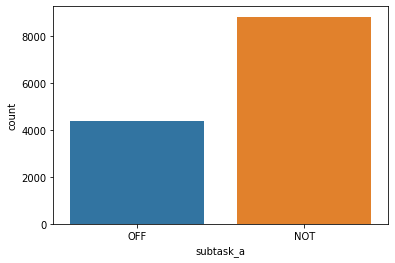

In [111]:
def graph_subtask(subtask):
    df[subtask].value_counts(normalize=True)*100
    sns.countplot(x=subtask, data=df)

graph_subtask('subtask_a')


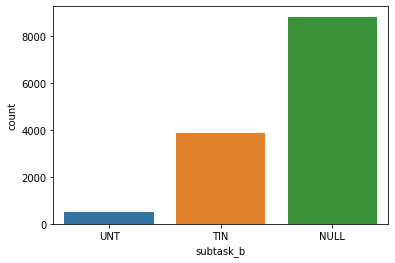

In [112]:
graph_subtask('subtask_b')

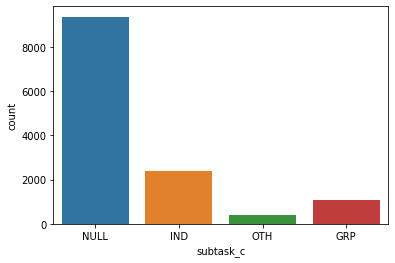

In [113]:
graph_subtask('subtask_c')

In [114]:
df

,id,tweet,subtask_a,subtask_b,subtask_c,tidy_tweet
0,86426,'should native americans what their take this',OFF,UNT,NULL,should native americans what their take this
1,90194,'home youre drunk #maga #trump2020 oncoming_fi...,OFF,TIN,IND,home youre drunk #maga #trump2020 oncoming_fis...
2,16820,'amazon investigating chinese employees sellin...,NOT,NULL,NULL,amazon investigating chinese employees selling...
3,62688,'someone shouldvetaken this piece shit volcano...,OFF,UNT,NULL,someone shouldvetaken this piece shit volcano ...
4,43605,'obama wanted liberals &amp illegals move into...,NOT,NULL,NULL,obama wanted liberals &amp illegals move into ...
5,97670,'liberals kookoo',OFF,TIN,OTH,liberals kookoo
6,77444,'noes tough shit',OFF,UNT,NULL,noes tough shit
7,52415,'literally just talking about this mass shooti...,OFF,TIN,GRP,literally just talking about this mass shootin...
8,45157,'more icecream',NOT,NULL,NULL,more icecream
9,13384,'canada doesnt need another cuck already have ...,OFF,TIN,IND,canada doesnt need another cuck already have e...


# Remove Stop Words

In [115]:
def remove_stopwords(df):
    nltk.download('stopwords')

    df_without_stopwords = pd.DataFrame(columns=['tidy_tweet','subtask_a','subtask_b','subtask_c'])
    without_wordlist=[]
    #NLTK stop words list
    stop_words_list = stopwords.words('english')

    #Combine wordcloud and NLTK stop words
    stop_words = ["will","take","should've"] + list(STOPWORDS)+stop_words_list

    for i in range(len(df)):
        querywords = df['tidy_tweet'][i].split()
        resultwords  = [word for word in querywords if word.lower() not in stop_words]
        without_wordlist.append(' '.join(resultwords))

    df_without_stopwords['tidy_tweet'] = without_wordlist
    df_without_stopwords['subtask_a']=df['subtask_a']
    df_without_stopwords['subtask_b']=df['subtask_b']
    df_without_stopwords['subtask_c']=df['subtask_c']
    return df_without_stopwords


In [116]:
df_without_stopwords=remove_stopwords(df)
df['tidy_tweet']=df_without_stopwords['tidy_tweet']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mhaiskao\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Stemming and Lemmatization

In [117]:
def Tokenize(df_stemming,df_without_stopwords):
    df_stemming['tokenized']=df_without_stopwords['tidy_tweet'].apply(lambda x: x.split())
    
def stemSentence(sentence):
    porter = PorterStemmer()
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

def WordTokenize(df_stemming,df_without_stopwords):
    df_stemming['word_tokenize']=df_without_stopwords['tidy_tweet'].apply(lambda x: stemSentence(x))
     
def SnowballStemmer1(df_stemming,df_without_stopwords):
    englishStemmer=SnowballStemmer("english")
    df_stemming['SnowballStemmer123']=df_without_stopwords['tidy_tweet'].apply(lambda x: englishStemmer.stem(x))
    
def Porter(df_stemming,df_without_stopwords):
    porter = PorterStemmer()
    df_stemming['Porter']=df_without_stopwords['tidy_tweet'].apply(lambda x: porter.stem(x))

def Lancaster(df_stemming,df_without_stopwords):
    lancaster=LancasterStemmer()
    df_stemming['Lancaster']=df_without_stopwords['tidy_tweet'].apply(lambda x: lancaster.stem(x))
    
def Lemmatizer(df_stemming,df_without_stopwords):
    lemmatizer = WordNetLemmatizer() 
    df_stemming['Lemmatized']=df_without_stopwords['tidy_tweet'].apply(lambda x: lemmatizer.lemmatize(x))

def StemmingAndLemma(df_stemming,df_without_stopwords):
    #Word Tokenize using word_tokenize    
    WordTokenize(df_stemming,df_without_stopwords)

    #SnowballStemmer
    SnowballStemmer1(df_stemming,df_without_stopwords)

    #Tokenizer
    Tokenize(df_stemming,df_without_stopwords)

    #Porter Stemmer
    Porter(df_stemming,df_without_stopwords)

    #Lancaster Stemmer
    Lancaster(df_stemming,df_without_stopwords)

    #Lemmatizer 
    Lemmatizer(df_stemming,df_without_stopwords)

    return df_stemming

df_stemming=pd.DataFrame()
df_stemming['tidy_tweet']=df_without_stopwords['tidy_tweet']

df_stemming=StemmingAndLemma(df_stemming,df_without_stopwords)

,tidy_tweet,word_tokenize,SnowballStemmer123,tokenized,Porter,Lancaster,Lemmatized
0,native americans,nativ american,native american,"[native, americans]",native american,native americans,native americans
1,home youre drunk #maga #trump2020 oncoming_fis...,home your drunk # maga # trump2020 oncoming_fi...,home youre drunk #maga #trump2020 oncoming_fis...,"[home, youre, drunk, #maga, #trump2020, oncomi...",home youre drunk #maga #trump2020 oncoming_fis...,home youre drunk #maga #trump2020 oncoming_fis...,home youre drunk #maga #trump2020 oncoming_fis...
2,amazon investigating chinese employees selling...,amazon investig chines employe sell intern dat...,amazon investigating chinese employees selling...,"[amazon, investigating, chinese, employees, se...",amazon investigating chinese employees selling...,amazon investigating chinese employees selling...,amazon investigating chinese employees selling...
3,someone shouldvetaken piece shit volcano face_...,someon shouldvetaken piec shit volcano face_wi...,someone shouldvetaken piece shit volcano face_...,"[someone, shouldvetaken, piece, shit, volcano,...",someone shouldvetaken piece shit volcano face_...,someone shouldvetaken piece shit volcano face_...,someone shouldvetaken piece shit volcano face_...
4,obama wanted liberals &amp illegals move states,obama want liber & amp illeg move state,obama wanted liberals &amp illegals move st,"[obama, wanted, liberals, &amp, illegals, move...",obama wanted liberals &amp illegals move st,obama wanted liberals &amp illegals move states,obama wanted liberals &amp illegals move states
5,liberals kookoo,liber kookoo,liberals kookoo,"[liberals, kookoo]",liberals kookoo,liberals kookoo,liberals kookoo
6,noes tough shit,noe tough shit,noes tough shit,"[noes, tough, shit]",noes tough shit,noes tough shit,noes tough shit
7,literally talking mass shootings propaganda us...,liter talk mass shoot propaganda use divid maj...,literally talking mass shootings propaganda us...,"[literally, talking, mass, shootings, propagan...",literally talking mass shootings propaganda us...,literally talking mass shootings propaganda us...,literally talking mass shootings propaganda us...
8,icecream,icecream,icecream,[icecream],icecream,icecream,icecream
9,canada doesnt need another cuck already enough...,canada doesnt need anoth cuck alreadi enough #...,canada doesnt need another cuck already enough...,"[canada, doesnt, need, another, cuck, already,...",canada doesnt need another cuck already enough...,canada doesnt need another cuck already enough...,canada doesnt need another cuck already enough...


# Remove words having frequency less than 3 from each Stemmed and Lematized Tweet

In [118]:
from collections import defaultdict  # available in Python 2.5 and newer

def get_frequency_of_words(df_stemming,column_name):
    print('Get Frequency for: ',column_name)
    Tweet_list=df_stemming[column_name]
    Dictionary_Tweet= defaultdict(int)
    Tweet_word_list=[]
    def update(i):
        Dictionary_Tweet[i] += 1
    [[ update(i) for i in tweet.split()] for tweet in Tweet_list]

    for key,value in Dictionary_Tweet.items():
        if value>3:
            Tweet_word_list.append(key)
    return Tweet_word_list

def remove_words_from_tweet(df_stemming,columnname,word_list):
    for i in range(len(df_stemming[columnname])):
        resultwords = [word for word in df_stemming[columnname][i].split() if word in word_list]
        if len(resultwords)!=0:
            df_stemming[columnname][i] = ' '.join(resultwords)
    return df_stemming

In [119]:

def frequency(df_stemming):
    #Get words with minimun 3 frequency for all stemming types
    tidy_tweet_list=get_frequency_of_words(df_stemming,'tidy_tweet')
    df_stemming=remove_words_from_tweet(df_stemming,'tidy_tweet',tidy_tweet_list)

    word_tokenize_list=get_frequency_of_words(df_stemming,'word_tokenize')
    df_stemming=remove_words_from_tweet(df_stemming,'word_tokenize',word_tokenize_list)

    SnowballStemmer123_list=get_frequency_of_words(df_stemming,'SnowballStemmer123')
    df_stemming=remove_words_from_tweet(df_stemming,'SnowballStemmer123',SnowballStemmer123_list)

    Porter_list=get_frequency_of_words(df_stemming,'Porter')
    df_stemming=remove_words_from_tweet(df_stemming,'Porter',Porter_list)

    Lancaster_list=get_frequency_of_words(df_stemming,'Lancaster')
    df_stemming=remove_words_from_tweet(df_stemming,'Lancaster',Lancaster_list)

    Lemmatized_list=get_frequency_of_words(df_stemming,'Lemmatized')
    df_stemming=remove_words_from_tweet(df_stemming,'Lemmatized',Lemmatized_list)
    
    return df_stemming
df_stemming=frequency(df_stemming)

ddfddddf tidy_tweet
ddfddddf word_tokenize
ddfddddf SnowballStemmer123
ddfddddf Porter
ddfddddf Lancaster
ddfddddf Lemmatized


# Final Upated Tweet's For Subtask A

In [120]:
df['tidy_tweet_updated']=df_stemming['tidy_tweet']
df['word_tokenize']=df_stemming['word_tokenize']
df['SnowballStemmer123']=df_stemming['SnowballStemmer123']
df['Porter']=df_stemming['Porter']
df['Lancaster']=df_stemming['Lancaster']
df['Lemmatized']=df_stemming['Lemmatized']
df.update("'" + df[['tidy_tweet','tidy_tweet_updated','word_tokenize','SnowballStemmer123','Porter','Lancaster','Lemmatized']].astype(str) + "'")
del df['id']
df

,tweet,subtask_a,subtask_b,subtask_c,tidy_tweet,tidy_tweet_updated,word_tokenize,SnowballStemmer123,Porter,Lancaster,Lemmatized
0,'should native americans what their take this',OFF,UNT,NULL,'native americans','native americans','nativ american','native american','native american','native americans','native americans'
1,'home youre drunk #maga #trump2020 oncoming_fi...,OFF,TIN,IND,'home youre drunk #maga #trump2020 oncoming_fi...,'home youre drunk #maga #trump2020 oncoming_fi...,'home your drunk # maga # trump2020 oncoming_f...,'home youre drunk #maga #trump2020 oncoming_fi...,'home youre drunk #maga #trump2020 oncoming_fi...,'home youre drunk #maga #trump2020 oncoming_fi...,'home youre drunk #maga #trump2020 oncoming_fi...
2,'amazon investigating chinese employees sellin...,NOT,NULL,NULL,'amazon investigating chinese employees sellin...,'amazon chinese employees selling data looking...,'amazon investig chines employe sell intern da...,'amazon chinese employees selling data looking...,'amazon chinese employees selling data looking...,'amazon chinese employees selling data looking...,'amazon chinese employees selling data looking...
3,'someone shouldvetaken this piece shit volcano...,OFF,UNT,NULL,'someone shouldvetaken piece shit volcano face...,'someone piece shit face_with_tears_of_joy','someon piec shit face_with_tears_of_joy','someone piece shit face_with_tears_of_joy','someone piece shit face_with_tears_of_joy','someone piece shit face_with_tears_of_joy','someone piece shit face_with_tears_of_joy'
4,'obama wanted liberals &amp illegals move into...,NOT,NULL,NULL,'obama wanted liberals &amp illegals move states','obama wanted liberals &amp illegals move states','obama want liber & amp illeg move state','obama wanted liberals &amp illegals move st','obama wanted liberals &amp illegals move st','obama wanted liberals &amp illegals move states','obama wanted liberals &amp illegals move states'
5,'liberals kookoo',OFF,TIN,OTH,'liberals kookoo','liberals','liber','liberals','liberals','liberals','liberals'
6,'noes tough shit',OFF,UNT,NULL,'noes tough shit','tough shit','tough shit','tough shit','tough shit','tough shit','tough shit'
7,'literally just talking about this mass shooti...,OFF,TIN,GRP,'literally talking mass shootings propaganda u...,'literally talking mass shootings propaganda u...,'liter talk mass shoot propaganda use divid ma...,'literally talking mass shootings propaganda u...,'literally talking mass shootings propaganda u...,'literally talking mass shootings propaganda u...,'literally talking mass shootings propaganda u...
8,'more icecream',NOT,NULL,NULL,'icecream','icecream','icecream ','icecream','icecream','icecream','icecream'
9,'canada doesnt need another cuck already have ...,OFF,TIN,IND,'canada doesnt need another cuck already enoug...,'canada doesnt need another already enough #li...,'canada doesnt need anoth alreadi enough # # l...,'canada doesnt need another already enough #li...,'canada doesnt need another already enough #li...,'canada doesnt need another already enough #li...,'canada doesnt need another already enough #li...


# Create ARFF File for Subtask A

In [123]:
column=['tidy_tweet_updated','word_tokenize','SnowballStemmer123','Porter','Lancaster','Lemmatized']

for col in column:
    f= open(r"C:\Users\Mhaiskao\Desktop\Assignments\DMTA\Maverick\SubTaskA\{}_subtaskA.arff".format(col),"a+")
    f.write("@relation Train\n")
    f.write("@attribute {} string\n".format(col))
    f.write("@attribute subtask_a {NOT,OFF}\n")
    f.write("@data\n")
    f.close()
    df[[col,'subtask_a']].to_csv(r"C:\Users\Mhaiskao\Desktop\Assignments\DMTA\Maverick\SubTaskA\{}_subtaskA.arff".format(col), header=False,index=False,mode='a',quotechar="'",quoting=3,escapechar='"')


# Generate Word Cloud for Subtask A


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mhaiskao\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


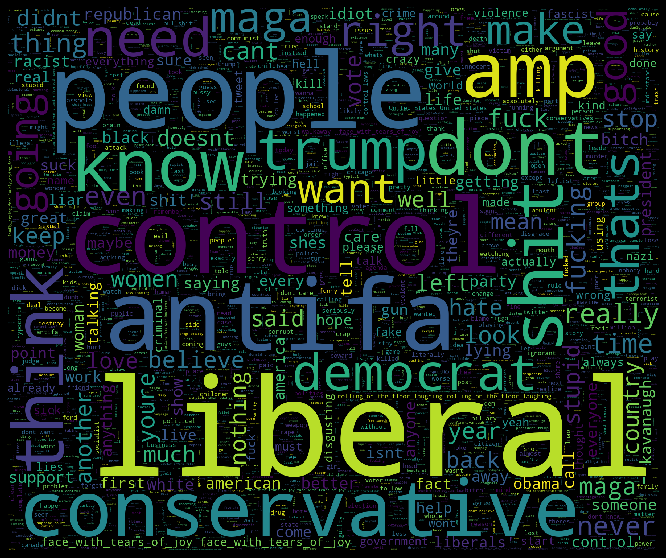

In [125]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def Plot_Wordcloud(df,columnname,subtask,target):
    nltk.download('stopwords')
    #NLTK stop words list
    stop_words_list = stopwords.words('english')

    #Combine wordcloud and NLTK stop words
    stop_words = ["will","take","should've"] + list(STOPWORDS)+stop_words_list

    all_words=' '.join([text for text in df[columnname][df[subtask]==target]])

    wordcloud=WordCloud(stopwords = stop_words,width=1800,height=1500,max_words=100000).generate(all_words)


    plt.figure(figsize=(20,10),facecolor='k')
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
Plot_Wordcloud(df,'tidy_tweet','subtask_a','OFF')

# Generate N Gram

In [124]:
from textblob import TextBlob
 
# Function to generate n-grams from sentences.
def extract_ngrams(data, num):
    n_grams = TextBlob(data).ngrams(num)
    return [ ' '.join(grams) for grams in n_grams]

def generate_ngram(df):
    ngram_list=[]
    ngram_subtask_a=[]
    ngram_subtask_b=[]
    ngram_subtask_c=[]

    for i in range(len(df)):
        querywords = df['tidy_tweet'][i].split()
        resultwords  = [word for word in extract_ngrams(df['tidy_tweet'][i], 2)]

        for words in resultwords:
            ngram_list.append(words)
            ngram_subtask_a.append(df['subtask_a'][i])
            ngram_subtask_b.append(df['subtask_b'][i])
            ngram_subtask_c.append(df['subtask_c'][i])

    df_ngram=pd.DataFrame()
    df_ngram['ngram']=ngram_list
    df_ngram['subtask_a']=ngram_subtask_a
    df_ngram['subtask_b']=ngram_subtask_b
    df_ngram['subtask_c']=ngram_subtask_c

    return df_ngram

df_ngram=generate_ngram(df)

df_ngram


,ngram,subtask_a,subtask_b,subtask_c
0,'native americans,OFF,UNT,NULL
1,'home youre,OFF,TIN,IND
2,youre drunk,OFF,TIN,IND
3,drunk maga,OFF,TIN,IND
4,maga trump2020,OFF,TIN,IND
5,trump2020 oncoming_fist,OFF,TIN,IND
6,oncoming_fist United_States,OFF,TIN,IND
7,United_States oncoming_fist,OFF,TIN,IND
8,'amazon investigating,NOT,NULL,NULL
9,investigating chinese,NOT,NULL,NULL


# Retrieve Tweets for Subtask B 

In [126]:
df_subtask_b=pd.DataFrame()
df_subtask_b = df.ix[(df['subtask_a'] == 'OFF'),['tidy_tweet','subtask_a','subtask_b','subtask_c']]
df_subtask_b = df_subtask_b.reset_index()
del df_subtask_b['index']
df_subtask_b

C:\Users\Mhaiskao\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,tidy_tweet,subtask_a,subtask_b,subtask_c
0,'native americans',OFF,UNT,NULL
1,'home youre drunk #maga #trump2020 oncoming_fi...,OFF,TIN,IND
2,'someone shouldvetaken piece shit volcano face...,OFF,UNT,NULL
3,'liberals kookoo',OFF,TIN,OTH
4,'noes tough shit',OFF,UNT,NULL
5,'literally talking mass shootings propaganda u...,OFF,TIN,GRP
6,'canada doesnt need another cuck already enoug...,OFF,TIN,IND
7,'lying corrupt traitor nobody wants hear anymo...,OFF,TIN,IND
8,'control kids asking',OFF,TIN,OTH
9,'throwing bullshit flag nonsense #putuporshutu...,OFF,TIN,IND


In [127]:
df_subtask_b['tidy_tweet']=df_subtask_b['tidy_tweet'].str.replace("'","")

,tidy_tweet,subtask_a,subtask_b,subtask_c
0,native americans,OFF,UNT,NULL
1,home youre drunk #maga #trump2020 oncoming_fis...,OFF,TIN,IND
2,someone shouldvetaken piece shit volcano face_...,OFF,UNT,NULL
3,liberals kookoo,OFF,TIN,OTH
4,noes tough shit,OFF,UNT,NULL
5,literally talking mass shootings propaganda us...,OFF,TIN,GRP
6,canada doesnt need another cuck already enough...,OFF,TIN,IND
7,lying corrupt traitor nobody wants hear anymor...,OFF,TIN,IND
8,control kids asking,OFF,TIN,OTH
9,throwing bullshit flag nonsense #putuporshutup...,OFF,TIN,IND


# Stemming and Lemmatization for Subtask B

In [128]:
df_stemming_b=pd.DataFrame()
df_stemming_b['tidy_tweet']=df_subtask_b['tidy_tweet']

df_stemming_b=StemmingAndLemma(df_stemming_b,df_subtask_b)

,tidy_tweet,word_tokenize,SnowballStemmer123,tokenized,Porter,Lancaster,Lemmatized
0,native americans,nativ american,native american,"[native, americans]",native american,native americans,native americans
1,home youre drunk #maga #trump2020 oncoming_fis...,home your drunk # maga # trump2020 oncoming_fi...,home youre drunk #maga #trump2020 oncoming_fis...,"[home, youre, drunk, #maga, #trump2020, oncomi...",home youre drunk #maga #trump2020 oncoming_fis...,home youre drunk #maga #trump2020 oncoming_fis...,home youre drunk #maga #trump2020 oncoming_fis...
2,someone shouldvetaken piece shit volcano face_...,someon shouldvetaken piec shit volcano face_wi...,someone shouldvetaken piece shit volcano face_...,"[someone, shouldvetaken, piece, shit, volcano,...",someone shouldvetaken piece shit volcano face_...,someone shouldvetaken piece shit volcano face_...,someone shouldvetaken piece shit volcano face_...
3,liberals kookoo,liber kookoo,liberals kookoo,"[liberals, kookoo]",liberals kookoo,liberals kookoo,liberals kookoo
4,noes tough shit,noe tough shit,noes tough shit,"[noes, tough, shit]",noes tough shit,noes tough shit,noes tough shit
5,literally talking mass shootings propaganda us...,liter talk mass shoot propaganda use divid maj...,literally talking mass shootings propaganda us...,"[literally, talking, mass, shootings, propagan...",literally talking mass shootings propaganda us...,literally talking mass shootings propaganda us...,literally talking mass shootings propaganda us...
6,canada doesnt need another cuck already enough...,canada doesnt need anoth cuck alreadi enough #...,canada doesnt need another cuck already enough...,"[canada, doesnt, need, another, cuck, already,...",canada doesnt need another cuck already enough...,canada doesnt need another cuck already enough...,canada doesnt need another cuck already enough...
7,lying corrupt traitor nobody wants hear anymor...,lie corrupt traitor nobodi want hear anymor li...,lying corrupt traitor nobody wants hear anymor...,"[lying, corrupt, traitor, nobody, wants, hear,...",lying corrupt traitor nobody wants hear anymor...,lying corrupt traitor nobody wants hear anymor...,lying corrupt traitor nobody wants hear anymor...
8,control kids asking,control kid ask,control kids ask,"[control, kids, asking]",control kids ask,control kids asking,control kids asking
9,throwing bullshit flag nonsense #putuporshutup...,throw bullshit flag nonsens # putuporshutup # ...,throwing bullshit flag nonsense #putuporshutup...,"[throwing, bullshit, flag, nonsense, #putupors...",throwing bullshit flag nonsense #putuporshutup...,throwing bullshit flag nonsense #putuporshutup...,throwing bullshit flag nonsense #putuporshutup...


# Remove words with frequency less than 3

In [129]:
df_stemming_b=frequency(df_stemming_b)

ddfddddf tidy_tweet
ddfddddf word_tokenize
ddfddddf SnowballStemmer123
ddfddddf Porter
ddfddddf Lancaster
ddfddddf Lemmatized


,tidy_tweet,word_tokenize,SnowballStemmer123,tokenized,Porter,Lancaster,Lemmatized
0,native americans,nativ american,native american,"[native, americans]",native american,native americans,native americans
1,home youre drunk #maga #trump2020 oncoming_fis...,home your drunk # maga # trump2020 oncoming_fi...,home youre drunk #maga #trump2020 oncoming_fis...,"[home, youre, drunk, #maga, #trump2020, oncomi...",home youre drunk #maga #trump2020 oncoming_fis...,home youre drunk #maga #trump2020 oncoming_fis...,home youre drunk #maga #trump2020 oncoming_fis...
2,someone piece shit face_with_tears_of_joy,someon piec shit face_with_tears_of_joy,someone piece shit face_with_tears_of_joy,"[someone, shouldvetaken, piece, shit, volcano,...",someone piece shit face_with_tears_of_joy,someone piece shit face_with_tears_of_joy,someone piece shit face_with_tears_of_joy
3,liberals,liber,liberals,"[liberals, kookoo]",liberals,liberals,liberals
4,tough shit,tough shit,tough shit,"[noes, tough, shit]",tough shit,tough shit,tough shit
5,literally talking mass shootings propaganda us...,liter talk mass shoot propaganda use divid maj...,literally talking mass shootings propaganda us...,"[literally, talking, mass, shootings, propagan...",literally talking mass shootings propaganda us...,literally talking mass shootings propaganda us...,literally talking mass shootings propaganda us...
6,canada doesnt need another already enough #lib...,canada doesnt need anoth alreadi enough # # li...,canada doesnt need another already enough #lib...,"[canada, doesnt, need, another, cuck, already,...",canada doesnt need another already enough #lib...,canada doesnt need another already enough #lib...,canada doesnt need another already enough #lib...
7,lying corrupt traitor nobody wants hear anymor...,lie corrupt traitor nobodi want hear anymor lie #,lying corrupt traitor nobody wants hear anymor...,"[lying, corrupt, traitor, nobody, wants, hear,...",lying corrupt traitor nobody wants hear anymor...,lying corrupt traitor nobody wants hear anymor...,lying corrupt traitor nobody wants hear anymor...
8,control kids asking,control kid ask,control kids,"[control, kids, asking]",control kids,control kids asking,control kids asking
9,throwing bullshit flag nonsense #kavanaugh #maga,throw bullshit flag nonsens # # kavanaugh # ma...,throwing bullshit flag nonsense #kavanaugh #maga,"[throwing, bullshit, flag, nonsense, #putupors...",throwing bullshit flag nonsense #kavanaugh #maga,throwing bullshit flag nonsense #kavanaugh #maga,throwing bullshit flag nonsense #kavanaugh #maga


# Final Updated Tweet's for Subtask_B

In [130]:
df_subtask_b['tidy_tweet_updated']=df_stemming_b['tidy_tweet']
df_subtask_b['word_tokenize']=df_stemming_b['word_tokenize']
df_subtask_b['SnowballStemmer123']=df_stemming_b['SnowballStemmer123']
df_subtask_b['Porter']=df_stemming_b['Porter']
df_subtask_b['Lancaster']=df_stemming_b['Lancaster']
df_subtask_b['Lemmatized']=df_stemming_b['Lemmatized']

df_subtask_b.update("'" + df_subtask_b[['tidy_tweet','tidy_tweet_updated','word_tokenize','SnowballStemmer123','Porter','Lancaster','Lemmatized']].astype(str) + "'")
df_subtask_b

,tidy_tweet,subtask_a,subtask_b,subtask_c,tidy_tweet_updated,word_tokenize,SnowballStemmer123,Porter,Lancaster,Lemmatized
0,'native americans',OFF,UNT,NULL,'native americans','nativ american','native american','native american','native americans','native americans'
1,'home youre drunk #maga #trump2020 oncoming_fi...,OFF,TIN,IND,'home youre drunk #maga #trump2020 oncoming_fi...,'home your drunk # maga # trump2020 oncoming_f...,'home youre drunk #maga #trump2020 oncoming_fi...,'home youre drunk #maga #trump2020 oncoming_fi...,'home youre drunk #maga #trump2020 oncoming_fi...,'home youre drunk #maga #trump2020 oncoming_fi...
2,'someone shouldvetaken piece shit volcano face...,OFF,UNT,NULL,'someone piece shit face_with_tears_of_joy','someon piec shit face_with_tears_of_joy','someone piece shit face_with_tears_of_joy','someone piece shit face_with_tears_of_joy','someone piece shit face_with_tears_of_joy','someone piece shit face_with_tears_of_joy'
3,'liberals kookoo',OFF,TIN,OTH,'liberals','liber','liberals','liberals','liberals','liberals'
4,'noes tough shit',OFF,UNT,NULL,'tough shit','tough shit','tough shit','tough shit','tough shit','tough shit'
5,'literally talking mass shootings propaganda u...,OFF,TIN,GRP,'literally talking mass shootings propaganda u...,'liter talk mass shoot propaganda use divid ma...,'literally talking mass shootings propaganda u...,'literally talking mass shootings propaganda u...,'literally talking mass shootings propaganda u...,'literally talking mass shootings propaganda u...
6,'canada doesnt need another cuck already enoug...,OFF,TIN,IND,'canada doesnt need another already enough #li...,'canada doesnt need anoth alreadi enough # # l...,'canada doesnt need another already enough #li...,'canada doesnt need another already enough #li...,'canada doesnt need another already enough #li...,'canada doesnt need another already enough #li...
7,'lying corrupt traitor nobody wants hear anymo...,OFF,TIN,IND,'lying corrupt traitor nobody wants hear anymo...,'lie corrupt traitor nobodi want hear anymor l...,'lying corrupt traitor nobody wants hear anymo...,'lying corrupt traitor nobody wants hear anymo...,'lying corrupt traitor nobody wants hear anymo...,'lying corrupt traitor nobody wants hear anymo...
8,'control kids asking',OFF,TIN,OTH,'control kids asking','control kid ask','control kids','control kids','control kids asking','control kids asking'
9,'throwing bullshit flag nonsense #putuporshutu...,OFF,TIN,IND,'throwing bullshit flag nonsense #kavanaugh #m...,'throw bullshit flag nonsens # # kavanaugh # m...,'throwing bullshit flag nonsense #kavanaugh #m...,'throwing bullshit flag nonsense #kavanaugh #m...,'throwing bullshit flag nonsense #kavanaugh #m...,'throwing bullshit flag nonsense #kavanaugh #m...


# Create ARFF File for Subtask B

In [132]:
column=['tidy_tweet_updated','word_tokenize','SnowballStemmer123','Porter','Lancaster','Lemmatized']

for col in column:
    f= open(r"C:\Users\Mhaiskao\Desktop\Assignments\DMTA\Maverick\SubTaskB\{}_subtaskB.arff".format(col),"a+")
    f.write("@relation Train\n")
    f.write("@attribute {} string\n".format(col))
    f.write("@attribute subtask_b {UNT,TIN}\n")
    f.write("@data\n")
    f.close()
    df_subtask_b[[col,'subtask_b']].to_csv(r"C:\Users\Mhaiskao\Desktop\Assignments\DMTA\Maverick\SubTaskB\{}_subtaskB.arff".format(col), header=False,index=False,mode='a',quotechar="'",quoting=3,escapechar='"')


# WordCloud for Subtask B

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mhaiskao\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


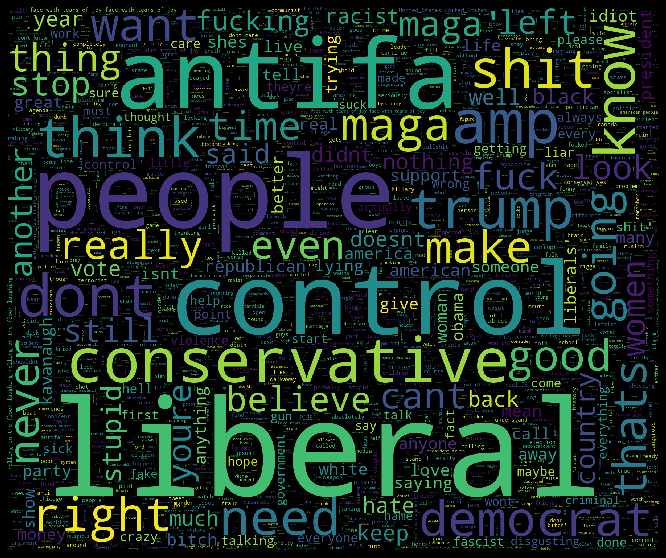

In [133]:
Plot_Wordcloud(df_subtask_b,'tidy_tweet','subtask_b','TIN')

# Retrieve Tweets for Subtask C

In [134]:
df_subtask_c=pd.DataFrame()
df_subtask_c = df_subtask_b.ix[(df_subtask_b['subtask_b'] == 'TIN'),['tidy_tweet','subtask_a','subtask_b','subtask_c']]
df_subtask_c = df_subtask_c.reset_index()
del df_subtask_c['index']

df_subtask_c

C:\Users\Mhaiskao\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,tidy_tweet,subtask_a,subtask_b,subtask_c
0,'home youre drunk #maga #trump2020 oncoming_fi...,OFF,TIN,IND
1,'liberals kookoo',OFF,TIN,OTH
2,'literally talking mass shootings propaganda u...,OFF,TIN,GRP
3,'canada doesnt need another cuck already enoug...,OFF,TIN,IND
4,'lying corrupt traitor nobody wants hear anymo...,OFF,TIN,IND
5,'control kids asking',OFF,TIN,OTH
6,'throwing bullshit flag nonsense #putuporshutu...,OFF,TIN,IND
7,'kind conservatives wanna associate everyone l...,OFF,TIN,GRP
8,'fuck going people theres mens room womens roo...,OFF,TIN,GRP
9,'days dont people general dont connect people ...,OFF,TIN,IND


In [135]:
df_subtask_c['tidy_tweet']=df_subtask_c['tidy_tweet'].str.replace("'","")

,tidy_tweet,subtask_a,subtask_b,subtask_c
0,home youre drunk #maga #trump2020 oncoming_fis...,OFF,TIN,IND
1,liberals kookoo,OFF,TIN,OTH
2,literally talking mass shootings propaganda us...,OFF,TIN,GRP
3,canada doesnt need another cuck already enough...,OFF,TIN,IND
4,lying corrupt traitor nobody wants hear anymor...,OFF,TIN,IND
5,control kids asking,OFF,TIN,OTH
6,throwing bullshit flag nonsense #putuporshutup...,OFF,TIN,IND
7,kind conservatives wanna associate everyone le...,OFF,TIN,GRP
8,fuck going people theres mens room womens room...,OFF,TIN,GRP
9,days dont people general dont connect people d...,OFF,TIN,IND


# Stemming and Lemmatization for Subtask C

In [136]:
df_stemming_c=pd.DataFrame()
df_stemming_c['tidy_tweet']=df_subtask_c['tidy_tweet']

df_stemming_c=StemmingAndLemma(df_stemming_c,df_subtask_c)

,tidy_tweet,word_tokenize,SnowballStemmer123,tokenized,Porter,Lancaster,Lemmatized
0,home youre drunk #maga #trump2020 oncoming_fis...,home your drunk # maga # trump2020 oncoming_fi...,home youre drunk #maga #trump2020 oncoming_fis...,"[home, youre, drunk, #maga, #trump2020, oncomi...",home youre drunk #maga #trump2020 oncoming_fis...,home youre drunk #maga #trump2020 oncoming_fis...,home youre drunk #maga #trump2020 oncoming_fis...
1,liberals kookoo,liber kookoo,liberals kookoo,"[liberals, kookoo]",liberals kookoo,liberals kookoo,liberals kookoo
2,literally talking mass shootings propaganda us...,liter talk mass shoot propaganda use divid maj...,literally talking mass shootings propaganda us...,"[literally, talking, mass, shootings, propagan...",literally talking mass shootings propaganda us...,literally talking mass shootings propaganda us...,literally talking mass shootings propaganda us...
3,canada doesnt need another cuck already enough...,canada doesnt need anoth cuck alreadi enough #...,canada doesnt need another cuck already enough...,"[canada, doesnt, need, another, cuck, already,...",canada doesnt need another cuck already enough...,canada doesnt need another cuck already enough...,canada doesnt need another cuck already enough...
4,lying corrupt traitor nobody wants hear anymor...,lie corrupt traitor nobodi want hear anymor li...,lying corrupt traitor nobody wants hear anymor...,"[lying, corrupt, traitor, nobody, wants, hear,...",lying corrupt traitor nobody wants hear anymor...,lying corrupt traitor nobody wants hear anymor...,lying corrupt traitor nobody wants hear anymor...
5,control kids asking,control kid ask,control kids ask,"[control, kids, asking]",control kids ask,control kids asking,control kids asking
6,throwing bullshit flag nonsense #putuporshutup...,throw bullshit flag nonsens # putuporshutup # ...,throwing bullshit flag nonsense #putuporshutup...,"[throwing, bullshit, flag, nonsense, #putupors...",throwing bullshit flag nonsense #putuporshutup...,throwing bullshit flag nonsense #putuporshutup...,throwing bullshit flag nonsense #putuporshutup...
7,kind conservatives wanna associate everyone le...,kind conserv wan na associ everyon left commun...,kind conservatives wanna associate everyone le...,"[kind, conservatives, wanna, associate, everyo...",kind conservatives wanna associate everyone le...,kind conservatives wanna associate everyone le...,kind conservatives wanna associate everyone le...
8,fuck going people theres mens room womens room...,fuck go peopl there men room women room pick s...,fuck going people theres mens room womens room...,"[fuck, going, people, theres, mens, room, wome...",fuck going people theres mens room womens room...,fuck going people theres mens room womens room...,fuck going people theres mens room womens room...
9,days dont people general dont connect people d...,day dont peopl gener dont connect peopl day an...,days dont people general dont connect people d...,"[days, dont, people, general, dont, connect, p...",days dont people general dont connect people d...,days dont people general dont connect people d...,days dont people general dont connect people d...


# Remove words with frequency less than 3

In [137]:
df_stemming_c=frequency(df_stemming_c)

ddfddddf tidy_tweet
ddfddddf word_tokenize
ddfddddf SnowballStemmer123
ddfddddf Porter
ddfddddf Lancaster
ddfddddf Lemmatized


,tidy_tweet,word_tokenize,SnowballStemmer123,tokenized,Porter,Lancaster,Lemmatized
0,home youre drunk #maga #trump2020 oncoming_fis...,home your drunk # maga # trump2020 oncoming_fi...,home youre drunk #maga #trump2020 oncoming_fis...,"[home, youre, drunk, #maga, #trump2020, oncomi...",home youre drunk #maga #trump2020 oncoming_fis...,home youre drunk #maga #trump2020 oncoming_fis...,home youre drunk #maga #trump2020 oncoming_fis...
1,liberals,liber,liberals,"[liberals, kookoo]",liberals,liberals,liberals
2,literally talking mass shootings propaganda us...,liter talk mass shoot propaganda use divid maj...,literally talking mass shootings propaganda us...,"[literally, talking, mass, shootings, propagan...",literally talking mass shootings propaganda us...,literally talking mass shootings propaganda us...,literally talking mass shootings propaganda us...
3,canada doesnt need another already enough #lib...,canada doesnt need anoth alreadi enough # # li...,canada doesnt need another already enough #lib...,"[canada, doesnt, need, another, cuck, already,...",canada doesnt need another already enough #lib...,canada doesnt need another already enough #lib...,canada doesnt need another already enough #lib...
4,lying corrupt traitor nobody wants hear anymor...,lie corrupt traitor nobodi want hear anymor lie #,lying corrupt traitor nobody wants hear anymor...,"[lying, corrupt, traitor, nobody, wants, hear,...",lying corrupt traitor nobody wants hear anymor...,lying corrupt traitor nobody wants hear anymor...,lying corrupt traitor nobody wants hear anymor...
5,control kids asking,control kid ask,control kids,"[control, kids, asking]",control kids,control kids asking,control kids asking
6,throwing bullshit flag nonsense #kavanaugh #maga,throw bullshit flag nonsens # # kavanaugh # ma...,throwing bullshit flag nonsense #kavanaugh #maga,"[throwing, bullshit, flag, nonsense, #putupors...",throwing bullshit flag nonsense #kavanaugh #maga,throwing bullshit flag nonsense #kavanaugh #maga,throwing bullshit flag nonsense #kavanaugh #maga
7,kind conservatives wanna everyone left communi...,kind conserv wan na associ everyon left commun...,kind conservatives wanna everyone left communi...,"[kind, conservatives, wanna, associate, everyo...",kind conservatives wanna everyone left communi...,kind conservatives wanna everyone left communi...,kind conservatives wanna everyone left communi...
8,fuck going people theres room womens room pick...,fuck go peopl there men room women room pick s...,fuck going people theres room womens room pick...,"[fuck, going, people, theres, mens, room, wome...",fuck going people theres room womens room pick...,fuck going people theres room womens room pick...,fuck going people theres room womens room pick...
9,days dont people general dont people days,day dont peopl gener dont connect peopl day annoy,days dont people general dont people days,"[days, dont, people, general, dont, connect, p...",days dont people general dont people days,days dont people general dont people days,days dont people general dont people days


# Final Updated Tweet's for Subtask_C

In [138]:
df_subtask_c['tidy_tweet_updated']=df_stemming_c['tidy_tweet']
df_subtask_c['word_tokenize']=df_stemming_c['word_tokenize']
df_subtask_c['SnowballStemmer123']=df_stemming_c['SnowballStemmer123']
df_subtask_c['Porter']=df_stemming_c['Porter']
df_subtask_c['Lancaster']=df_stemming_c['Lancaster']
df_subtask_c['Lemmatized']=df_stemming_c['Lemmatized']
df_subtask_c.update("'" + df_subtask_c[['tidy_tweet','tidy_tweet_updated','word_tokenize','SnowballStemmer123','Porter','Lancaster','Lemmatized']].astype(str) + "'")

df_subtask_c

,tidy_tweet,subtask_a,subtask_b,subtask_c,tidy_tweet_updated,word_tokenize,SnowballStemmer123,Porter,Lancaster,Lemmatized
0,'home youre drunk #maga #trump2020 oncoming_fi...,OFF,TIN,IND,'home youre drunk #maga #trump2020 oncoming_fi...,'home your drunk # maga # trump2020 oncoming_f...,'home youre drunk #maga #trump2020 oncoming_fi...,'home youre drunk #maga #trump2020 oncoming_fi...,'home youre drunk #maga #trump2020 oncoming_fi...,'home youre drunk #maga #trump2020 oncoming_fi...
1,'liberals kookoo',OFF,TIN,OTH,'liberals','liber','liberals','liberals','liberals','liberals'
2,'literally talking mass shootings propaganda u...,OFF,TIN,GRP,'literally talking mass shootings propaganda u...,'liter talk mass shoot propaganda use divid ma...,'literally talking mass shootings propaganda u...,'literally talking mass shootings propaganda u...,'literally talking mass shootings propaganda u...,'literally talking mass shootings propaganda u...
3,'canada doesnt need another cuck already enoug...,OFF,TIN,IND,'canada doesnt need another already enough #li...,'canada doesnt need anoth alreadi enough # # l...,'canada doesnt need another already enough #li...,'canada doesnt need another already enough #li...,'canada doesnt need another already enough #li...,'canada doesnt need another already enough #li...
4,'lying corrupt traitor nobody wants hear anymo...,OFF,TIN,IND,'lying corrupt traitor nobody wants hear anymo...,'lie corrupt traitor nobodi want hear anymor l...,'lying corrupt traitor nobody wants hear anymo...,'lying corrupt traitor nobody wants hear anymo...,'lying corrupt traitor nobody wants hear anymo...,'lying corrupt traitor nobody wants hear anymo...
5,'control kids asking',OFF,TIN,OTH,'control kids asking','control kid ask','control kids','control kids','control kids asking','control kids asking'
6,'throwing bullshit flag nonsense #putuporshutu...,OFF,TIN,IND,'throwing bullshit flag nonsense #kavanaugh #m...,'throw bullshit flag nonsens # # kavanaugh # m...,'throwing bullshit flag nonsense #kavanaugh #m...,'throwing bullshit flag nonsense #kavanaugh #m...,'throwing bullshit flag nonsense #kavanaugh #m...,'throwing bullshit flag nonsense #kavanaugh #m...
7,'kind conservatives wanna associate everyone l...,OFF,TIN,GRP,'kind conservatives wanna everyone left commun...,'kind conserv wan na associ everyon left commu...,'kind conservatives wanna everyone left commun...,'kind conservatives wanna everyone left commun...,'kind conservatives wanna everyone left commun...,'kind conservatives wanna everyone left commun...
8,'fuck going people theres mens room womens roo...,OFF,TIN,GRP,'fuck going people theres room womens room pic...,'fuck go peopl there men room women room pick ...,'fuck going people theres room womens room pic...,'fuck going people theres room womens room pic...,'fuck going people theres room womens room pic...,'fuck going people theres room womens room pic...
9,'days dont people general dont connect people ...,OFF,TIN,IND,'days dont people general dont people days','day dont peopl gener dont connect peopl day a...,'days dont people general dont people days','days dont people general dont people days','days dont people general dont people days','days dont people general dont people days'


# Create ARFF File for Subtask C

In [139]:
column=['tidy_tweet_updated','word_tokenize','SnowballStemmer123','Porter','Lancaster','Lemmatized']

for col in column:
    f= open(r"C:\Users\Mhaiskao\Desktop\Assignments\DMTA\Maverick\SubTaskC\{}_subtaskC.arff".format(col),"a+")
    f.write("@relation Train\n")
    f.write("@attribute {} string\n".format(col))
    f.write("@attribute subtask_c {IND,OTH,GRP}\n")
    f.write("@data\n")
    f.close()
    df_subtask_c[[col,'subtask_c']].to_csv(r"C:\Users\Mhaiskao\Desktop\Assignments\DMTA\Maverick\SubTaskC\{}_subtaskC.arff".format(col), header=False,index=False,mode='a',quotechar="'",quoting=3,escapechar='"')


# WordCloud for Subtask C

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mhaiskao\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


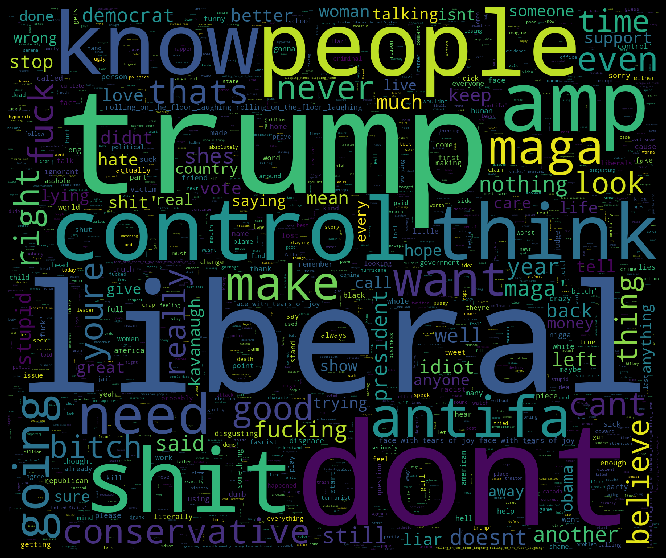

In [140]:
Plot_Wordcloud(df_subtask_c,'tidy_tweet','subtask_c','IND')

# **********  Test File  **********


In [141]:
df_test_a=pd.read_csv(r'C:\Users\Mhaiskao\Desktop\Assignments\DMTA\test_a.csv',sep=',', encoding="utf-8",quotechar='\0')
df_test_b=pd.read_csv(r'C:\Users\Mhaiskao\Desktop\Assignments\DMTA\test_b.csv',sep=',', encoding="utf-8",quotechar='\0')
df_test_c=pd.read_csv(r'C:\Users\Mhaiskao\Desktop\Assignments\DMTA\test_c.csv',sep=',', encoding="utf-8",quotechar='\0')

# Remove Punctuations

In [143]:
df_test_a=preparation(df_test_a)
df_test_b=preparation(df_test_b)
df_test_c=preparation(df_test_c)


C:\Users\Mhaiskao\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Mhaiskao\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Mhaiskao\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipy

0 '#whoisq #wherestheserver #dumpnike #declasfisa democrats support antifa muslim brotherhood isis pedophilia child trafficking taxpayer funded abortion election fraud sedition treason #lockthemallup #wwg #qanon'
1 #constitutionday revered conservatives hated progressives socialist democrats that want change
2 #foxnews #nra #maga #potus #trump ndamendment #rnc #usmc #veterans #fakereporting #theswamp #dnc #liberals #fakeoutrage first reduces
3 #watching #boomer getting news that still parole always makes smile #wentworth finale such treasure
4 #nopasaran unity demo oppose right #london #antifa #oct enough enough
5 what fuck this time
6 #rap form used express yourself freely does green light excuse behavior acting like animal streets where violence living elevate yourself level longevity #queen
7 feeling kissing behind humiliate later
8 tips enhance audience connection facebook #socialmedia #smm
9 #biggbosstamil janani task going first final list
10 #conservatives party taxation #tories

80 antifa level influence scary
81 have three accounts quasi anonymous completely anon twitter ever bans quasi anon make anon accounts tweet most insane shit will drown twitter bullshit those banned make even more
82 #maga alert biden #trump supporters dregs society video
83 cerc boyd stock sole holder stock among hedge funds track
84 city chicago democrat with some strictest control nation what your point #notthatbright
85 #liberals pathetic innocent until proven guilty mean much #democrats should look their party they need rapist hang #kavanaughisinnocent #walkawayfromdemocrats #liberallies straight from pitts hell
86 #trump many things entertaining thanks #twitter
87 million reallocated from fema this gives zero shits about anyone named trump atlantic
88 #fortnitebattleroyale #xboxshare please this cheating scum literally invisible
89 once read about invented bulbs failure differently wayz doing differently genius#
90 aunfettered repeal control laws government then people should abl

170 #cognitivedissonancechallenge this will painful conservatives proceed with caution
171 #chequers crashes burns #strasbourg along with #may hopes clinging power support ebbing away party #parliament country time load webley
172 #john fund kavanaugh ford controversy over again even some honest liberals upset
173 #elitist #actors #nbc #liberals #dems #hollywood #emmy awards toothless #nbc self promotion onslaught peppered with #metoo cracks planned staged okay because they #democrats #socialist #liberals #left #walkaway
174 kellerman knows only thing more then average boxing brady hater will rodgers maybe better thrower marino better then brady look playoff record
175 #drford #dearprofessorford fraud female group paid organized #georgesoros
176 #osaka says crowd noisy really didn what going focus such great champ confused when score went
177 #bluewave #dumptrump give love cooperate compromise conservatives trump supporters constantly vilify marginalized groups constantly attack women 

248 #maga ideas could have done
249 #christinebford #liberalsaredesperate every time liberals there they racism sexual assault hard believe
250 summarize rankings game mode just picture
251 #learn from become #better instead remaining #stuck become #bitter #clifeclearly #clifethryve #aboutthatlife #clifemacon
252 #kamalaharris president will never #potus sadly guaranteed leadership role politics much like #diannefeinstein that reality liberal california #nancypelosi #chuckschumer #cnn #msnbc
253 levi strauss never been afraid take unpopular stand support greater good what about when they shut down manufacturing america that wasn even news story when happened maybe they right wasn unpopular
254 #repost giving word with this jacket #preach #saynotofuckboys #dontgiveyourmagictomuggles
255 #emmys sooo lovely love dress colour design looks like fairy tales very tender
256 #change remember past administrations chant change there change carried same baton nothing this potus making changes doe

320 #analysis supporters people party canada would likely bristle being called liberal beliefs classic definition pittis
321 definitely high puerto rico about democrats provide proof providing names locations next shouldn that hard hope mind will holding breath
322 #pickett #individual needs part #team #loner within family #bowtruckles feels #bullied #attachment issues also incredibly #agile great #value #teachers #parents #atypical
323 #avalanche sorry love asshole know #maga
324 alien from future
325 #creampuffs #hollsteinforever just quick reminder that doing giveaway anyone attending #clexaconlondon interested attending natasha improv workshop just reply will draw free ticket entries close midnight
326 #familiarwife crazy wait interested assistant manager guys look like good pair having some just over here lets live life lets news collision there congestion
327 #broncos vance joseph phillip lindsay good football player only running back
328 celine swittins follback erza jullian #op

397 #muskokalakes mayoralty candidate terry ledger says running mayoral campaign social media only this speaks volumes kind behind closed doors mayor plans what muskoka give your opinion
398 #greatawakening #qanon #patriotsunited #wwg #areyouawake when awake clearly check this video
399 million buyout could easily cable news that path chooses good
400 actually question people want more than angela been meaner says word repeatly makes eating disorders sexually harasses houseguests just much underdog dont that excuse #tangela
401 #newvideo toys anyone
402 #bestwaytoawomansheart wake napping
403 surprised starts from karma bitch watch
404 sure send left antifa thugs
405 #notetomystalker empire remember thing incumbent central govt india nature life ancestors parents have lived true nature will trapping nature trapping only time will tell
406 alright right with mother nature like fuck humans
407 #farticus maybe
408 #hillary least other #angrydemocrats #worldwarq #wwg #maga #redtsunami #ame

473 temp barometer inches rain wind
474 #conservatives vote vote vote take friends polls midterms #nocomplacency
475 #diversity only works when those joining group want part team #islam hates every muslim #fail #unicorns
476 being down makes realize much taller again reach kissss
477 want more shootings more death then listen aclu black lives matter antifa want public safety then listen police professionals have been studying this years jeff sessions
478 want kick twitterfuck
479 #menfesswglca dremiest dream come true that ever from
480 #faileddemfeinstein should have quit decades disgrace feinstein blames after kavanaugh stays admits everything truthful
481 #cheeringthechutiyapa just because woman
482 really hasn even seen letter this sham subtle banana pool table cant difi throws hail mary hour foul elast ford have antifa coming burn house down dems going down hard
483 fascism also against liberals antifa according your meme
484 #ripmacmiller loved
485 #creagboy running around mcdona

555 anyway this game sucks
556 take someone silence pride perhaps busy fighting with self abitalib
557 #nintendo #animalcrossing #smashbrosultimate little late just adorable love isabelle
558 #nowplaying kierra kiki sheard
559 #ibelieveblaseyford liar ugly libreal #snowflake sold herself some cash from dems iran spoke after #johnkerryiranmeeting
560 #charitytuesday join with take from disabled women over #votetory today
561 #maga dems using false allegation kavanaugh sexual assault bargaining chip against release classified docs president trump
562 been watching team some insight into this president that sure
563 #nfl long
564 #lidc believe julieanna godard leader because work many digitally driven industries leader because established network creatives team while influencing promoting businesses many young entrepreneurs well
565 #art #kag #maga #patriot alfa warior lion roaring #super #hero #trump #vote most viktorius warior ever defeating enemy #liars #liberals #politicians #nwo #con

642 #kavanaugh john fund kavanaugh ford controversy over again even some honest liberals upset
643 control takes guns abiding citizens that
644 #antifa #resist trump trying bring world peace obstruct like democrats this good also haters gonna hate
645 advocate model natural beauty
646 #maga #kavanaughconfirmationhearings postponing votes well lets same open hush fund books
647 #ticktock formally charged mishandling sensitive material will have choice release proof that guilty high treason against united states selling patented military secrets saudi arabian government
648 #backtheblue jeff sessions listen aclu antifa black lives matter want more chicago shootings
649 #conservatives just like #garbage bags blowing wind here garbage
650 #tipoftheday giving #coffee gift part gift make sure airtight container valve sealed ties cute preserve coffee past week join mailing list more tips facts coffee news
651 #arizona #tennessee #alaska soon these rinos liberals reelection vote them #drainthe

719 #brexit deal been reached with hold onto your hats #hardbrexit #brexitdeal #chequersdeal #chuckchequers #mbga #mega #mcga #maga #conservatives #patriots #mayout #maymustgo
720 reminder that david harcourt classic everyone wants fuehrer history national socialism australia zealand avail #antifa #auspol #fcknzs
721 titty
722 manapun plot foto hanya penanda faceclaim
723 #texas wake socialist mesmerizing weak minded your state texas crying loud places that embody american spirit individual freedom texas standard bearer make damn stand your great senator #savetexas
724 #pastramicity that hadn found sooner doing music which still amazing
725 #wcw zamalek zamo mapholoba first friend upto today still muntu love pholobs years strong
726 #proudfatherswithrtg wait hope will hppn
727 very irrelevant they didn find weed they would have grade picture wearing hoodie talk about what thug
728 #chequers dead time move #supercanada been offered should take time face fact retire appoint leader probab

801 taller
802 #hiac this match with becky charlotte kinda sucky they taking shots back forth stumbling around like drunk version final fantasy something
803 bukhari bukhari bcoz iron lady more power
804 aparently computer doesn want operate moment will upload episodes individually sorry inconvenience
805 #christineblaseyford democrats condemn conservatives having made their minds while same time having made their minds condemn kavanaugh without question vote kavanaugh before hearings
806 your point school shootings extremely controversial with bickering over control rights just that nike controversy current
807 #nunsprotest nobody supporting sisters mother superior christian community difficult stand victim whether ordinary victim
808 pornhub thoughtful people they taking suggestions more category underserved communities they
809 agree with read first paragraph struggled past condescension lawyer with educated opinion there other lawyers with differing educated opinions
810 #bcog cool

22 #antifa bedfellows with democratic socialists america #jamesokeefe exposed being inserted throughout government attempting bring down #america #trump #maga #deepstate
23 antifa level influence scary
24 have three accounts quasi anonymous completely anon twitter ever bans quasi anon make anon accounts tweet most insane shit will drown twitter bullshit those banned make even more
25 #liberals pathetic innocent until proven guilty mean much #democrats should look their party they need rapist hang #kavanaughisinnocent #walkawayfromdemocrats #liberallies straight from pitts hell
26 million reallocated from fema this gives zero shits about anyone named trump atlantic
27 #fortnitebattleroyale #xboxshare please this cheating scum literally invisible
28 #sesamestreet #bertandernie conversation about this unattractive creator says didn create character being attacked
29 #serenawilliams full herself just painful watch listen
30 #colinkapernaeck done nothing complain time black people hard whit

97 #avalanche sorry love asshole know #maga
98 alien from future
99 #familiarwife crazy wait interested assistant manager guys look like good pair having some just over here lets live life lets news collision there congestion
100 #thingsdarthvaderwouldneversay white mask privilege finest always trying keep black mask down #blacklivesmatter #qanon #antifa #alexjones #infowars #starwars #maytheforcebewithyou #thirdshiftzombies #podcast #radio #whitesupremacy
101 saying cool feel type about speak fuck
102 #cuckservative traitors worse than fortnite players #conservatives #triggerwarningradio
103 #barbara boxer liberals want rape political tactic they better have some hard evidence word evidence called hearsay that note could cornered bathroom your hands over years prove wrong
104 #constitutionday very right conservatives that ruining constitution just because want #guncontrolnow they ones ruining constitution getting upset because foreigners coming this land white wanting live
105 #libera

178 hell does think
179 #liberalismisamentaldisorder #hypocrites #democratshateamerica #democratsaredangerous everything liberals touch turns absolute shit
180 these niggas have podcasts youtube channels dedicated this shit getting solved
181 anytime randomly bust laughing because remembered some dumb shit albria said
182 like jewish people because claims they holding money sound familiar your left wing libtard family family hate jews that funny control even funnier good luck
183 bitches
184 #liberals always dirty tricks their
185 #conservatives more upset about #bertenernie being #gay than having #sexualpredator hooker #rapist #supremecourtjustice
186 #antifa protest #athens years after murder pavlos fyssas golden dawn their voters complicit their crimes #killahp
187 #conservatives just like #garbage bags blowing wind here garbage
188 #bakersfield need control sorry victims other than gunman himself hope rots hell
189 #honoursacrificeboycottmatch hope human rights rats happy hope sidh

24 #sesamestreet #bertandernie conversation about this unattractive creator says didn create character being attacked
25 #serenawilliams full herself just painful watch listen
26 #colinkapernaeck done nothing complain time black people hard white liberals think they down with cause wake heck stfu colin civil rights hero martyr where near
27 jeff sessions listen aclu antifa black lives matter want more chicago shootings
28 amazon will ship live christmas trees your door will they stay damn lights
29 safer when wouldn have just kids cant moms dicked down
30 #conservatives govt made life hell whistleblowers they were threatened regulator thought this govt promised protect whistleblowers
31 #fortnitebattleroyale #xboxshare please this cheating scum literally invisible
32 #maga #qanon #greatawakening #inners #wwg #nowcomesthepain #walkaway #goodbyedemocrats ellison says been sidelined party
33 #boycottnfl dead
34 #walkawayfromalldemocrats michelle there years sure need more advice from have

98 part didn have think hard come with gabriel they lizard themed glitter bombing antifa mech pilot using their superhero powers take down corrupt logging companies they buff lesbian with hearts their uniform literally what love
99 #liberals #democrats this what stand then #walkaway
100 #beeto just demonstrated lose election #texas #maga #rkba #dvc
101 have bitch thinking niggas have money
102 #dems disgusting they only believe women accuse conservatives abuse crimes when liberals accused they ignore accusations
103 #christineblaseyford only being harassed members antifa radical democratic party funded george soros #voteredtosaveamerica
104 cent calls budden bullshit instagram
105 actually question people want more than angela been meaner says word repeatly makes eating disorders sexually harasses houseguests just much underdog dont that excuse #tangela
106 alright right with mother nature like fuck humans
107 #hillary least other #angrydemocrats #worldwarq #wwg #maga #redtsunami #amer

176 #icymi liberals favorite myth that obama professor destroyed
177 demonstrate wholly incapable carrying thought logical conclusion
178 fucking disgusting
179 #liberalhypocrisy #tacobell when liberals your against illegal immigration taco bell employee habla ingles
180 #blackinkcrewchi lily they hate hate your worst enemy cause your anger legit feel like shes kids work with
181 #justiceforsoniasfather usman buzdar please respond sonia iqbal daughter counsellor from okara whose father killed during elections nawaz league killers saying will commit suicide front media where justice
182 worst potus ever
183 #conservatives have genetic ability understand #hypocrisy #irony right wing ideology gets twisted knots #onpoli #ontario #partyofyesteryear #fraudnation
184 #theview #bothamjean believe #amyguyger lying live near police station hope pray doesn bust house thinking hers kills people color police prey always police cross hairs matter what
185 #antifa september stop fascist #amsterdam
18

# Remove Stop Words


In [144]:
def remove_stopwords_test(df_test):
    nltk.download('stopwords')
    without_wordlist=[]
    #NLTK stop words list
    stop_words_list = stopwords.words('english')

    #Combine wordcloud and NLTK stop words
    stop_words = ["will","take","should've"] + list(STOPWORDS)+stop_words_list

    for i in range(len(df_test)):
        querywords = df_test['tidy_tweet'][i].split()
        resultwords  = [word for word in querywords if word.lower() not in stop_words]
        without_wordlist.append(' '.join(resultwords))

    df_test['tidy_tweet'] = without_wordlist

    return df_test

In [145]:
df_test_a=remove_stopwords_test(df_test_a)
df_test_b=remove_stopwords_test(df_test_b)
df_test_c=remove_stopwords_test(df_test_c)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mhaiskao\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mhaiskao\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mhaiskao\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Stemming and Lemmatization

In [146]:
#Test Set A
df_stemming_test_a=pd.DataFrame()
df_stemming_test_a['tidy_tweet']=df_test_a['tidy_tweet']
df_stemming_test_a=StemmingAndLemma(df_stemming_test_a,df_test_a)


#Test Set B
df_stemming_test_b=pd.DataFrame()
df_stemming_test_b['tidy_tweet']=df_test_b['tidy_tweet']
df_stemming_test_b=StemmingAndLemma(df_stemming_test_b,df_test_b)

#Test Set C

df_stemming_test_c=pd.DataFrame()
df_stemming_test_c['tidy_tweet']=df_test_c['tidy_tweet']
df_stemming_test_c=StemmingAndLemma(df_stemming_test_c,df_test_c)


In [147]:
df_test_a['tidy_tweet_updated']=df_stemming_test_a['tidy_tweet']
df_test_a['word_tokenize']=df_stemming_test_a['word_tokenize']
df_test_a['SnowballStemmer123']=df_stemming_test_a['SnowballStemmer123']
df_test_a['Porter']=df_stemming_test_a['Porter']
df_test_a['Lancaster']=df_stemming_test_a['Lancaster']
df_test_a['Lemmatized']=df_stemming_test_a['Lemmatized']
df_test_a.update("'" + df_test_a[['tidy_tweet','tidy_tweet_updated','word_tokenize','SnowballStemmer123','Porter','Lancaster','Lemmatized']].astype(str) + "'")
del df_test_a['id']
del df_test_a['tweet']
df_test_a

,subtask_a,tidy_tweet,tidy_tweet_updated,word_tokenize,SnowballStemmer123,Porter,Lancaster,Lemmatized
0,OFF,'#whoisq #wherestheserver #dumpnike #declasfis...,'#whoisq #wherestheserver #dumpnike #declasfis...,'# whoisq # wherestheserv # dumpnik # declasfi...,'#whoisq #wherestheserver #dumpnike #declasfis...,'#whoisq #wherestheserver #dumpnike #declasfis...,'#whoisq #wherestheserver #dumpnike #declasfis...,'#whoisq #wherestheserver #dumpnike #declasfis...
1,NOT,'#constitutionday revered conservatives hated ...,'#constitutionday revered conservatives hated ...,'# constitutionday rever conserv hate progress...,'#constitutionday revered conservatives hated ...,'#constitutionday revered conservatives hated ...,'#constitutionday revered conservatives hated ...,'#constitutionday revered conservatives hated ...
2,NOT,'#foxnews #nra #maga #potus #trump ndamendment...,'#foxnews #nra #maga #potus #trump ndamendment...,'# foxnew # nra # maga # potu # trump ndamend ...,'#foxnews #nra #maga #potus #trump ndamendment...,'#foxnews #nra #maga #potus #trump ndamendment...,'#foxnews #nra #maga #potus #trump ndamendment...,'#foxnews #nra #maga #potus #trump ndamendment...
3,NOT,'#watching #boomer getting news still parole a...,'#watching #boomer getting news still parole a...,'# watch # boomer get news still parol alway m...,'#watching #boomer getting news still parole a...,'#watching #boomer getting news still parole a...,'#watching #boomer getting news still parole a...,'#watching #boomer getting news still parole a...
4,OFF,'#nopasaran unity demo oppose right #london #a...,'#nopasaran unity demo oppose right #london #a...,'# nopasaran uniti demo oppos right # london #...,'#nopasaran unity demo oppose right #london #a...,'#nopasaran unity demo oppose right #london #a...,'#nopasaran unity demo oppose right #london #a...,'#nopasaran unity demo oppose right #london #a...
5,OFF,'fuck time','fuck time','fuck time ','fuck tim','fuck tim','fuck time','fuck time'
6,NOT,'#rap form used express freely green light exc...,'#rap form used express freely green light exc...,'# rap form use express freeli green light exc...,'#rap form used express freely green light exc...,'#rap form used express freely green light exc...,'#rap form used express freely green light exc...,'#rap form used express freely green light exc...
7,OFF,'feeling kissing behind humiliate later','feeling kissing behind humiliate later','feel kiss behind humili later ','feeling kissing behind humiliate lat','feeling kissing behind humiliate lat','feeling kissing behind humiliate later','feeling kissing behind humiliate later'
8,NOT,'tips enhance audience connection facebook #so...,'tips enhance audience connection facebook #so...,'tip enhanc audienc connect facebook # socialm...,'tips enhance audience connection facebook #so...,'tips enhance audience connection facebook #so...,'tips enhance audience connection facebook #so...,'tips enhance audience connection facebook #so...
9,NOT,'#biggbosstamil janani task going first final ...,'#biggbosstamil janani task going first final ...,'# biggbosstamil janani task go first final li...,'#biggbosstamil janani task going first final ...,'#biggbosstamil janani task going first final ...,'#biggbosstamil janani task going first final ...,'#biggbosstamil janani task going first final ...


In [148]:
df_test_b['tidy_tweet_updated']=df_stemming_test_b['tidy_tweet']
df_test_b['word_tokenize']=df_stemming_test_b['word_tokenize']
df_test_b['SnowballStemmer123']=df_stemming_test_b['SnowballStemmer123']
df_test_b['Porter']=df_stemming_test_b['Porter']
df_test_b['Lancaster']=df_stemming_test_b['Lancaster']
df_test_b['Lemmatized']=df_stemming_test_b['Lemmatized']
df_test_b.update("'" + df_test_b[['tidy_tweet','tidy_tweet_updated','word_tokenize','SnowballStemmer123','Porter','Lancaster','Lemmatized']].astype(str) + "'")
del df_test_b['id']
del df_test_b['tweet']
df_test_b

,subtask_b,tidy_tweet,tidy_tweet_updated,word_tokenize,SnowballStemmer123,Porter,Lancaster,Lemmatized
0,TIN,'#whoisq #wherestheserver #dumpnike #declasfis...,'#whoisq #wherestheserver #dumpnike #declasfis...,'# whoisq # wherestheserv # dumpnik # declasfi...,'#whoisq #wherestheserver #dumpnike #declasfis...,'#whoisq #wherestheserver #dumpnike #declasfis...,'#whoisq #wherestheserver #dumpnike #declasfis...,'#whoisq #wherestheserver #dumpnike #declasfis...
1,TIN,'#nopasaran unity demo oppose right #london #a...,'#nopasaran unity demo oppose right #london #a...,'# nopasaran uniti demo oppos right # london #...,'#nopasaran unity demo oppose right #london #a...,'#nopasaran unity demo oppose right #london #a...,'#nopasaran unity demo oppose right #london #a...,'#nopasaran unity demo oppose right #london #a...
2,TIN,'fuck time','fuck time','fuck time ','fuck tim','fuck tim','fuck time','fuck time'
3,TIN,'feeling kissing behind humiliate later','feeling kissing behind humiliate later','feel kiss behind humili later ','feeling kissing behind humiliate lat','feeling kissing behind humiliate lat','feeling kissing behind humiliate later','feeling kissing behind humiliate later'
4,UNT,'nigga ware hits','nigga ware hits','nigga ware hit ','nigga ware hit','nigga ware hit','nigga ware hits','nigga ware hits'
5,TIN,'#stopkavanaugh liar rest #gop','#stopkavanaugh liar rest #gop','# stopkavanaugh liar rest # gop ','#stopkavanaugh liar rest #gop','#stopkavanaugh liar rest #gop','#stopkavanaugh liar rest #gop','#stopkavanaugh liar rest #gop'
6,TIN,'delauro police lineup identifying lady picked...,'delauro police lineup identifying lady picked...,'delauro polic lineup identifi ladi pick every...,'delauro police lineup identifying lady picked...,'delauro police lineup identifying lady picked...,'delauro police lineup identifying lady picked...,'delauro police lineup identifying lady picked...
7,TIN,'family friends tell shit right back','family friends tell shit right back','famili friend tell shit right back ','family friends tell shit right back','family friends tell shit right back','family friends tell shit right back','family friends tell shit right back'
8,TIN,'#christineblaseyford #kavanaugh #liberals eve...,'#christineblaseyford #kavanaugh #liberals eve...,'# christineblaseyford # kavanaugh # liber eve...,'#christineblaseyford #kavanaugh #liberals eve...,'#christineblaseyford #kavanaugh #liberals eve...,'#christineblaseyford #kavanaugh #liberals eve...,'#christineblaseyford #kavanaugh #liberals eve...
9,TIN,'#arianaasesina serious holy shit please fucki...,'#arianaasesina serious holy shit please fucki...,'# arianaasesina seriou holi shit pleas fuck a...,'#arianaasesina serious holy shit please fucki...,'#arianaasesina serious holy shit please fucki...,'#arianaasesina serious holy shit please fucki...,'#arianaasesina serious holy shit please fucki...


In [149]:
df_test_c['tidy_tweet_updated']=df_stemming_test_c['tidy_tweet']
df_test_c['word_tokenize']=df_stemming_test_c['word_tokenize']
df_test_c['SnowballStemmer123']=df_stemming_test_c['SnowballStemmer123']
df_test_c['Porter']=df_stemming_test_c['Porter']
df_test_c['Lancaster']=df_stemming_test_c['Lancaster']
df_test_c['Lemmatized']=df_stemming_test_c['Lemmatized']
df_test_c.update("'" + df_test_c[['tidy_tweet','tidy_tweet_updated','word_tokenize','SnowballStemmer123','Porter','Lancaster','Lemmatized']].astype(str) + "'")
del df_test_c['id']
del df_test_c['tweet']
df_test_c

,subtask_c,tidy_tweet,tidy_tweet_updated,word_tokenize,SnowballStemmer123,Porter,Lancaster,Lemmatized
0,OTH,'#whoisq #wherestheserver #dumpnike #declasfis...,'#whoisq #wherestheserver #dumpnike #declasfis...,'# whoisq # wherestheserv # dumpnik # declasfi...,'#whoisq #wherestheserver #dumpnike #declasfis...,'#whoisq #wherestheserver #dumpnike #declasfis...,'#whoisq #wherestheserver #dumpnike #declasfis...,'#whoisq #wherestheserver #dumpnike #declasfis...
1,GRP,'#nopasaran unity demo oppose right #london #a...,'#nopasaran unity demo oppose right #london #a...,'# nopasaran uniti demo oppos right # london #...,'#nopasaran unity demo oppose right #london #a...,'#nopasaran unity demo oppose right #london #a...,'#nopasaran unity demo oppose right #london #a...,'#nopasaran unity demo oppose right #london #a...
2,IND,'fuck time','fuck time','fuck time ','fuck tim','fuck tim','fuck time','fuck time'
3,OTH,'feeling kissing behind humiliate later','feeling kissing behind humiliate later','feel kiss behind humili later ','feeling kissing behind humiliate lat','feeling kissing behind humiliate lat','feeling kissing behind humiliate later','feeling kissing behind humiliate later'
4,IND,'#stopkavanaugh liar rest #gop','#stopkavanaugh liar rest #gop','# stopkavanaugh liar rest # gop ','#stopkavanaugh liar rest #gop','#stopkavanaugh liar rest #gop','#stopkavanaugh liar rest #gop','#stopkavanaugh liar rest #gop'
5,IND,'delauro police lineup identifying lady picked...,'delauro police lineup identifying lady picked...,'delauro polic lineup identifi ladi pick every...,'delauro police lineup identifying lady picked...,'delauro police lineup identifying lady picked...,'delauro police lineup identifying lady picked...,'delauro police lineup identifying lady picked...
6,GRP,'family friends tell shit right back','family friends tell shit right back','famili friend tell shit right back ','family friends tell shit right back','family friends tell shit right back','family friends tell shit right back','family friends tell shit right back'
7,IND,'#christineblaseyford #kavanaugh #liberals eve...,'#christineblaseyford #kavanaugh #liberals eve...,'# christineblaseyford # kavanaugh # liber eve...,'#christineblaseyford #kavanaugh #liberals eve...,'#christineblaseyford #kavanaugh #liberals eve...,'#christineblaseyford #kavanaugh #liberals eve...,'#christineblaseyford #kavanaugh #liberals eve...
8,IND,'#arianaasesina serious holy shit please fucki...,'#arianaasesina serious holy shit please fucki...,'# arianaasesina seriou holi shit pleas fuck a...,'#arianaasesina serious holy shit please fucki...,'#arianaasesina serious holy shit please fucki...,'#arianaasesina serious holy shit please fucki...,'#arianaasesina serious holy shit please fucki...
9,IND,'hiding ugly personality worst','hiding ugly personality worst','hide ugli person worst ','hiding ugly personality worst','hiding ugly personality worst','hiding ugly personality worst','hiding ugly personality worst'


In [150]:
df_test_c['subtask_c_weka']='?'
df_test_b['subtask_b_weka']='?'
df_test_a['subtask_a_weka']='?'


# Create ARFF Files for Test Set A, B, C

In [151]:
column=['tidy_tweet_updated','word_tokenize','SnowballStemmer123','Porter','Lancaster','Lemmatized']

for col in column:
    f= open(r"C:\Users\Mhaiskao\Desktop\Assignments\DMTA\Maverick\SubTaskA_TEST\{}_subtaskA_Test.arff".format(col),"a+")
    f.write("@relation Test\n")
    f.write("@attribute {} string\n".format(col))
    f.write("@attribute subtask_a {NOT,OFF}\n")
    f.write("@data\n")
    f.close()
    df_test_a[[col,'subtask_a']].to_csv(r"C:\Users\Mhaiskao\Desktop\Assignments\DMTA\Maverick\SubTaskA_TEST\{}_subtaskA_Test.arff".format(col), header=False,index=False,mode='a',quotechar="'",quoting=3,escapechar='"')


In [152]:
column=['tidy_tweet_updated','word_tokenize','SnowballStemmer123','Porter','Lancaster','Lemmatized']

for col in column:
    f= open(r"C:\Users\Mhaiskao\Desktop\Assignments\DMTA\Maverick\SubTaskB_TEST\{}_subtaskB_Test.arff".format(col),"a+")
    f.write("@relation Test\n")
    f.write("@attribute {} string\n".format(col))
    f.write("@attribute subtask_b {UNT,TIN}\n")
    f.write("@data\n")
    f.close()
    df_test_b[[col,'subtask_b']].to_csv(r"C:\Users\Mhaiskao\Desktop\Assignments\DMTA\Maverick\SubTaskB_TEST\{}_subtaskB_Test.arff".format(col), header=False,index=False,mode='a',quotechar="'",quoting=3,escapechar='"')


In [153]:
column=['tidy_tweet_updated','word_tokenize','SnowballStemmer123','Porter','Lancaster','Lemmatized']

for col in column:
    f= open(r"C:\Users\Mhaiskao\Desktop\Assignments\DMTA\Maverick\SubTaskC_TEST\{}_subtaskC_Test.arff".format(col),"a+")
    f.write("@relation Test\n")
    f.write("@attribute {} string\n".format(col))
    f.write("@attribute subtask_c {IND,GRP,OTH}\n")
    f.write("@data\n")
    f.close()
    df_test_c[[col,'subtask_c']].to_csv(r"C:\Users\Mhaiskao\Desktop\Assignments\DMTA\Maverick\SubTaskC_TEST\{}_subtaskC_Test.arff".format(col), header=False,index=False,mode='a',quotechar="'",quoting=3,escapechar='"')
